In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Input, Flatten
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/01_mlp_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## MLP without hidden layer

In [ ]:
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#Dense Layer
x = Flatten()(embedded_sequences)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


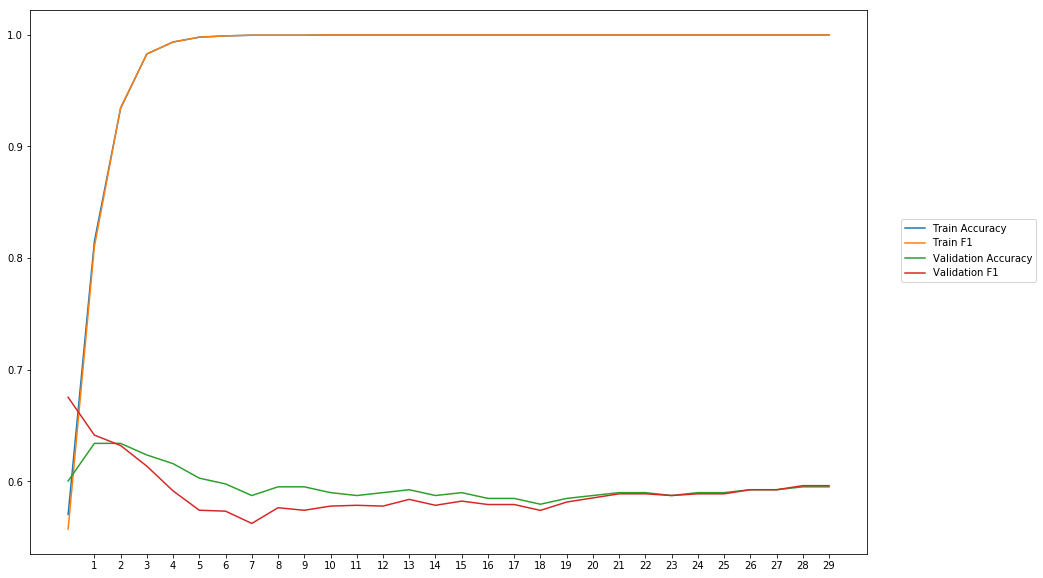

Average Accuracy: 59.52%
Average Precision: 59.96%
Average Recall: 58.34%
Average F1: 59.01%

-----Fold 2--------


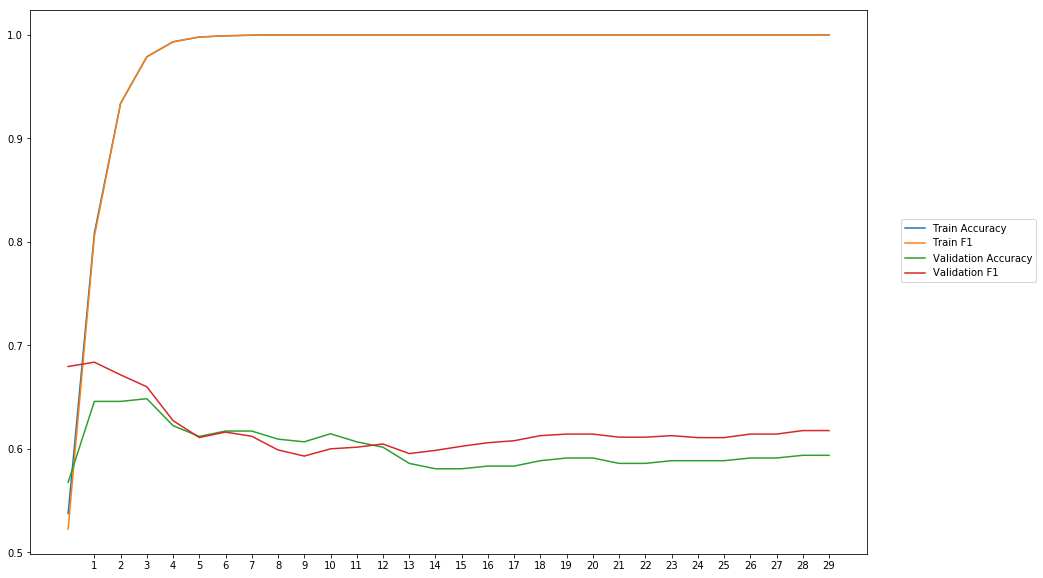

Average Accuracy: 60.03%
Average Precision: 59.60%
Average Recall: 64.53%
Average F1: 61.77%

-----Fold 3--------


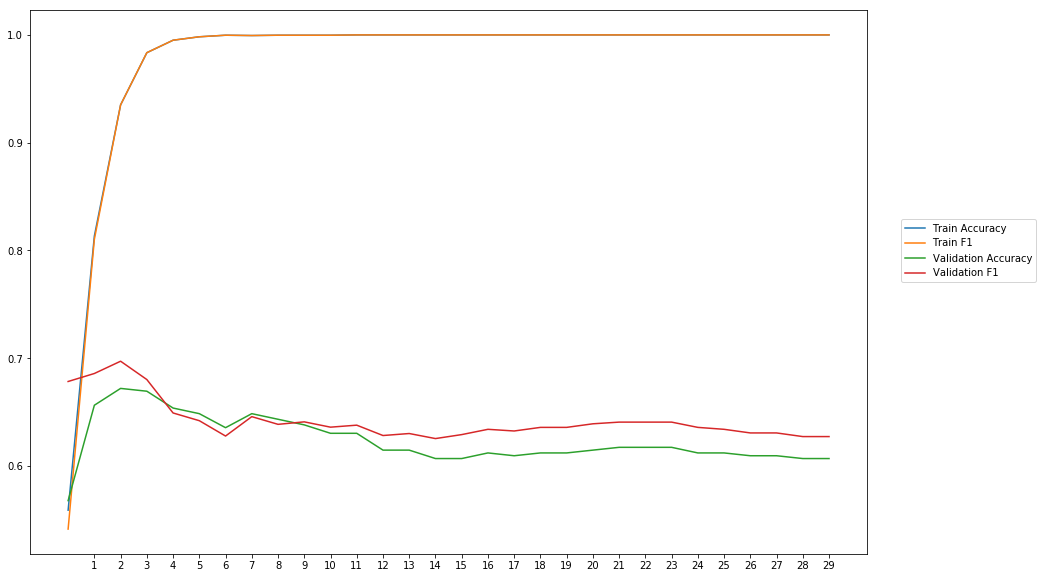

Average Accuracy: 62.34%
Average Precision: 61.68%
Average Recall: 67.25%
Average F1: 64.18%

-----Fold 4--------


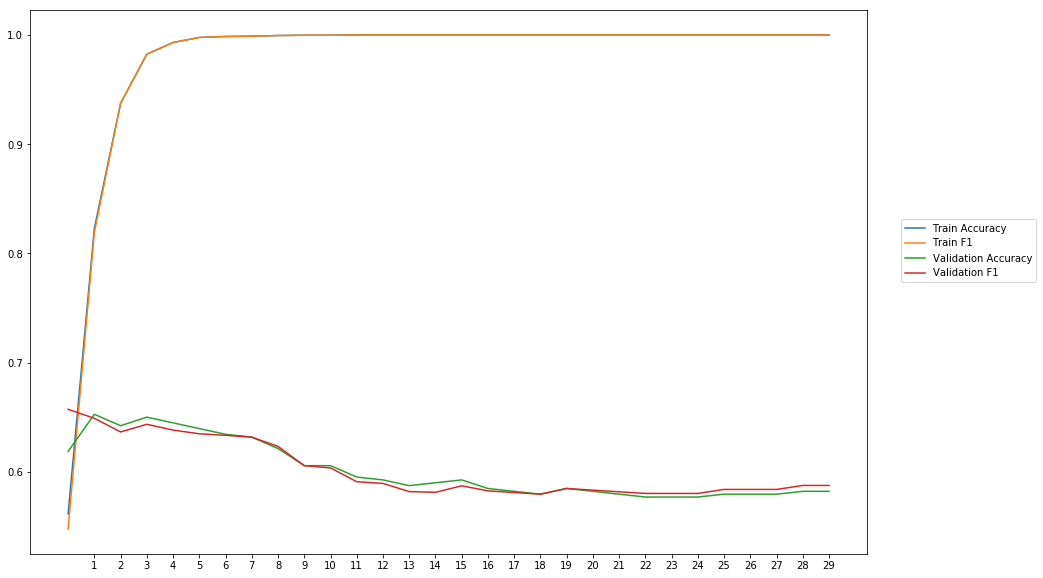

Average Accuracy: 60.11%
Average Precision: 60.27%
Average Recall: 60.12%
Average F1: 60.17%

-----Fold 5--------


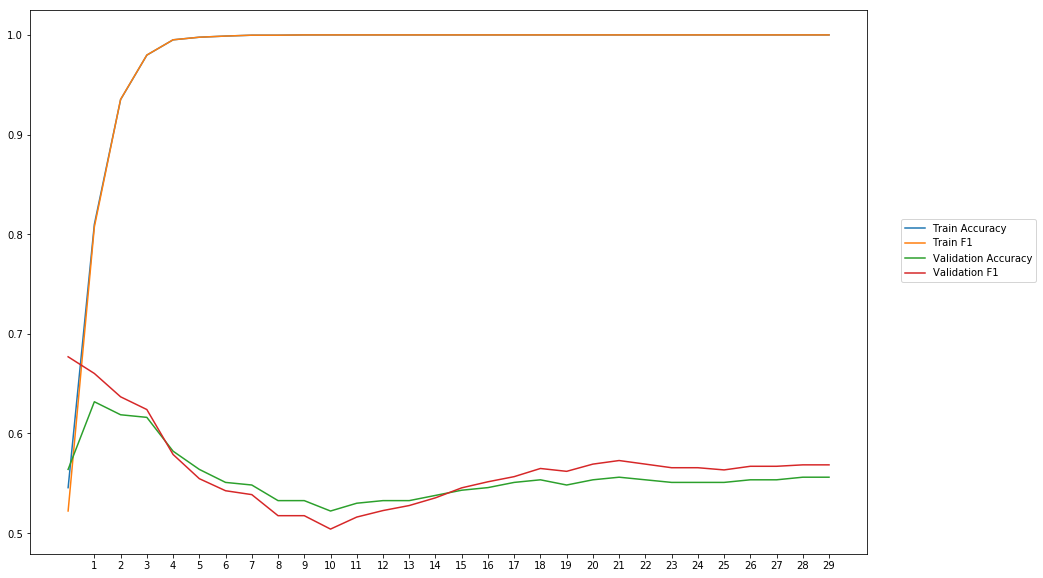

Average Accuracy: 55.58%
Average Precision: 55.44%
Average Recall: 57.73%
Average F1: 56.37%

-----Fold 6--------


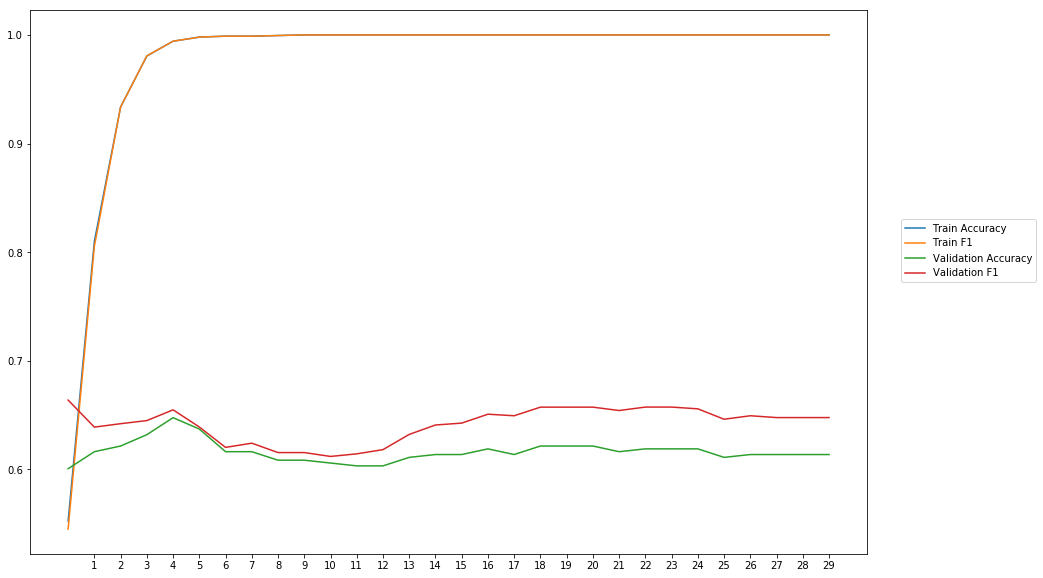

Average Accuracy: 61.63%
Average Precision: 60.36%
Average Recall: 68.70%
Average F1: 64.17%

-----Fold 7--------


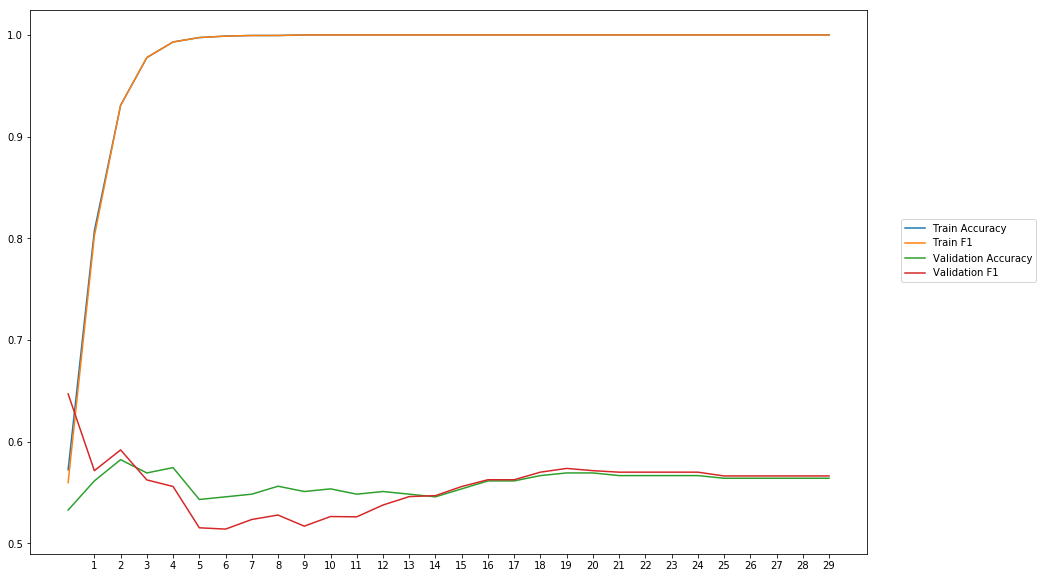

Average Accuracy: 55.93%
Average Precision: 56.17%
Average Recall: 55.66%
Average F1: 55.72%

-----Fold 8--------


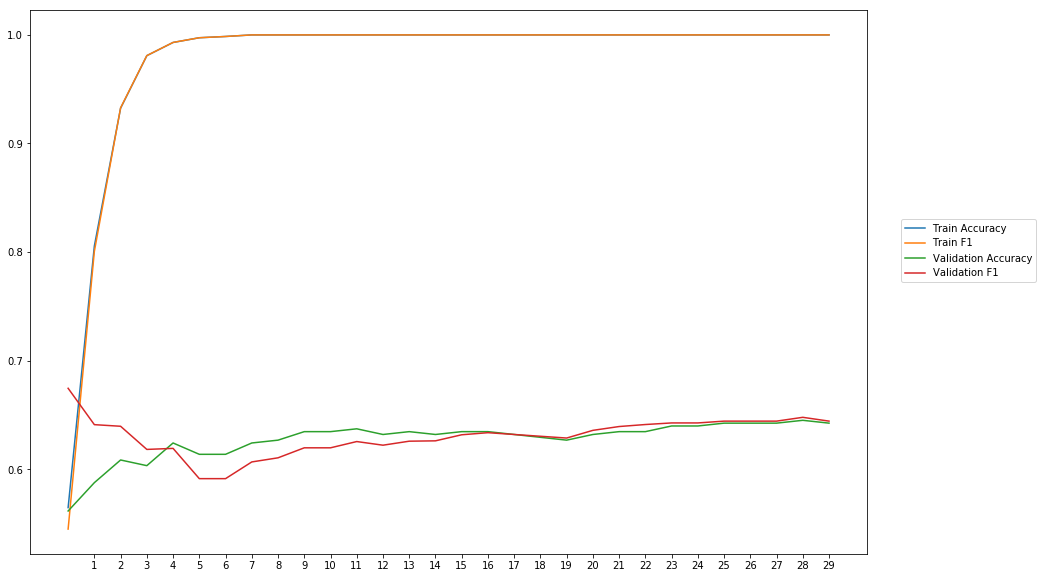

Average Accuracy: 62.72%
Average Precision: 62.93%
Average Recall: 63.63%
Average F1: 63.03%

-----Fold 9--------


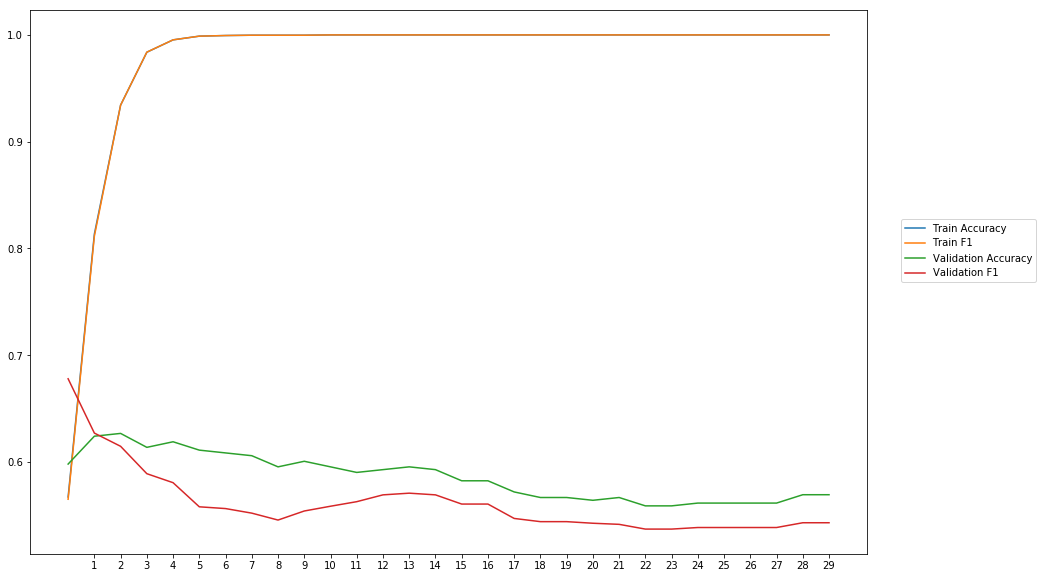

Average Accuracy: 58.56%
Average Precision: 59.92%
Average Recall: 53.18%
Average F1: 56.12%

-----Fold 10--------


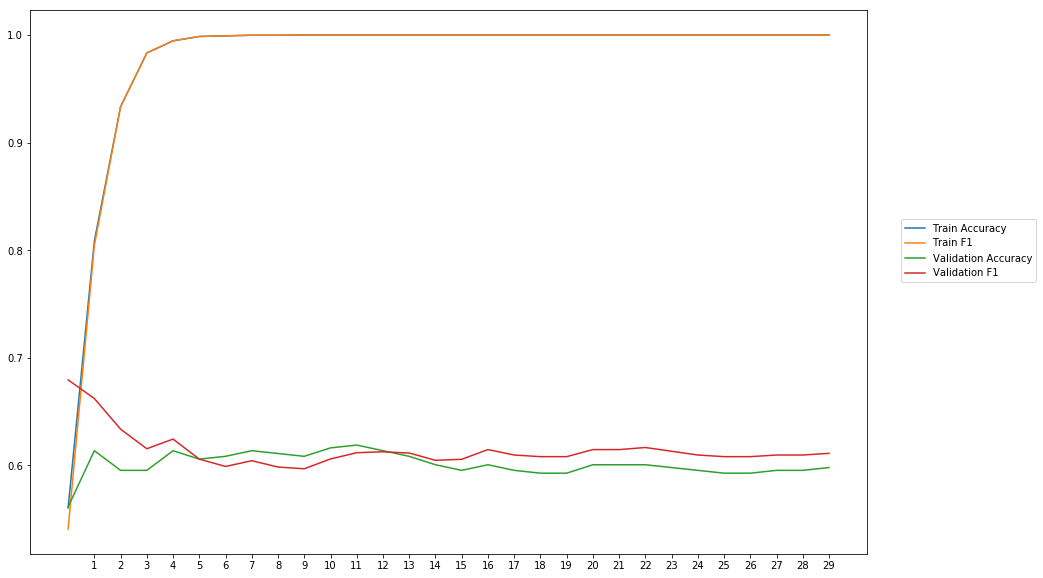

Average Accuracy: 60.10%
Average Precision: 59.74%
Average Recall: 63.65%
Average F1: 61.42%

-------Overallresults-------


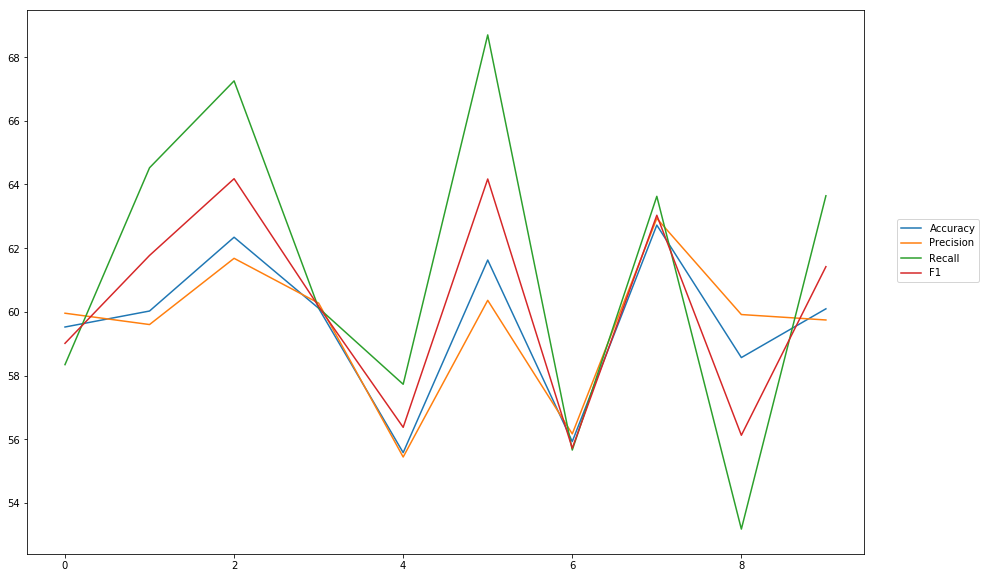

Accuracy: Mean = 59.65% (+/- 2.30%), Max = 62.72%, Min =  55.58%
Precision: Mean = 59.61% (+/- 2.14%), Max = 62.93%, Min =  55.44%
Recall: Mean = 61.28% (+/- 4.82%), Max = 68.70%, Min =  53.18%
F1: Mean = 60.20% (+/- 3.10%), Max = 64.18%, Min =  55.72%


In [8]:
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_1')  

## MLP with one hidden layer, 400 neurons

In [ ]:
wv_layer_2 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input_2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_2 = wv_layer_2(comment_input_2)

#Hidden Layer
x_2 = Dense(400, activation='relu')(embedded_sequences_2)

x_2 = Flatten()(x_2)

#Output (Dense) Layer
preds_2 = Dense(2, activation='softmax')(x_2)

# build the model
model_2 = Model(inputs=[comment_input_2], outputs=preds_2)


-----Fold 1--------


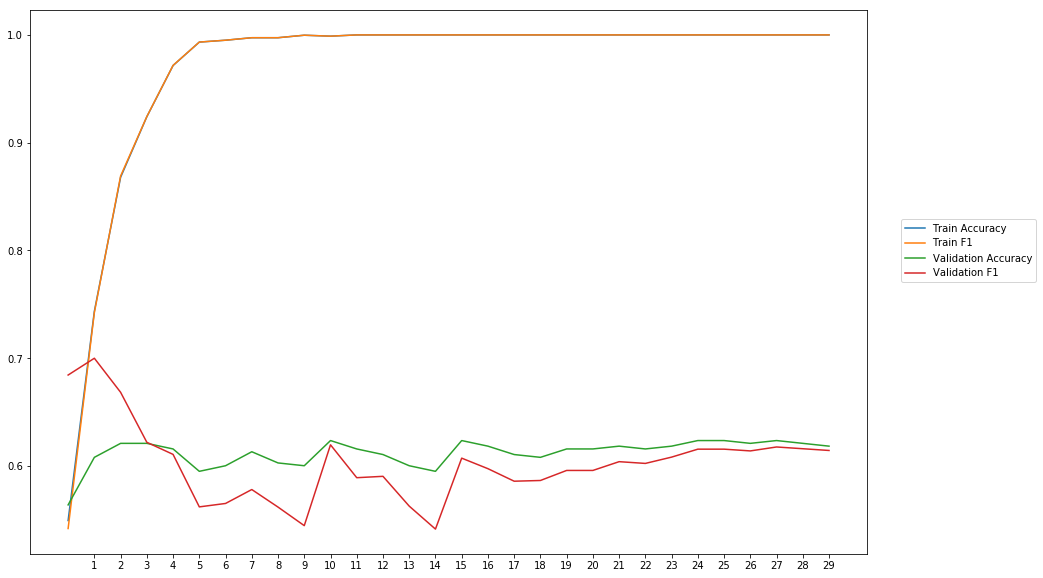

Average Accuracy: 61.19%
Average Precision: 62.13%
Average Recall: 59.50%
Average F1: 60.24%

-----Fold 2--------


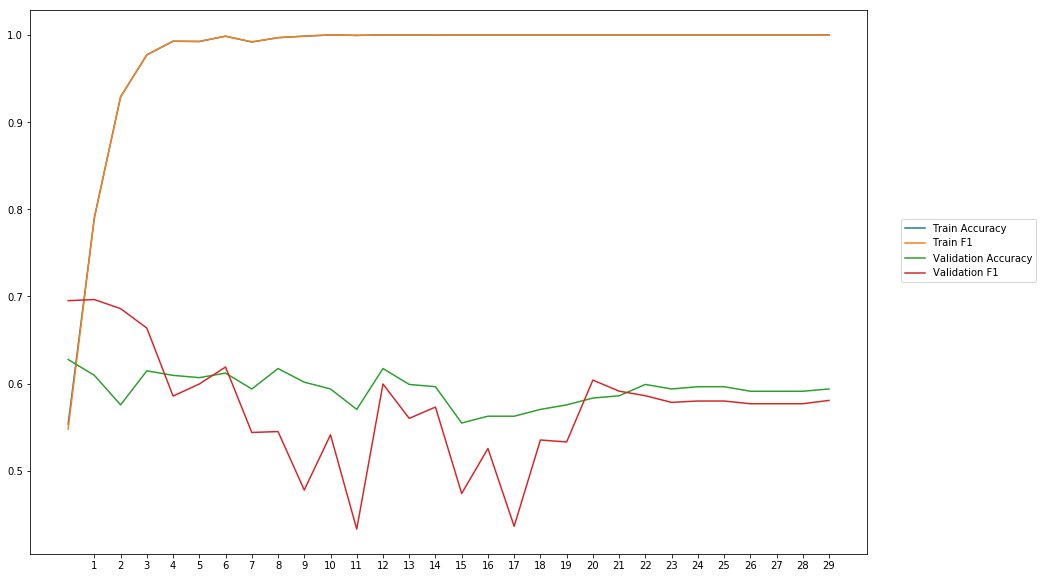

Average Accuracy: 59.31%
Average Precision: 60.84%
Average Recall: 55.89%
Average F1: 57.18%

-----Fold 3--------


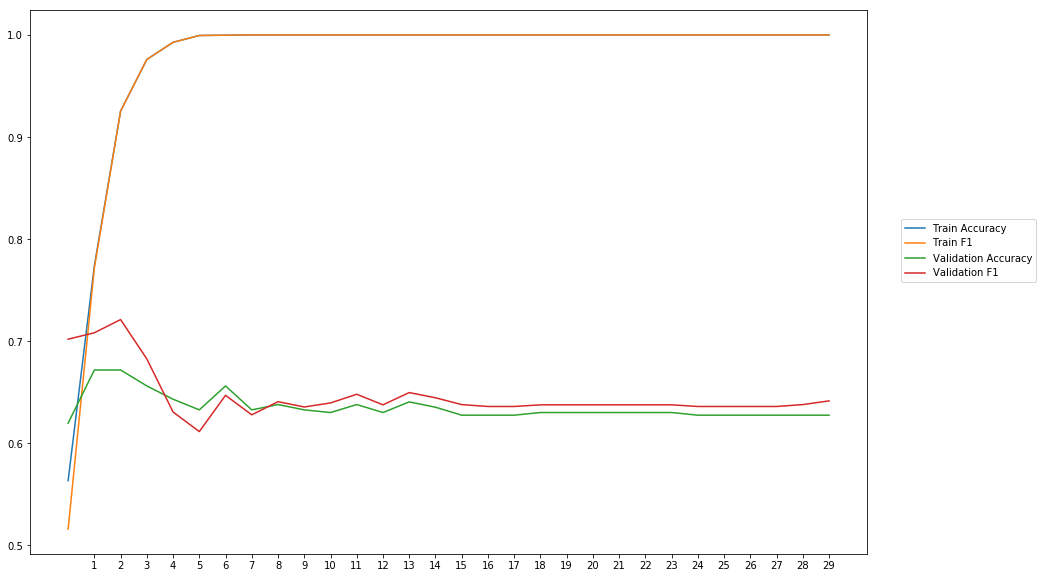

Average Accuracy: 63.53%
Average Precision: 63.07%
Average Recall: 66.65%
Average F1: 64.63%

-----Fold 4--------


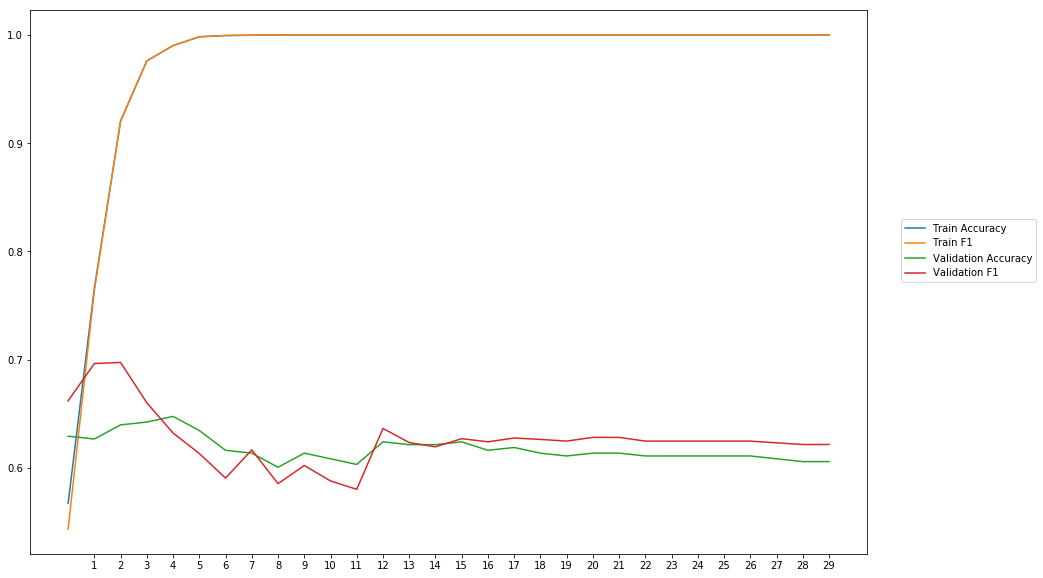

Average Accuracy: 61.76%
Average Precision: 61.44%
Average Recall: 64.22%
Average F1: 62.59%

-----Fold 5--------


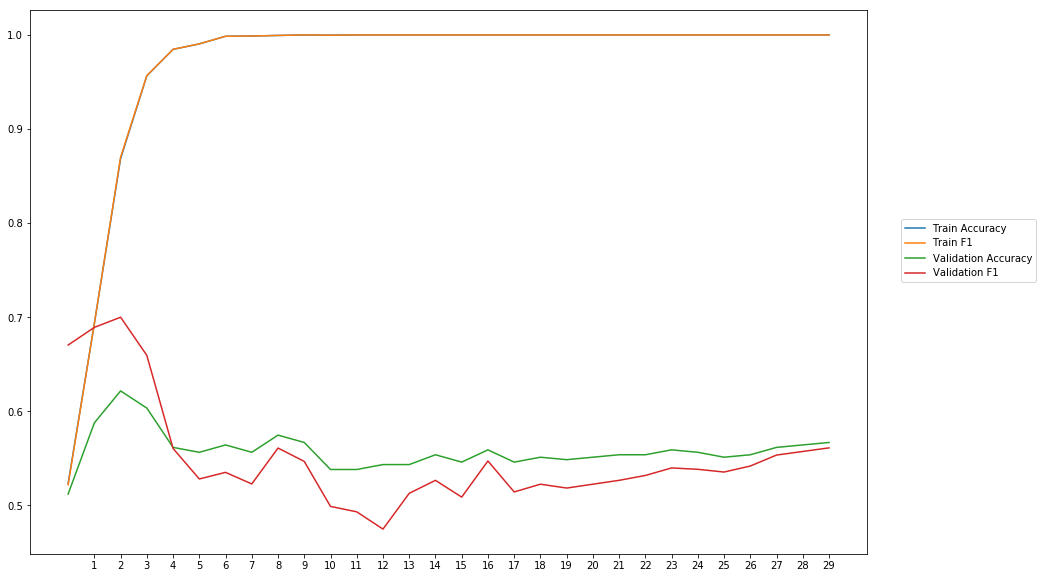

Average Accuracy: 55.79%
Average Precision: 56.10%
Average Recall: 55.31%
Average F1: 54.97%

-----Fold 6--------


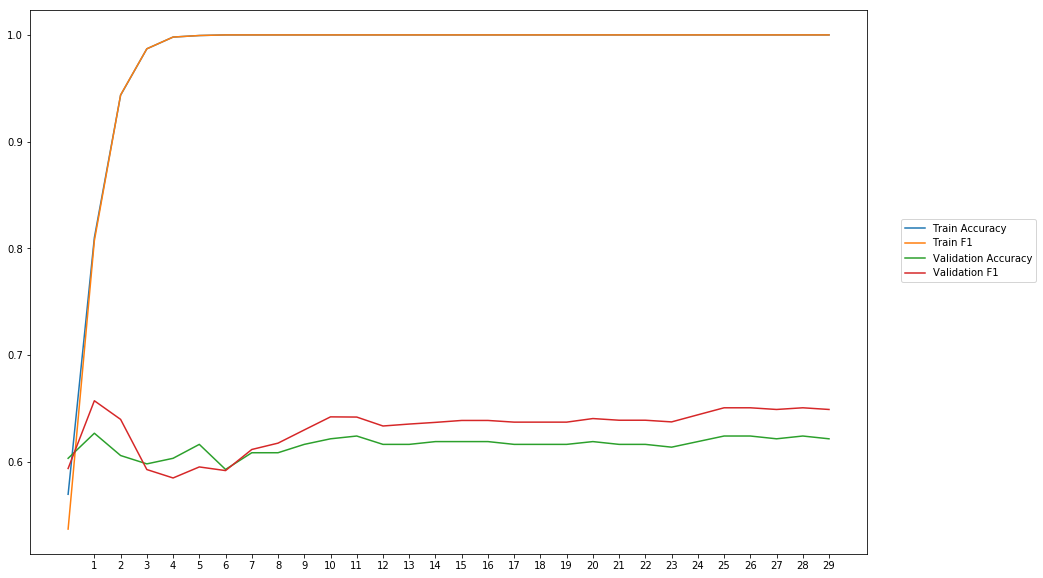

Average Accuracy: 61.53%
Average Precision: 60.74%
Average Recall: 65.89%
Average F1: 63.13%

-----Fold 7--------


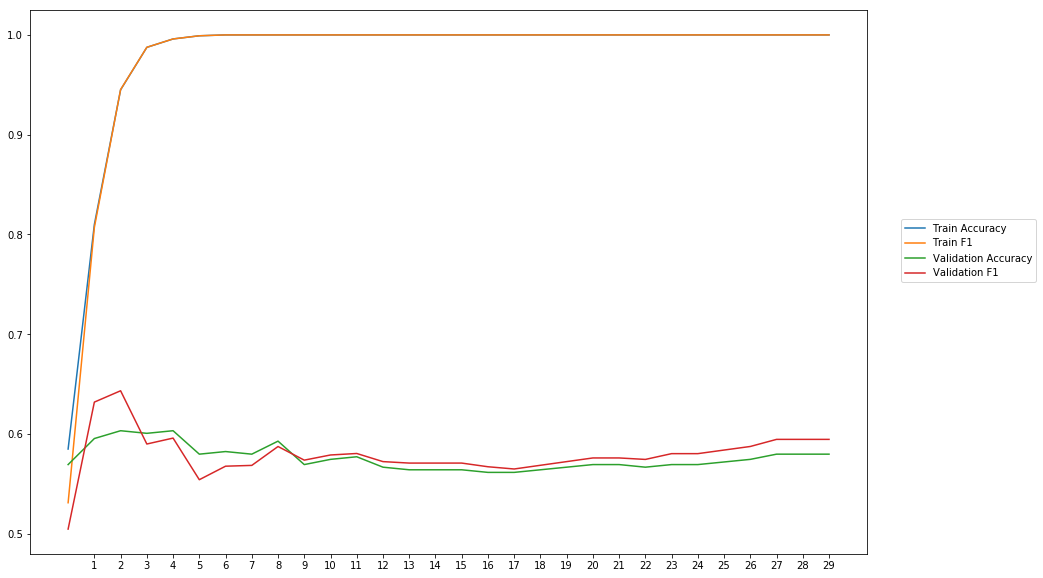

Average Accuracy: 57.55%
Average Precision: 57.59%
Average Recall: 58.44%
Average F1: 57.91%

-----Fold 8--------


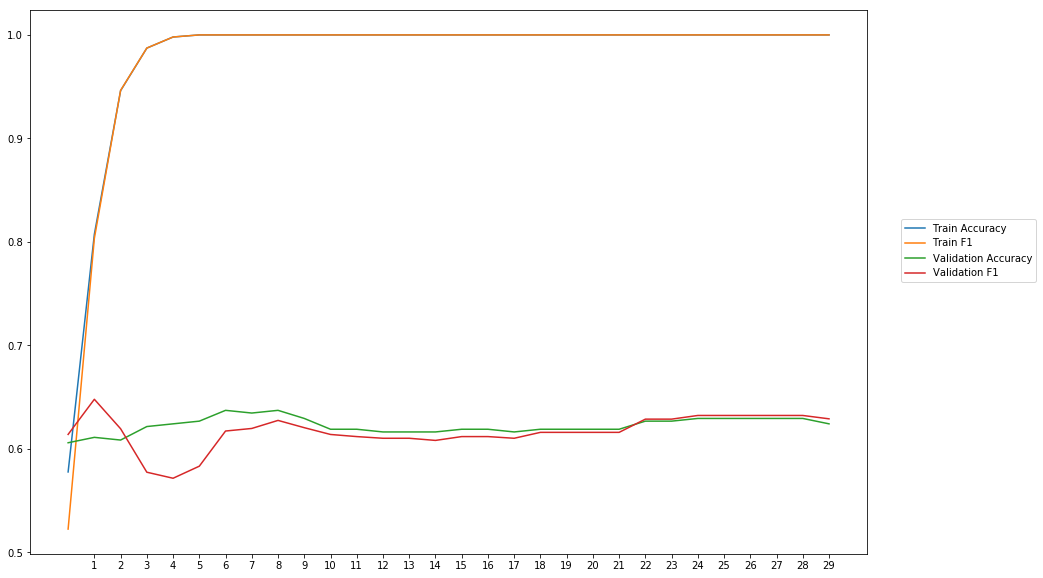

Average Accuracy: 62.25%
Average Precision: 62.89%
Average Recall: 60.68%
Average F1: 61.65%

-----Fold 9--------


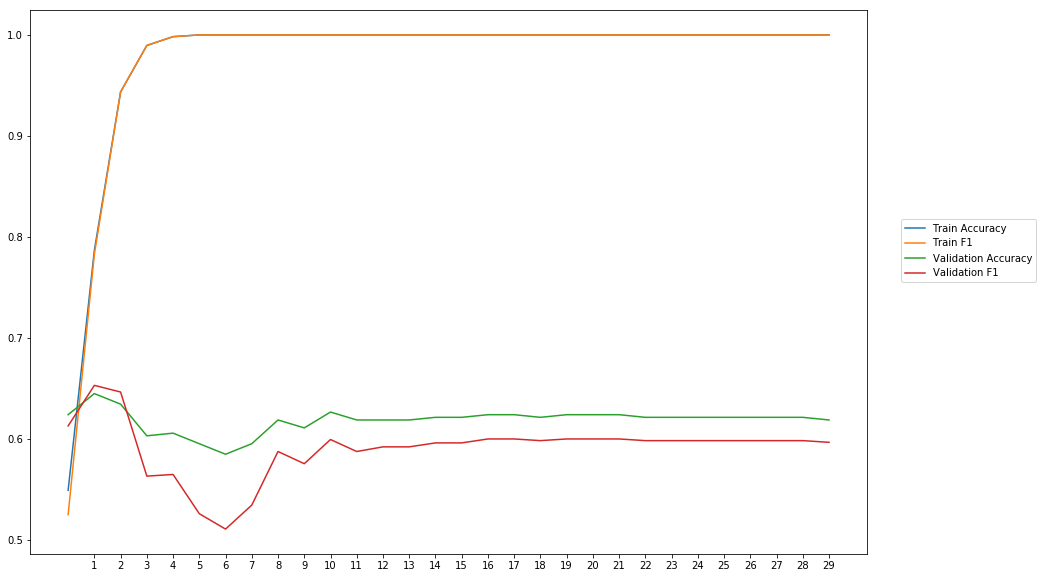

Average Accuracy: 61.85%
Average Precision: 63.81%
Average Recall: 55.17%
Average F1: 59.07%

-----Fold 10--------


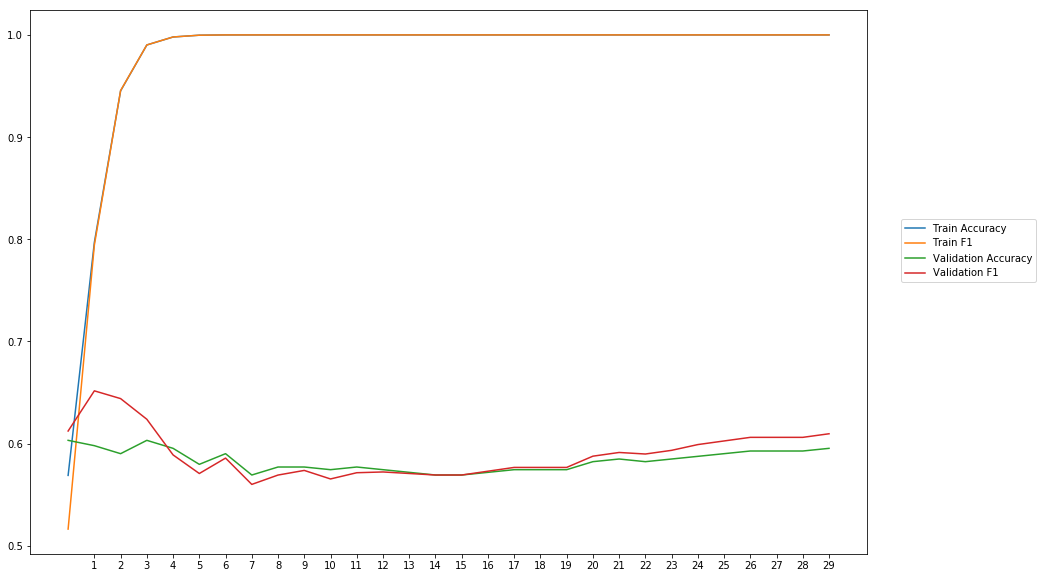

Average Accuracy: 58.33%
Average Precision: 58.19%
Average Recall: 59.95%
Average F1: 58.97%

-------Overallresults-------


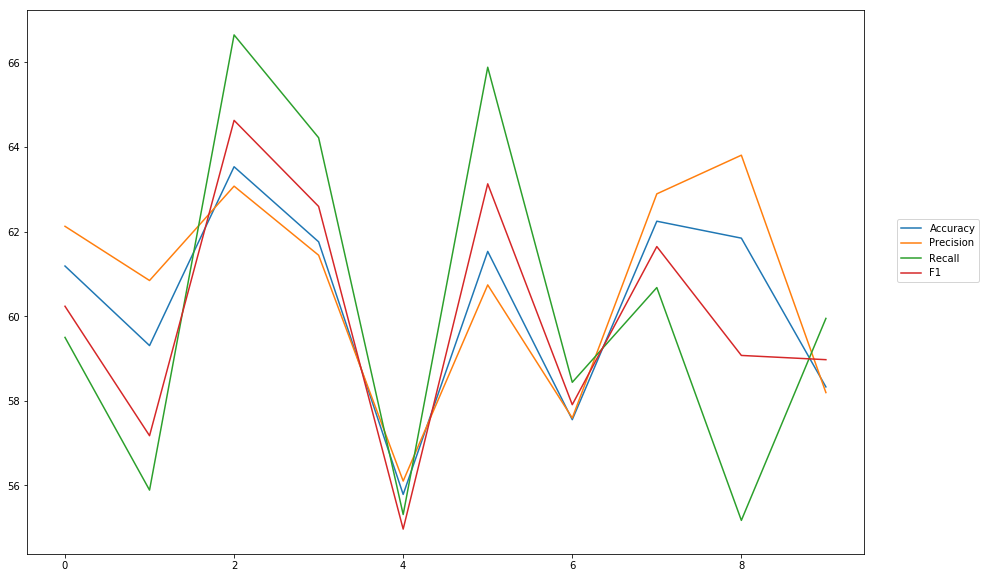

Accuracy: Mean = 60.31% (+/- 2.32%), Max = 63.53%, Min =  55.79%
Precision: Mean = 60.68% (+/- 2.44%), Max = 63.81%, Min =  56.10%
Recall: Mean = 60.17% (+/- 4.02%), Max = 66.65%, Min =  55.17%
F1: Mean = 60.03% (+/- 2.83%), Max = 64.63%, Min =  54.97%


In [10]:
cross_val(model_2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_2') 

## MLP with two hidden layers, each 400 Neurons

In [ ]:
wv_layer_4 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_4 = wv_layer_4(comment_input_4)

#First Dense Layer
x_4 = Dense(400, activation='relu')(embedded_sequences_4)

#Second Dense Layer
x_4 = Dense(400, activation='relu')(x_4)

x_4 = Flatten()(x_4)

#Output (Dense) Layer
preds_4 = Dense(2, activation='softmax')(x_4)

# build the model
model_4 = Model(inputs=[comment_input_4], outputs=preds_4)


-----Fold 1--------


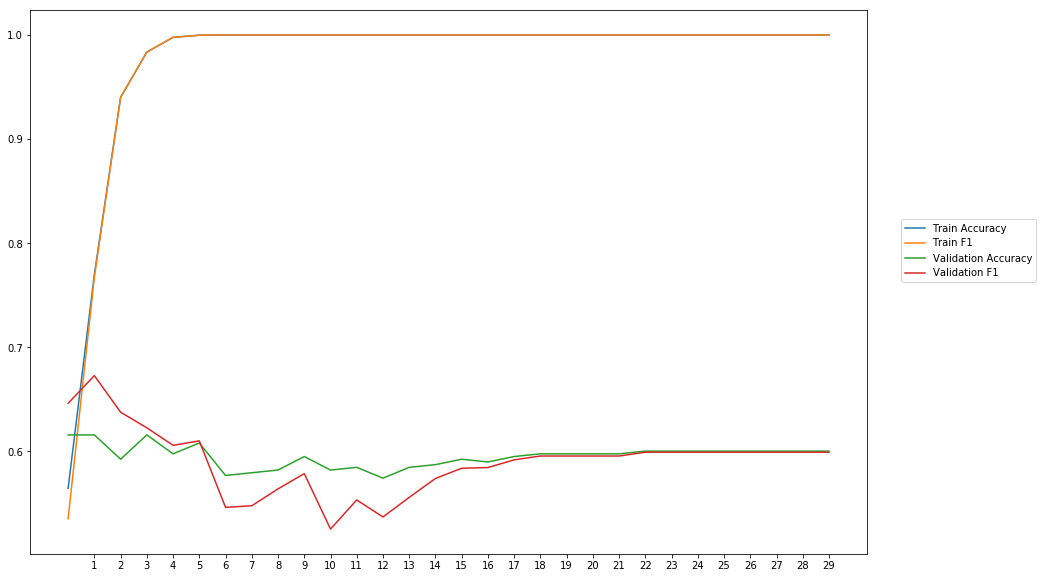

Average Accuracy: 59.52%
Average Precision: 59.86%
Average Recall: 58.57%
Average F1: 59.02%

-----Fold 2--------


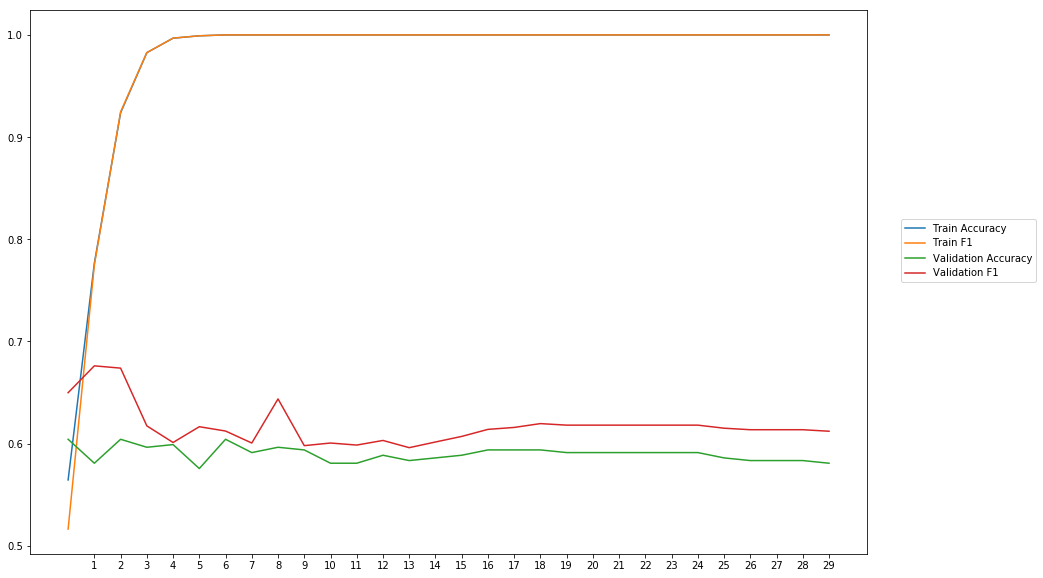

Average Accuracy: 58.99%
Average Precision: 58.16%
Average Recall: 66.08%
Average F1: 61.73%

-----Fold 3--------


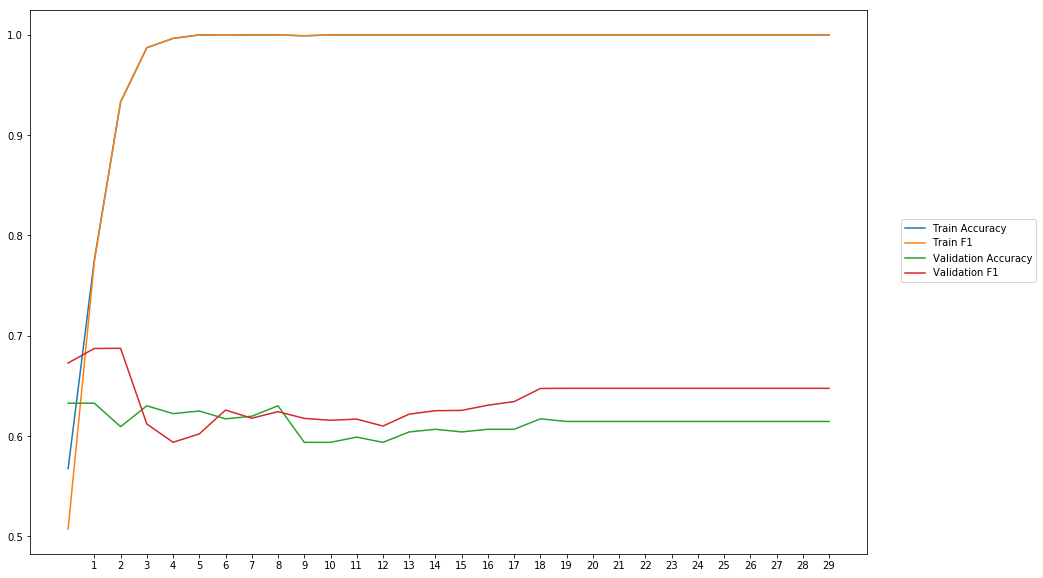

Average Accuracy: 61.35%
Average Precision: 60.45%
Average Recall: 67.65%
Average F1: 63.65%

-----Fold 4--------


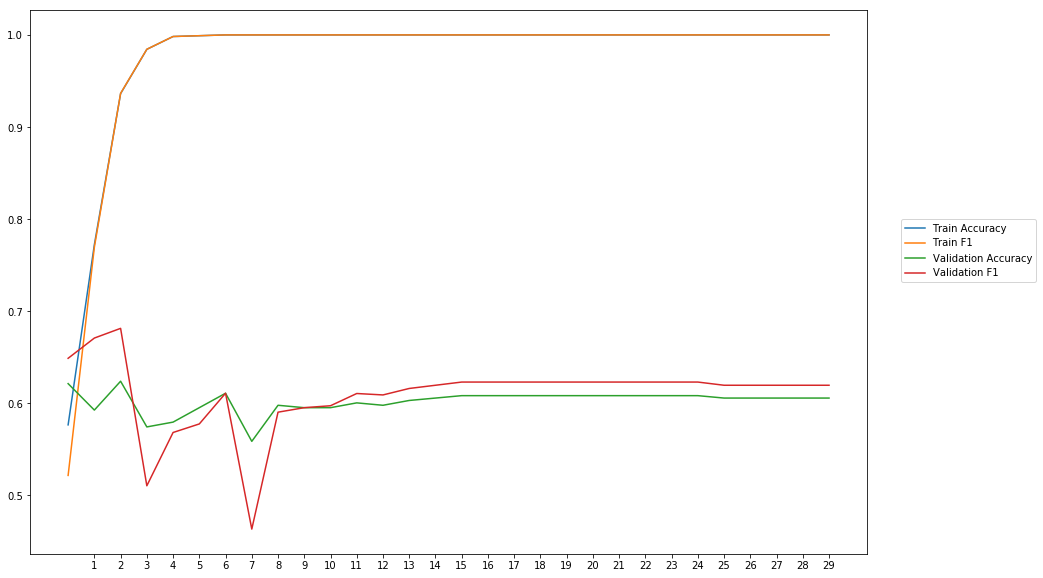

Average Accuracy: 60.22%
Average Precision: 59.89%
Average Recall: 62.74%
Average F1: 61.00%

-----Fold 5--------


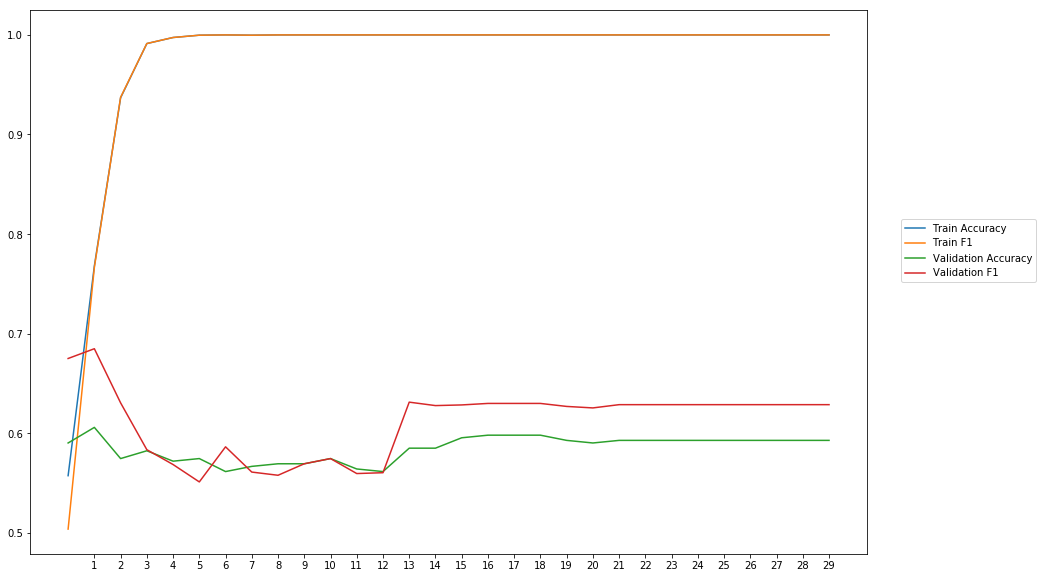

Average Accuracy: 58.47%
Average Precision: 57.51%
Average Recall: 65.82%
Average F1: 61.15%

-----Fold 6--------


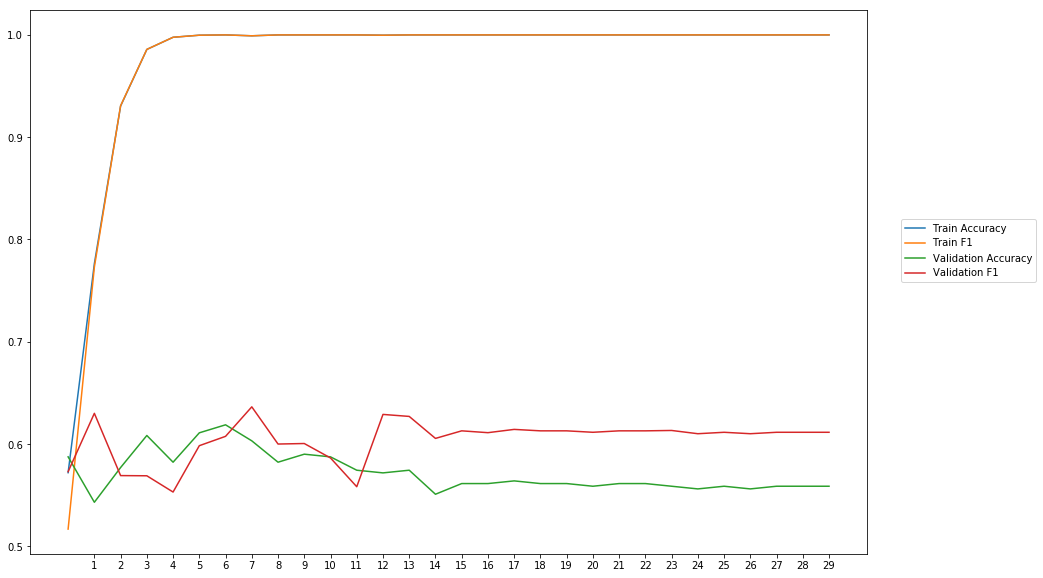

Average Accuracy: 57.20%
Average Precision: 56.63%
Average Recall: 65.50%
Average F1: 60.41%

-----Fold 7--------


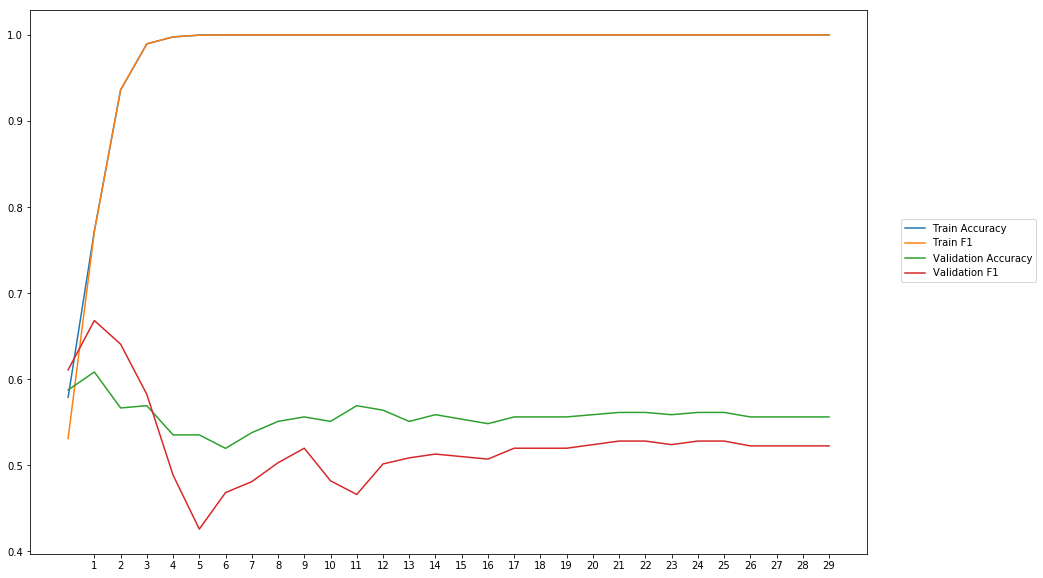

Average Accuracy: 55.73%
Average Precision: 56.77%
Average Recall: 49.18%
Average F1: 52.29%

-----Fold 8--------


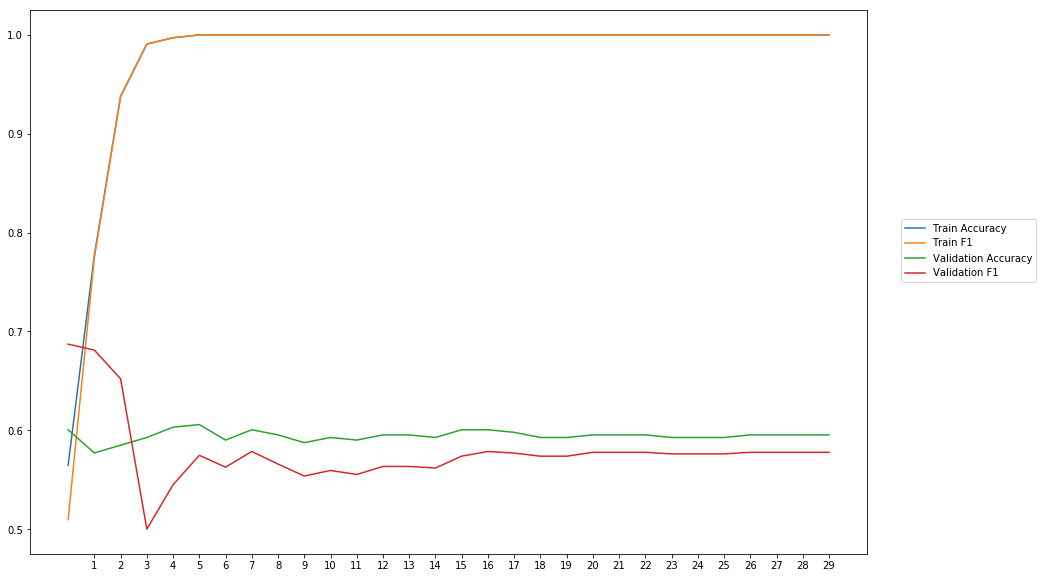

Average Accuracy: 59.44%
Average Precision: 60.60%
Average Recall: 56.35%
Average F1: 57.84%

-----Fold 9--------


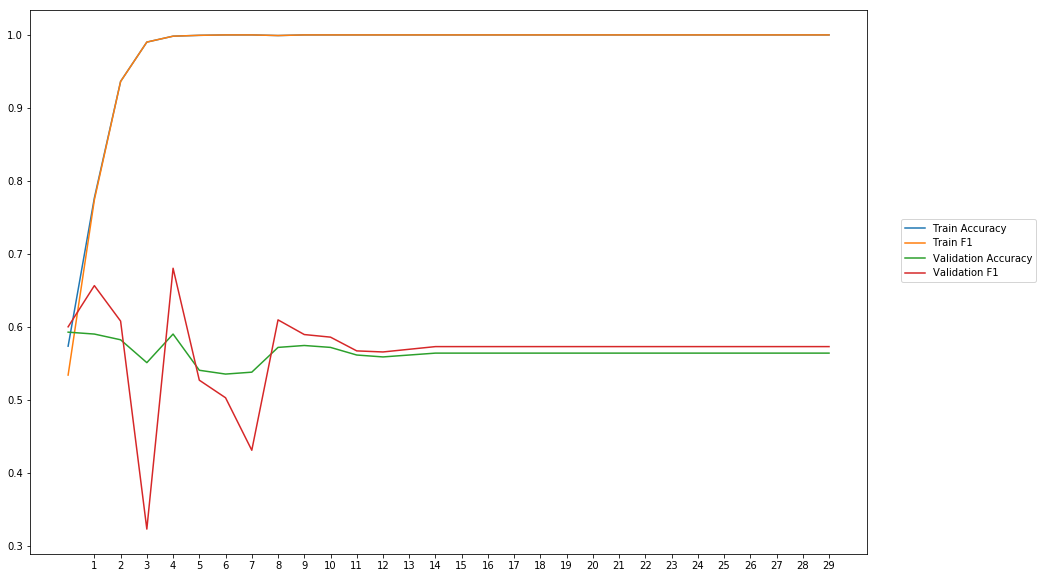

Average Accuracy: 56.48%
Average Precision: 56.62%
Average Recall: 57.95%
Average F1: 56.60%

-----Fold 10--------


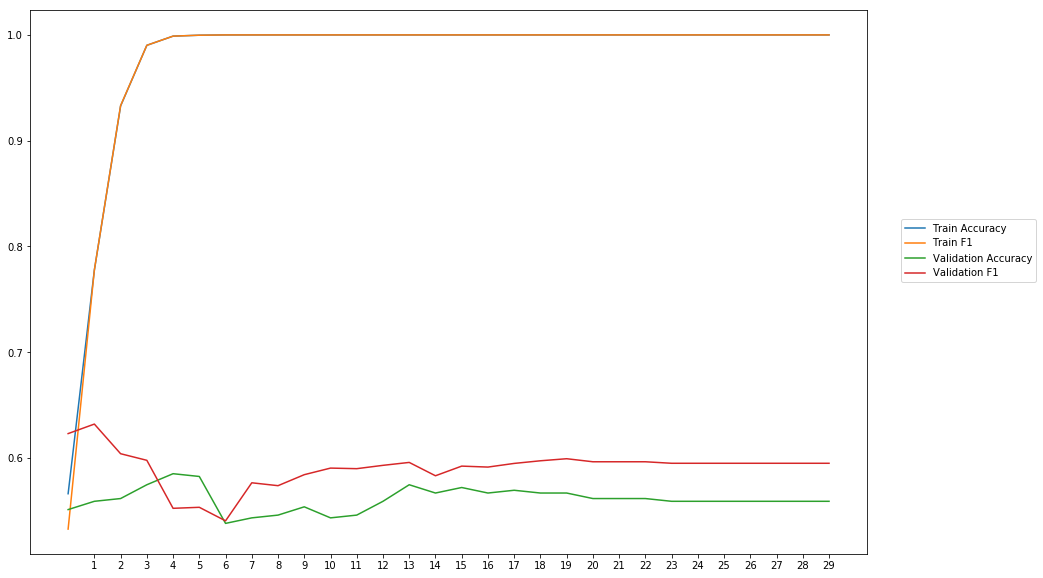

Average Accuracy: 56.06%
Average Precision: 55.50%
Average Recall: 63.37%
Average F1: 59.04%

-------Overallresults-------


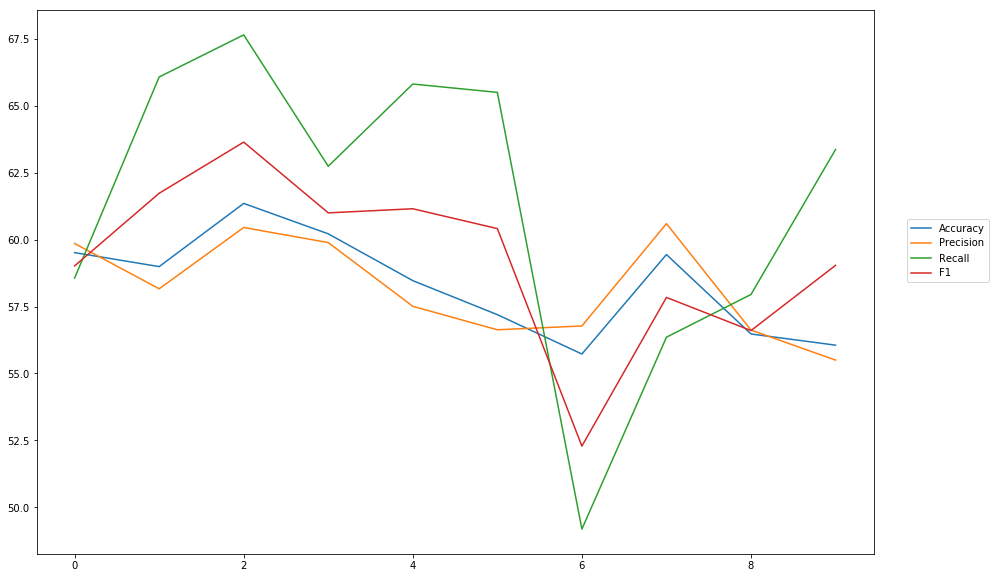

Accuracy: Mean = 58.34% (+/- 1.80%), Max = 61.35%, Min =  55.73%
Precision: Mean = 58.20% (+/- 1.77%), Max = 60.60%, Min =  55.50%
Recall: Mean = 61.32% (+/- 5.45%), Max = 67.65%, Min =  49.18%
F1: Mean = 59.27% (+/- 3.02%), Max = 63.65%, Min =  52.29%


In [12]:
cross_val(model_4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_4')  

## MLP with two hidden layer, first 400 neurons, second 300 neurons

In [ ]:
wv_layer_3 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_3 = wv_layer_3(comment_input_3)

#First Dense Layer
x_3 = Dense(400, activation='relu')(embedded_sequences_3)

#Second Dense Layer
x_3 = Dense(300, activation='relu')(x_3)

x_3 = Flatten()(x_3)

#Output (Dense) Layer
preds_3 = Dense(2, activation='softmax')(x_3)

# build the model
model_3 = Model(inputs=[comment_input_3], outputs=preds_3)


-----Fold 1--------


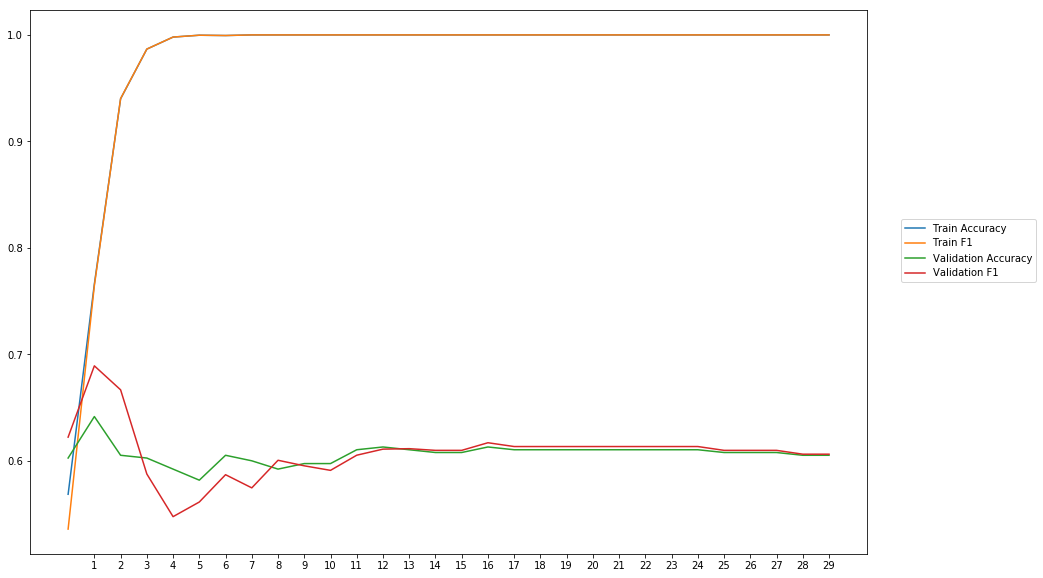

Average Accuracy: 60.66%
Average Precision: 60.73%
Average Recall: 61.14%
Average F1: 60.79%

-----Fold 2--------


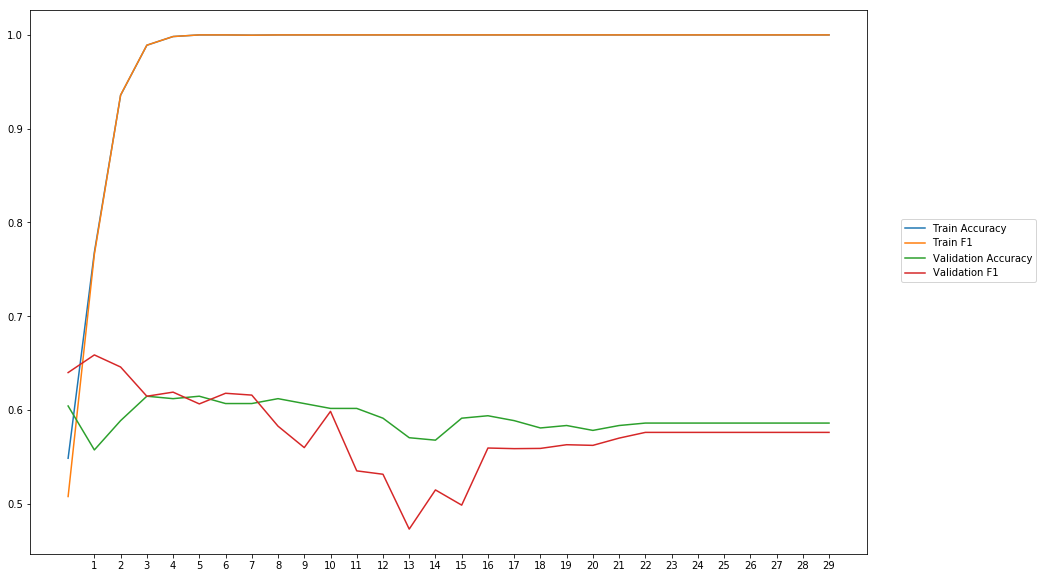

Average Accuracy: 59.14%
Average Precision: 60.35%
Average Recall: 56.10%
Average F1: 57.63%

-----Fold 3--------


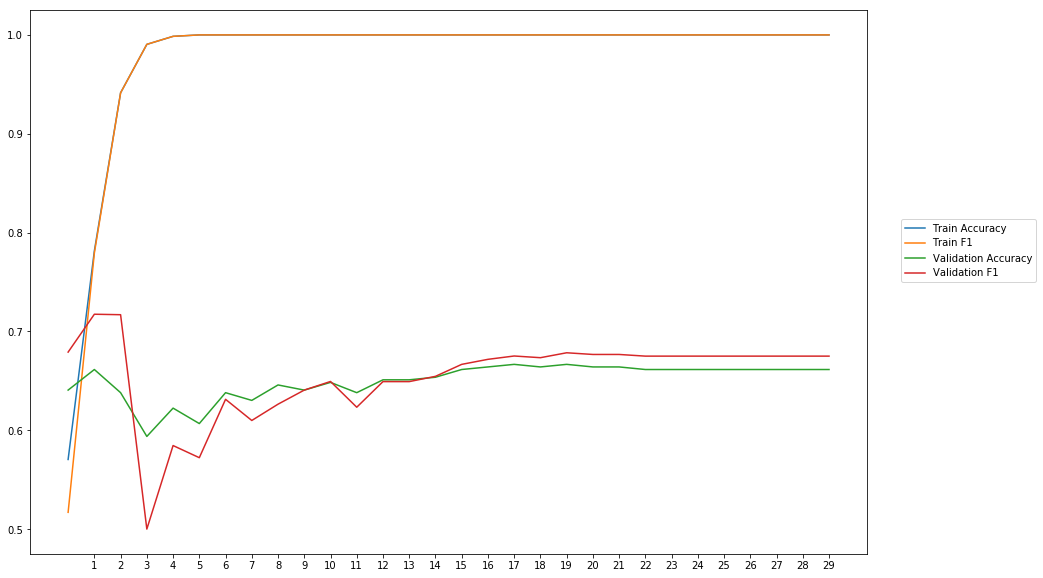

Average Accuracy: 65.01%
Average Precision: 64.90%
Average Recall: 66.70%
Average F1: 65.41%

-----Fold 4--------


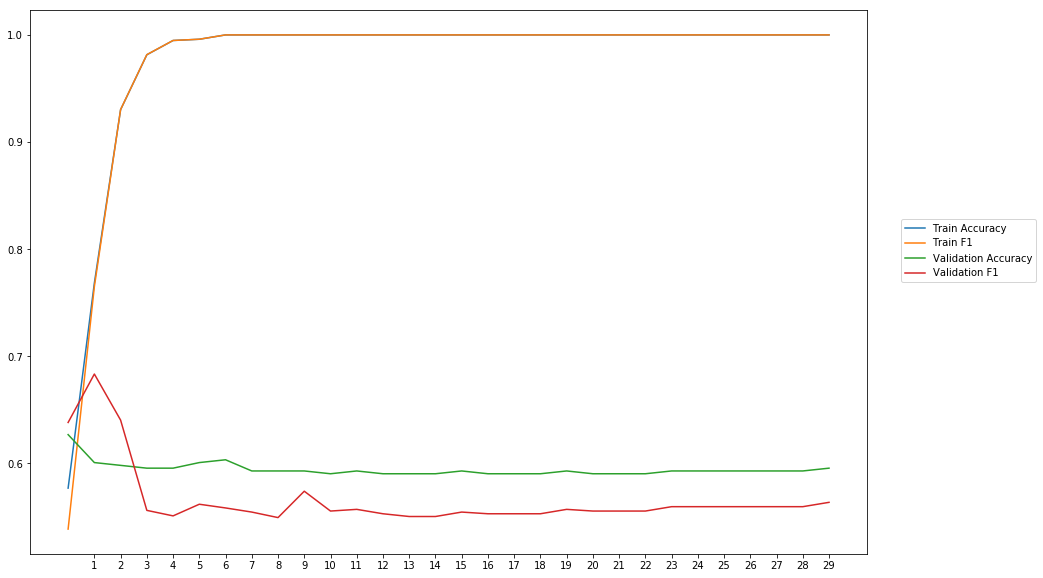

Average Accuracy: 59.43%
Average Precision: 61.05%
Average Recall: 53.30%
Average F1: 56.61%

-----Fold 5--------


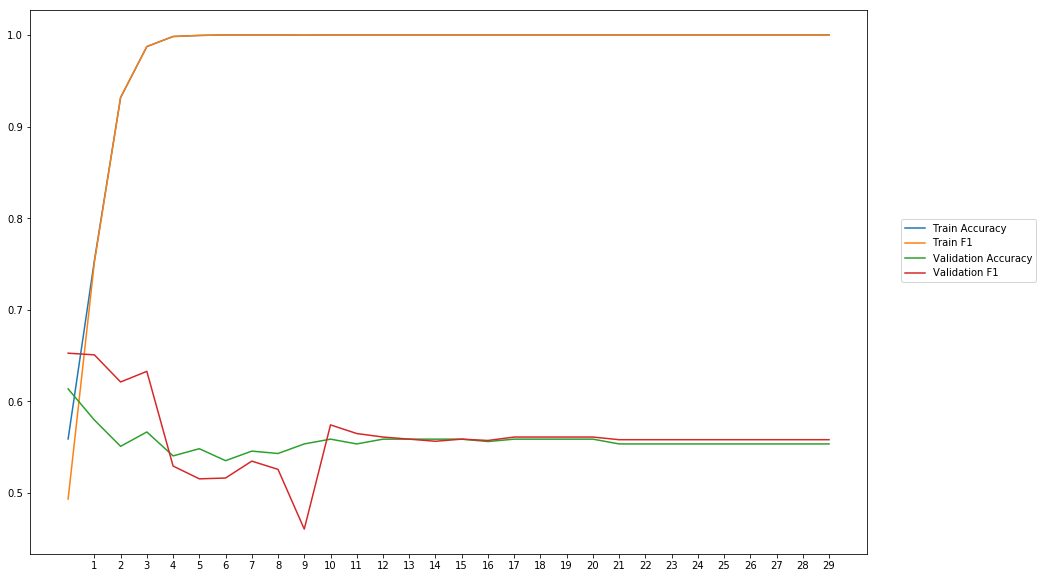

Average Accuracy: 55.66%
Average Precision: 55.64%
Average Recall: 57.17%
Average F1: 56.13%

-----Fold 6--------


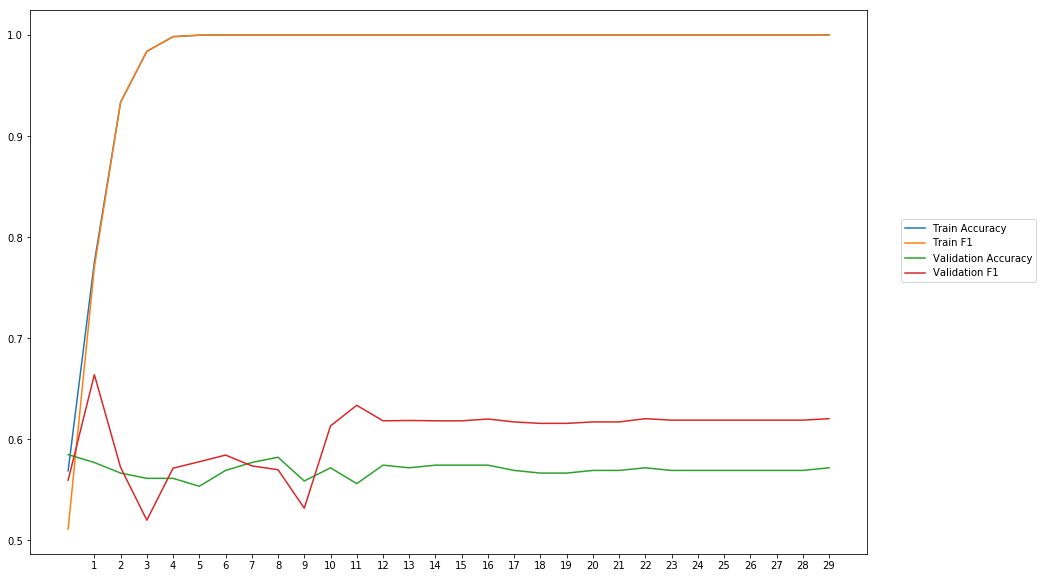

Average Accuracy: 56.96%
Average Precision: 56.13%
Average Recall: 65.89%
Average F1: 60.34%

-----Fold 7--------


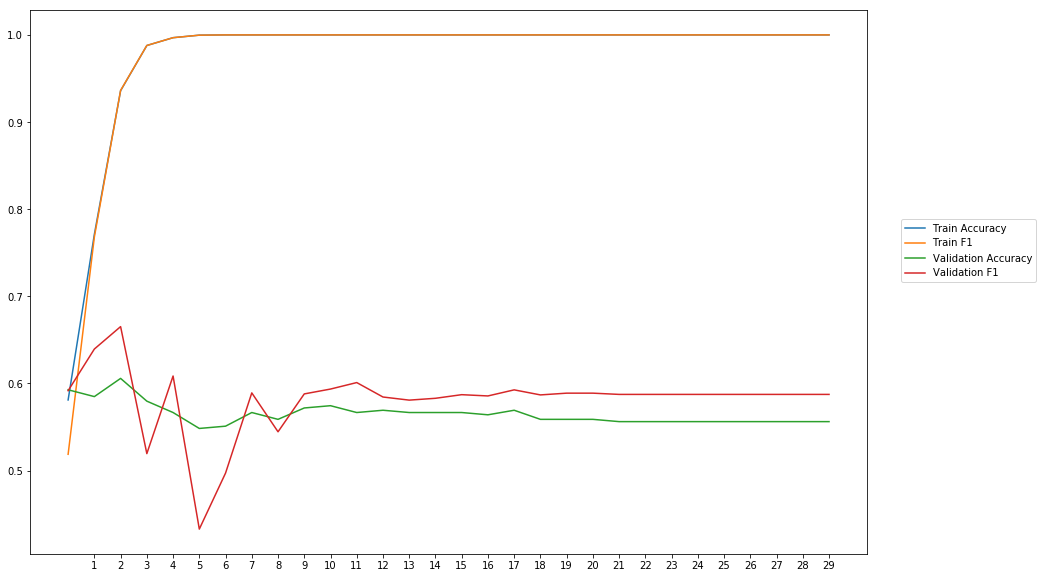

Average Accuracy: 56.50%
Average Precision: 56.20%
Average Recall: 60.87%
Average F1: 58.11%

-----Fold 8--------


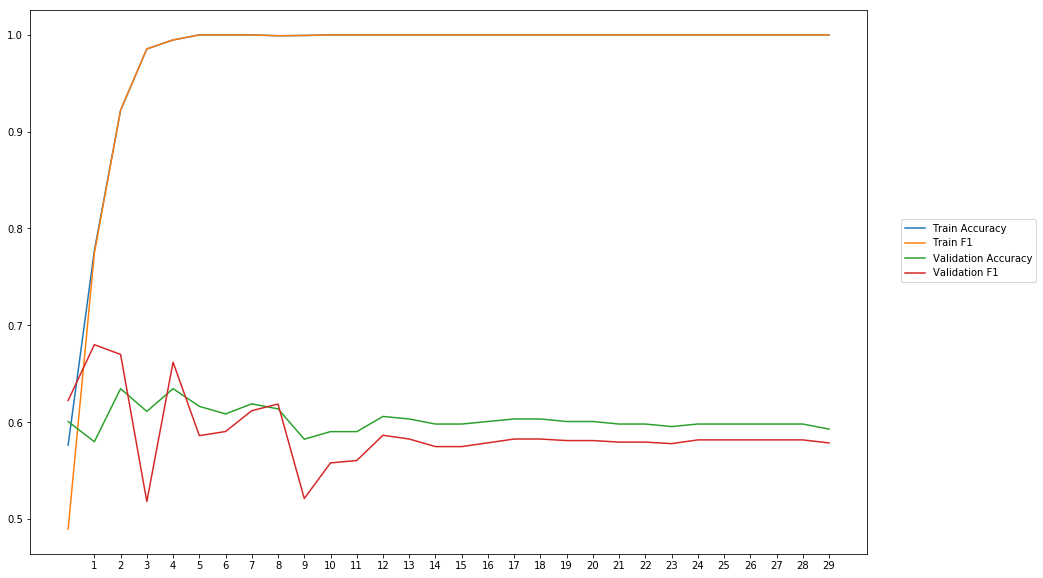

Average Accuracy: 60.22%
Average Precision: 61.24%
Average Recall: 57.27%
Average F1: 58.81%

-----Fold 9--------


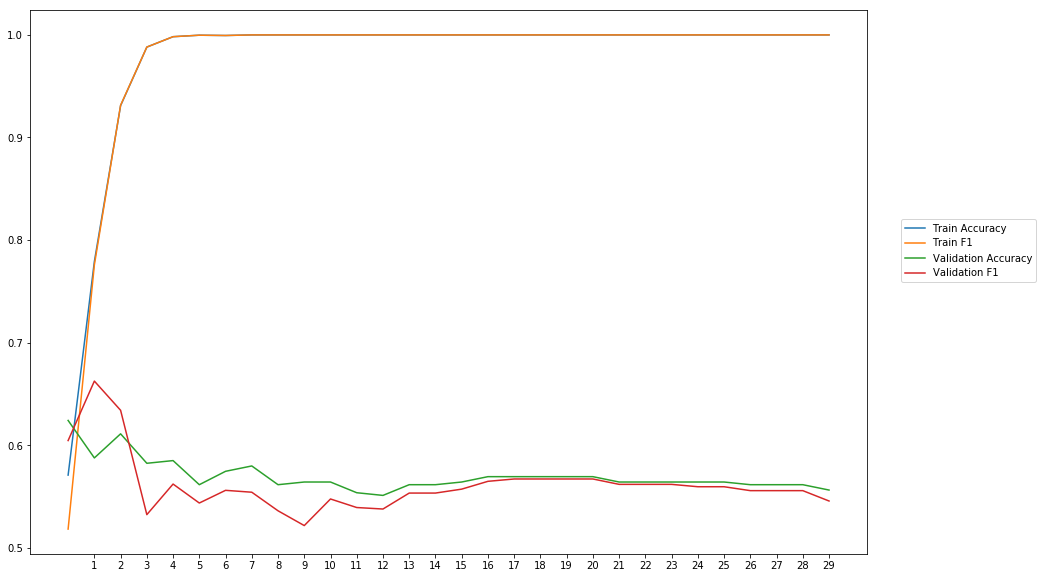

Average Accuracy: 56.97%
Average Precision: 57.41%
Average Recall: 55.21%
Average F1: 56.14%

-----Fold 10--------


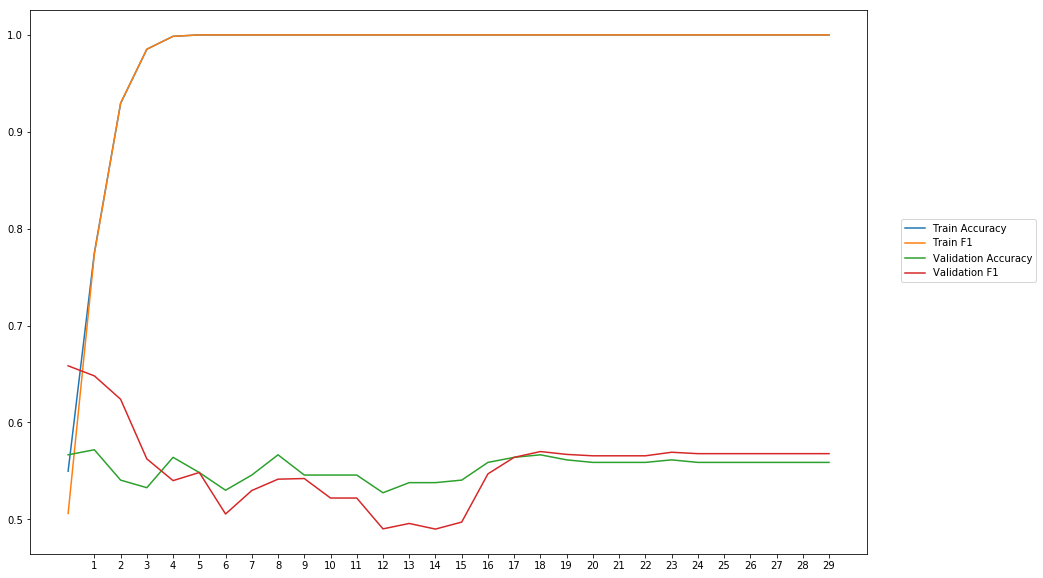

Average Accuracy: 55.29%
Average Precision: 55.37%
Average Recall: 56.23%
Average F1: 55.46%

-------Overallresults-------


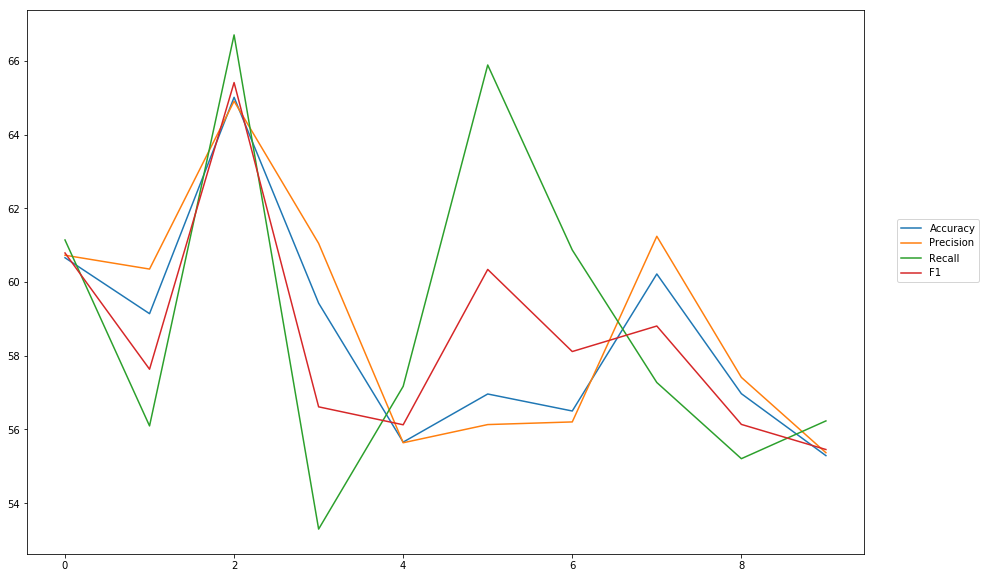

Accuracy: Mean = 58.58% (+/- 2.80%), Max = 65.01%, Min =  55.29%
Precision: Mean = 58.90% (+/- 3.03%), Max = 64.90%, Min =  55.37%
Recall: Mean = 58.99% (+/- 4.29%), Max = 66.70%, Min =  53.30%
F1: Mean = 58.54% (+/- 2.85%), Max = 65.41%, Min =  55.46%


In [11]:
cross_val(model_3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_3')  

## MLP with one hidden layer, 500 neurons

In [ ]:
wv_layer_7 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_7 = wv_layer_7(comment_input_7)

#First Dense Layer
x_7 = Dense(500, activation='relu')(embedded_sequences_7)

x_7 = Flatten()(x_7)

#Output (Dense) Layer
preds_7 = Dense(2, activation='softmax')(x_7)

# build the model
model_7 = Model(inputs=[comment_input_7], outputs=preds_7)


-----Fold 1--------


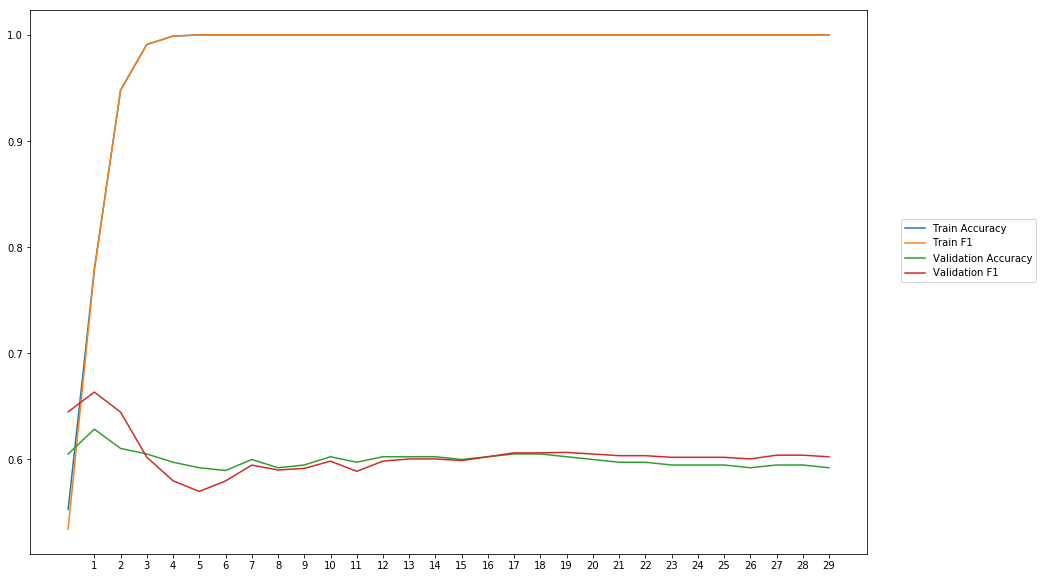

Average Accuracy: 59.97%
Average Precision: 59.94%
Average Recall: 60.87%
Average F1: 60.33%

-----Fold 2--------


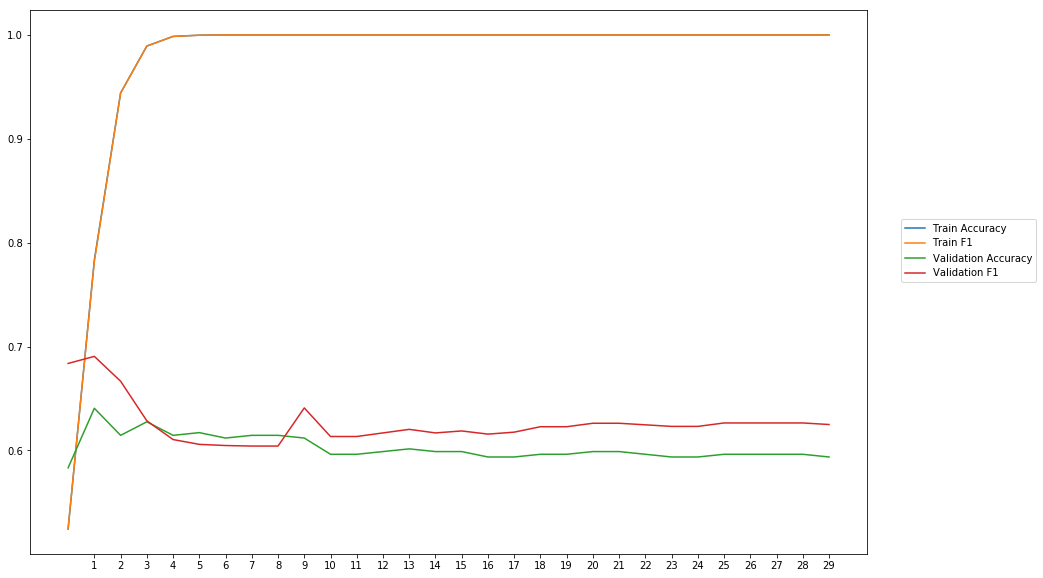

Average Accuracy: 60.28%
Average Precision: 59.53%
Average Recall: 66.39%
Average F1: 62.58%

-----Fold 3--------


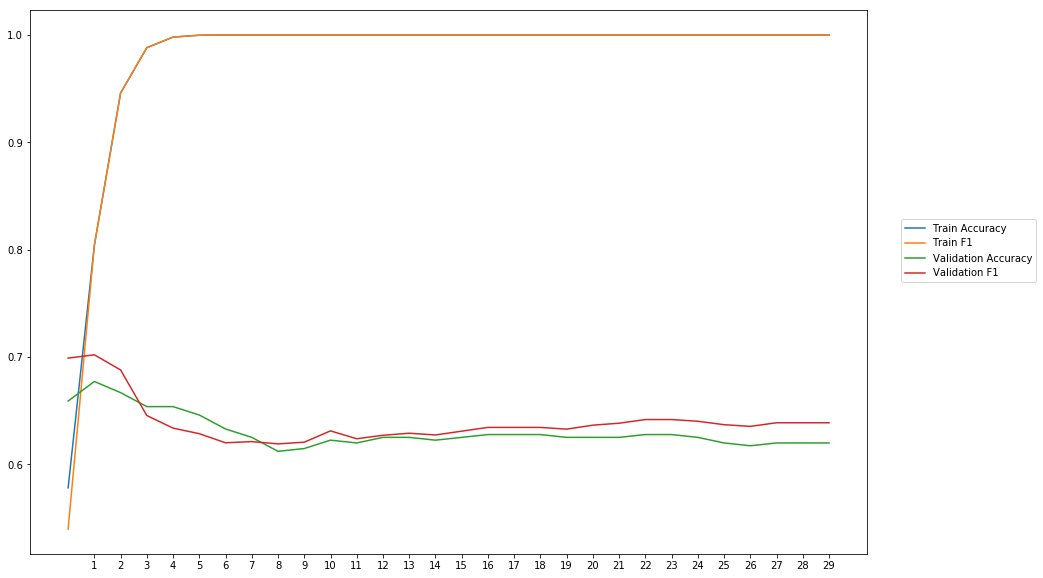

Average Accuracy: 63.05%
Average Precision: 62.80%
Average Recall: 65.18%
Average F1: 63.89%

-----Fold 4--------


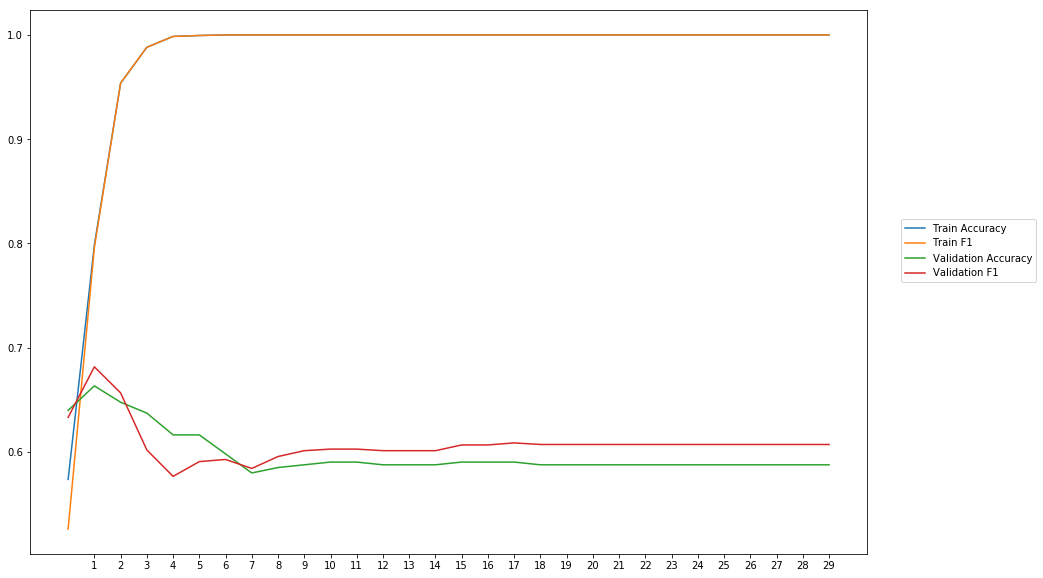

Average Accuracy: 59.77%
Average Precision: 59.60%
Average Recall: 62.17%
Average F1: 60.75%

-----Fold 5--------


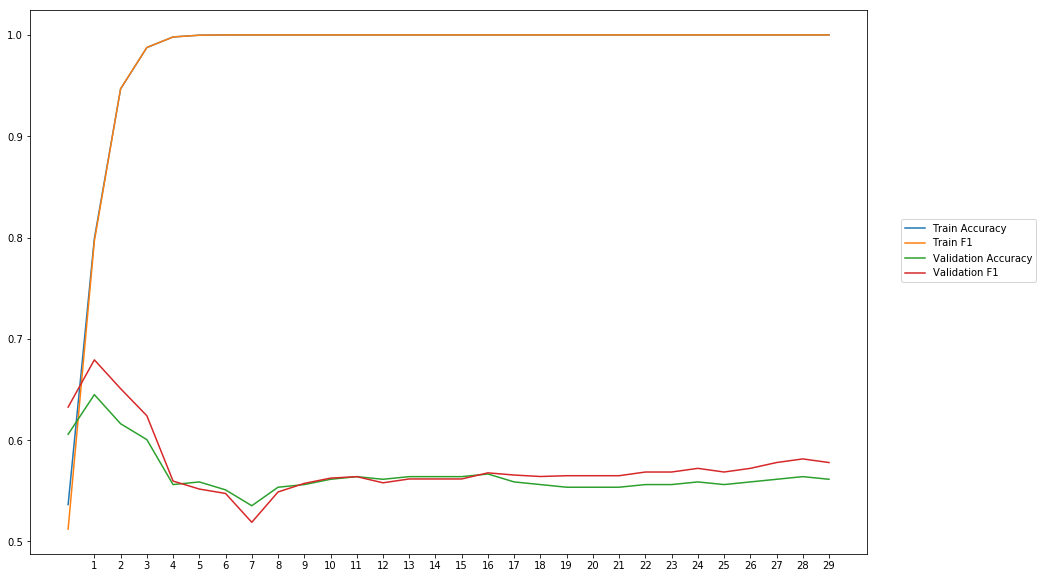

Average Accuracy: 56.57%
Average Precision: 56.37%
Average Recall: 58.58%
Average F1: 57.40%

-----Fold 6--------


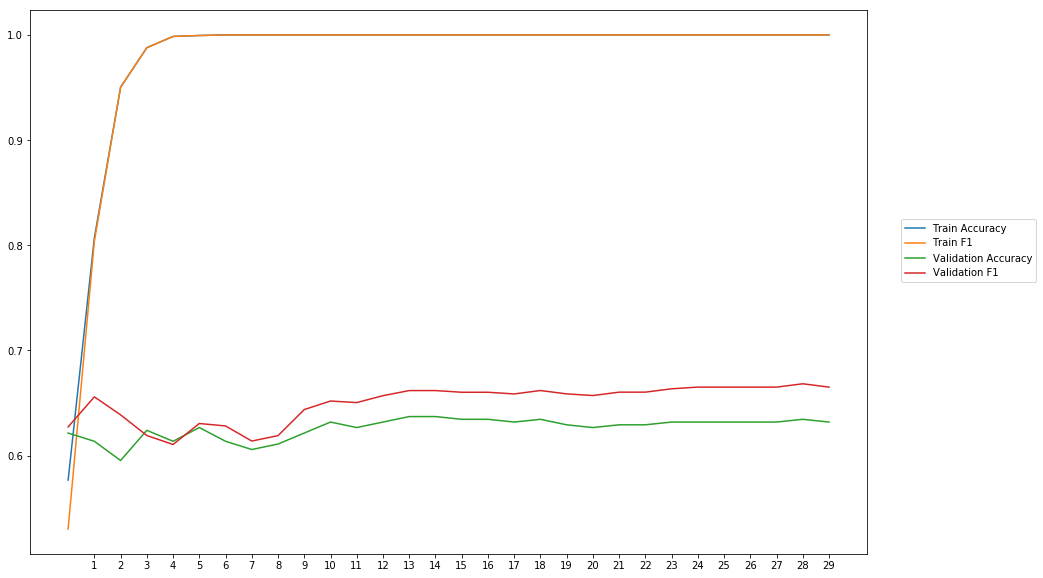

Average Accuracy: 62.62%
Average Precision: 61.24%
Average Recall: 69.43%
Average F1: 65.01%

-----Fold 7--------


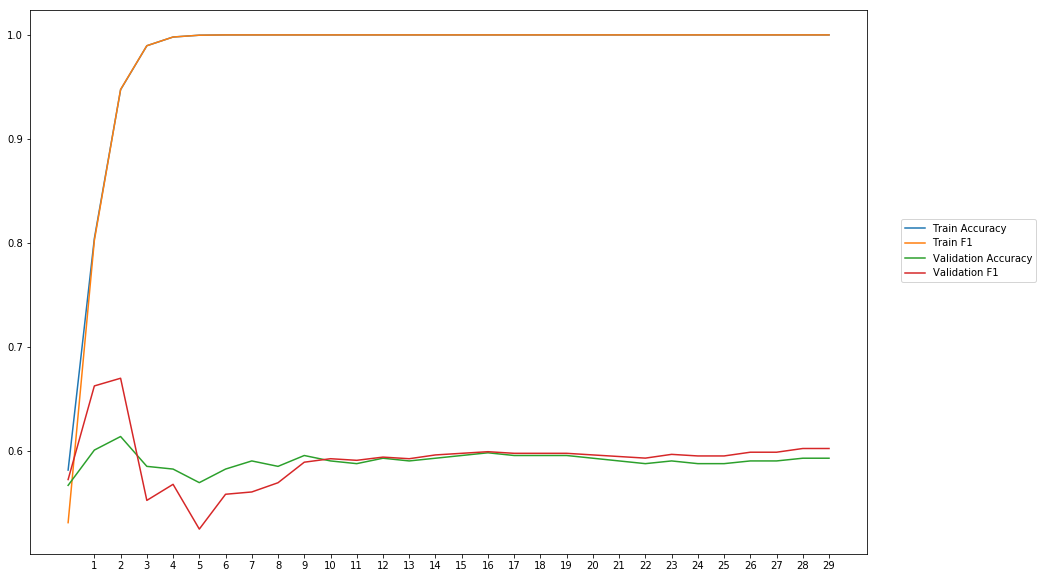

Average Accuracy: 59.01%
Average Precision: 59.07%
Average Recall: 59.57%
Average F1: 59.16%

-----Fold 8--------


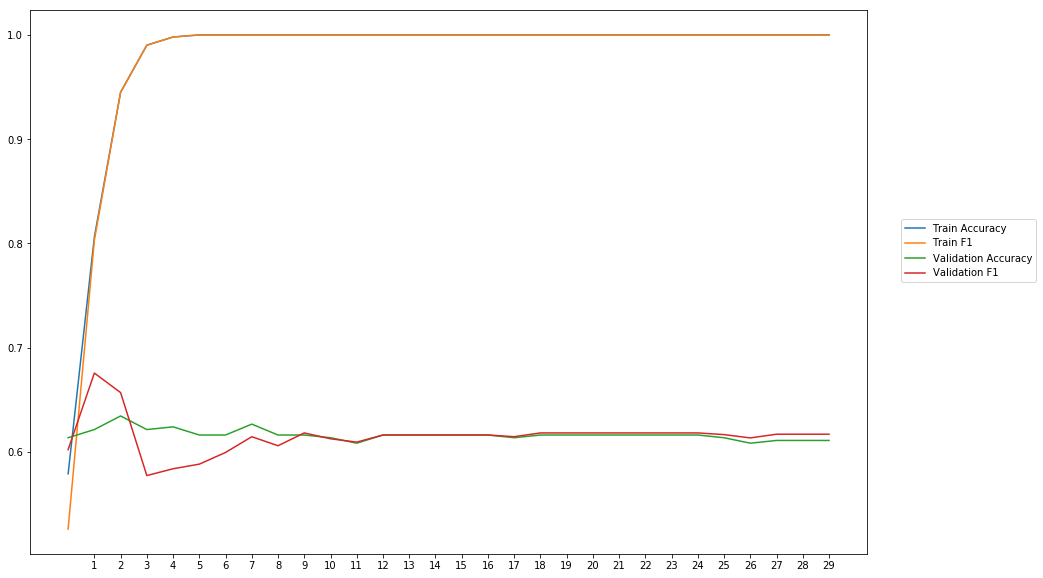

Average Accuracy: 61.64%
Average Precision: 61.94%
Average Recall: 61.30%
Average F1: 61.49%

-----Fold 9--------


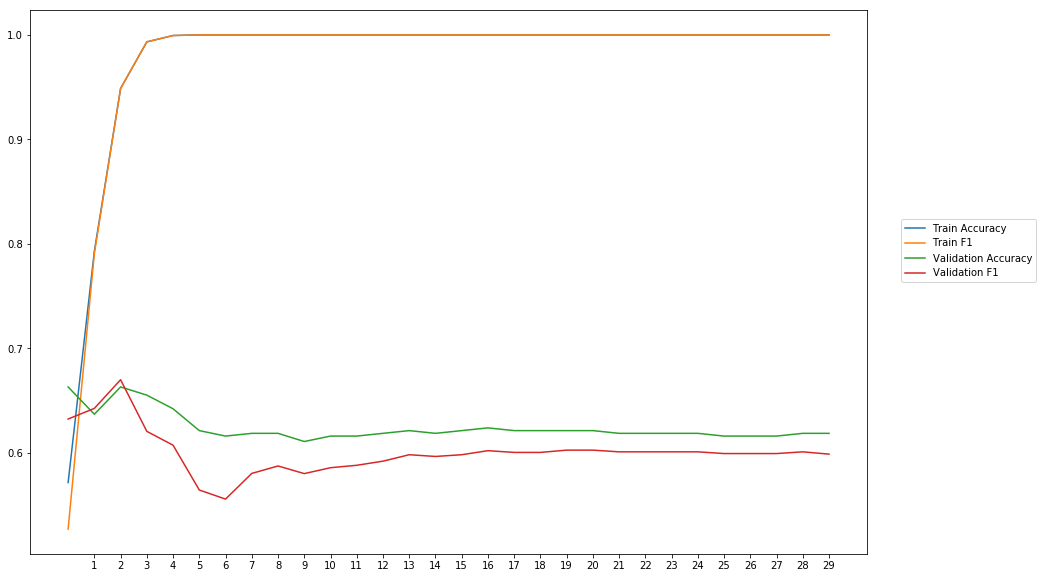

Average Accuracy: 62.44%
Average Precision: 64.34%
Average Recall: 56.42%
Average F1: 60.04%

-----Fold 10--------


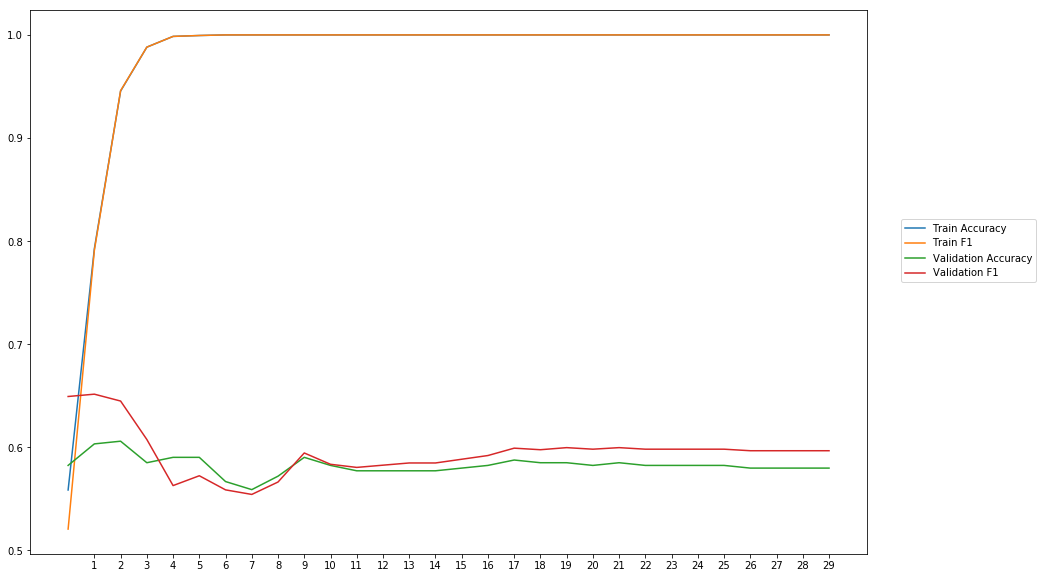

Average Accuracy: 58.22%
Average Precision: 57.90%
Average Recall: 61.27%
Average F1: 59.42%

-------Overallresults-------


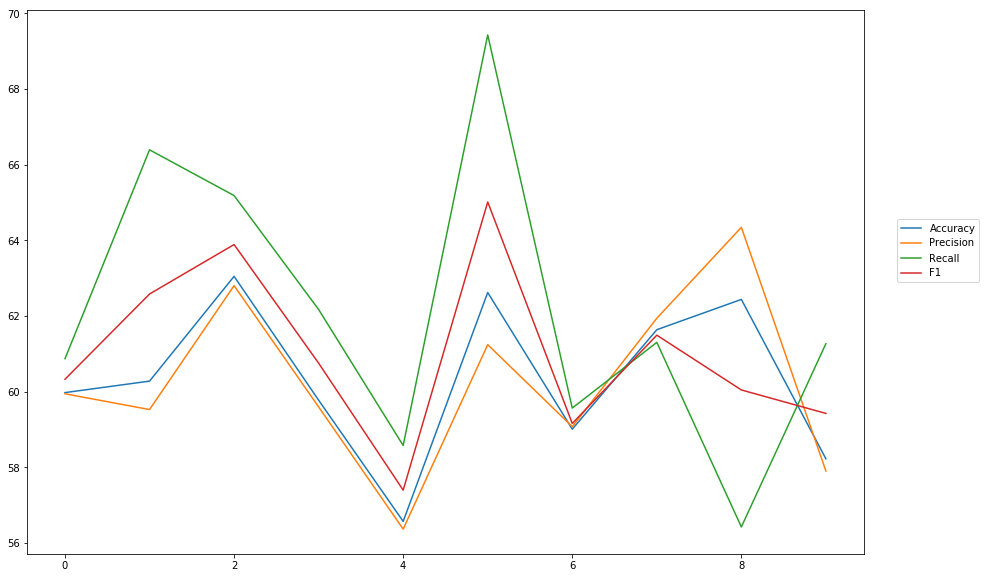

Accuracy: Mean = 60.36% (+/- 1.99%), Max = 63.05%, Min =  56.57%
Precision: Mean = 60.27% (+/- 2.24%), Max = 64.34%, Min =  56.37%
Recall: Mean = 62.12% (+/- 3.68%), Max = 69.43%, Min =  56.42%
F1: Mean = 61.01% (+/- 2.18%), Max = 65.01%, Min =  57.40%


In [15]:
cross_val(model_7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_7')  

## MLP with one hidden Layer, 600 neurons

In [13]:
wv_layer_8new = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_8new = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_8new = wv_layer_8new(comment_input_8new)

#First Dense Layer
x_8new = Dense(600, activation='relu')(embedded_sequences_8new)

x_8new = Flatten()(x_8new)

#Output (Dense) Layer
preds_8new = Dense(2, activation='softmax')(x_8new)

# build the model
model_8new = Model(inputs=[comment_input_8new], outputs=preds_8new)


-----Fold 1--------


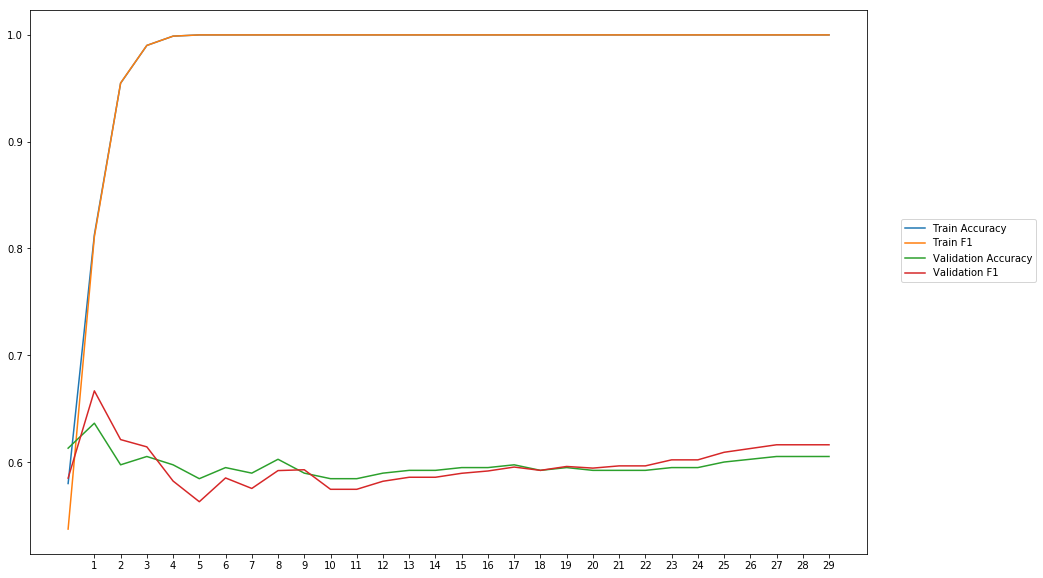

Average Accuracy: 59.71%
Average Precision: 59.85%
Average Recall: 59.64%
Average F1: 59.68%

-----Fold 2--------


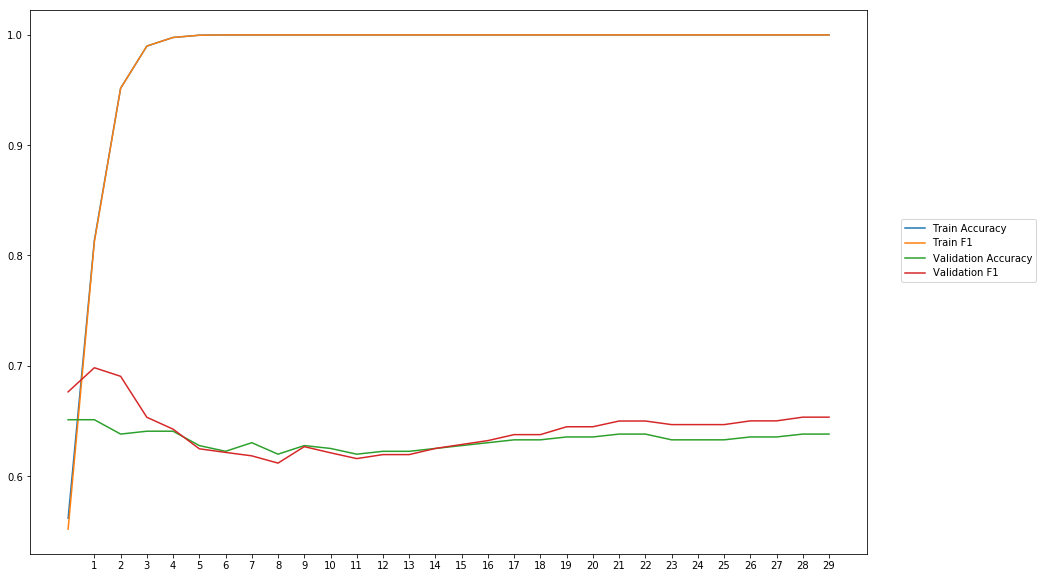

Average Accuracy: 63.26%
Average Precision: 62.95%
Average Recall: 65.54%
Average F1: 64.12%

-----Fold 3--------


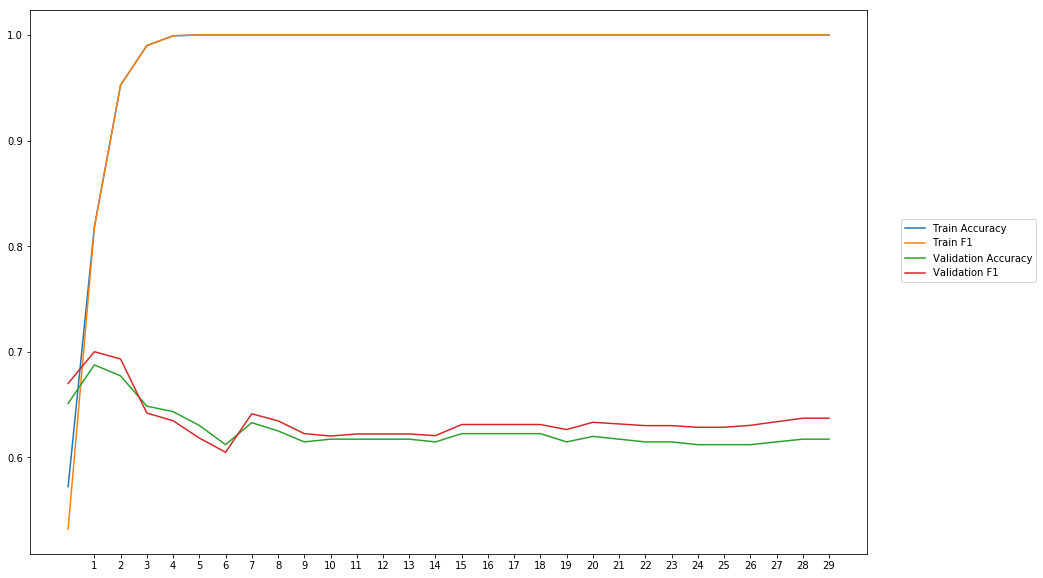

Average Accuracy: 62.53%
Average Precision: 62.25%
Average Recall: 64.78%
Average F1: 63.46%

-----Fold 4--------


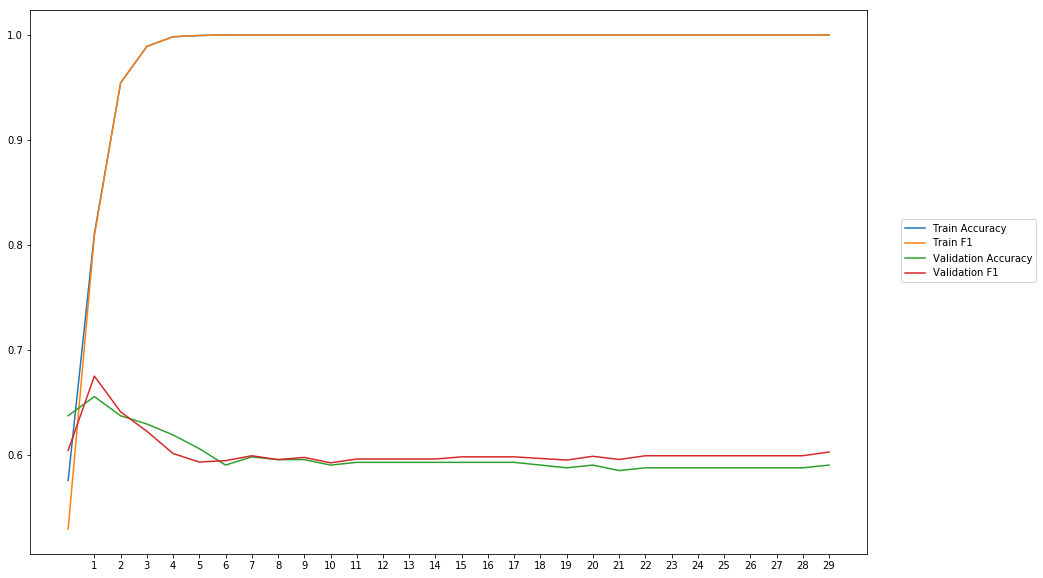

Average Accuracy: 59.85%
Average Precision: 59.88%
Average Recall: 60.69%
Average F1: 60.24%

-----Fold 5--------


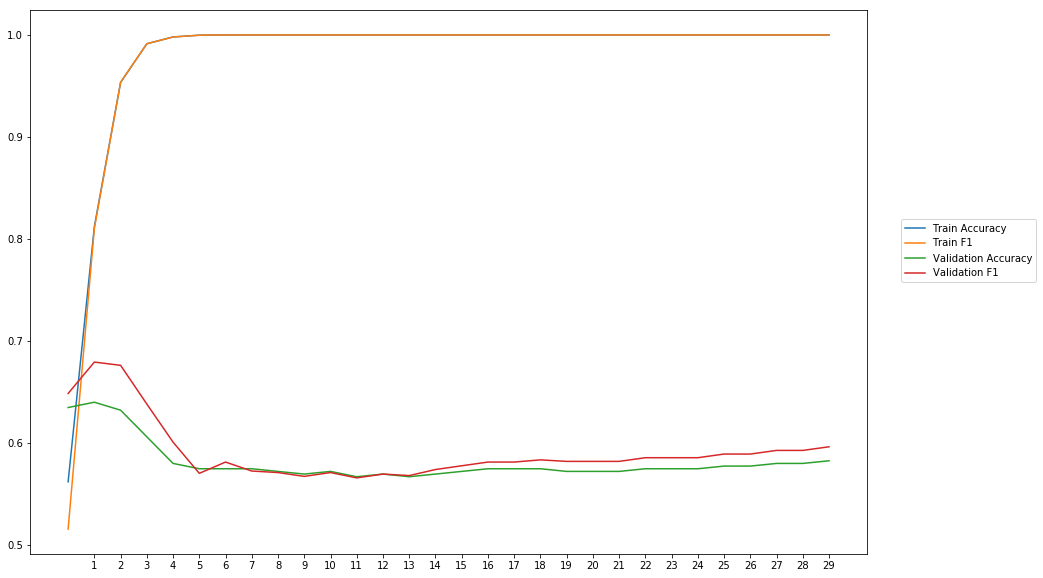

Average Accuracy: 58.09%
Average Precision: 57.76%
Average Recall: 60.62%
Average F1: 59.10%

-----Fold 6--------


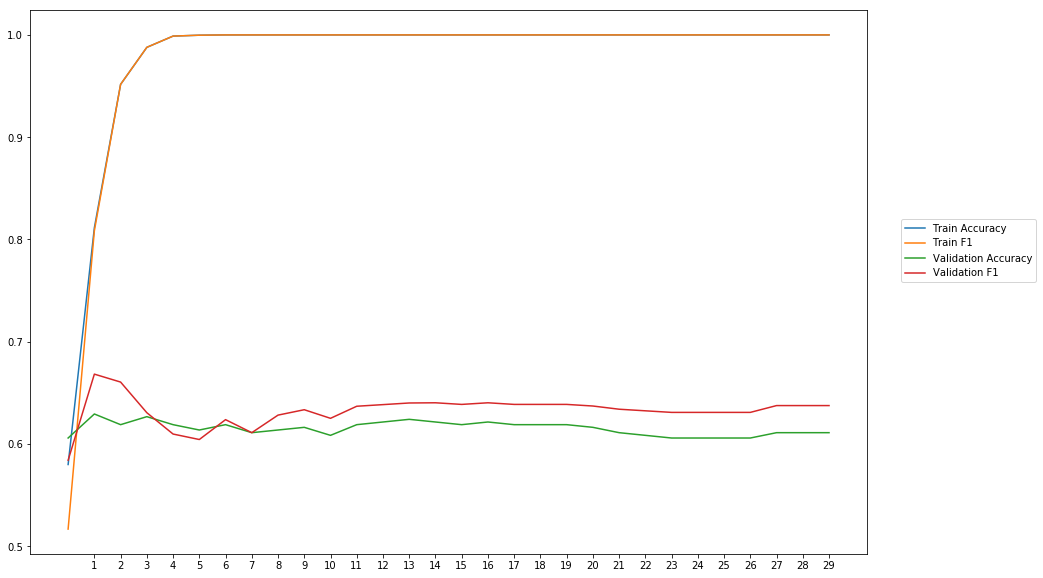

Average Accuracy: 61.51%
Average Precision: 60.70%
Average Recall: 66.13%
Average F1: 63.22%

-----Fold 7--------


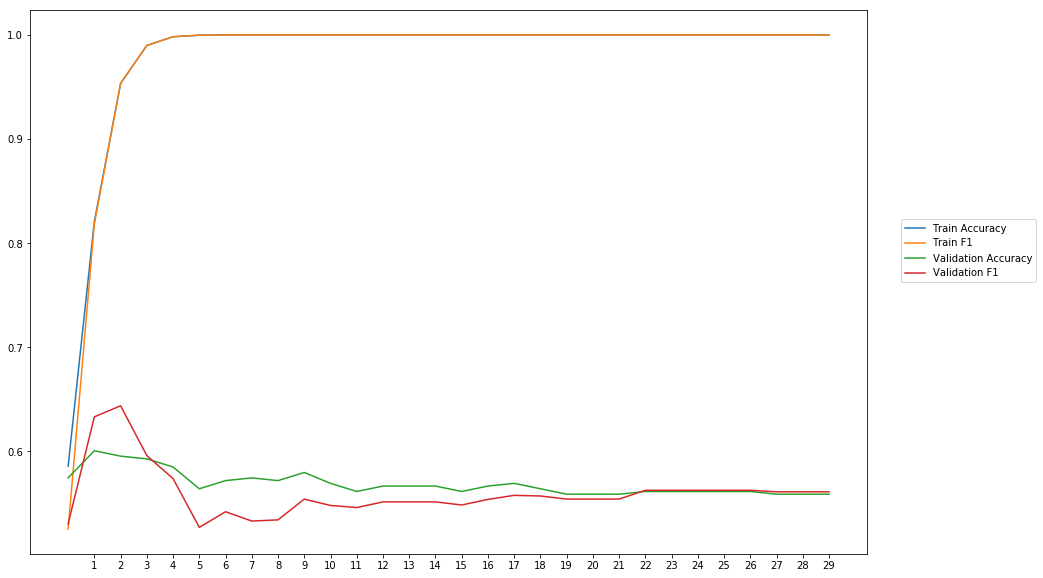

Average Accuracy: 56.87%
Average Precision: 57.32%
Average Recall: 54.91%
Average F1: 55.96%

-----Fold 8--------


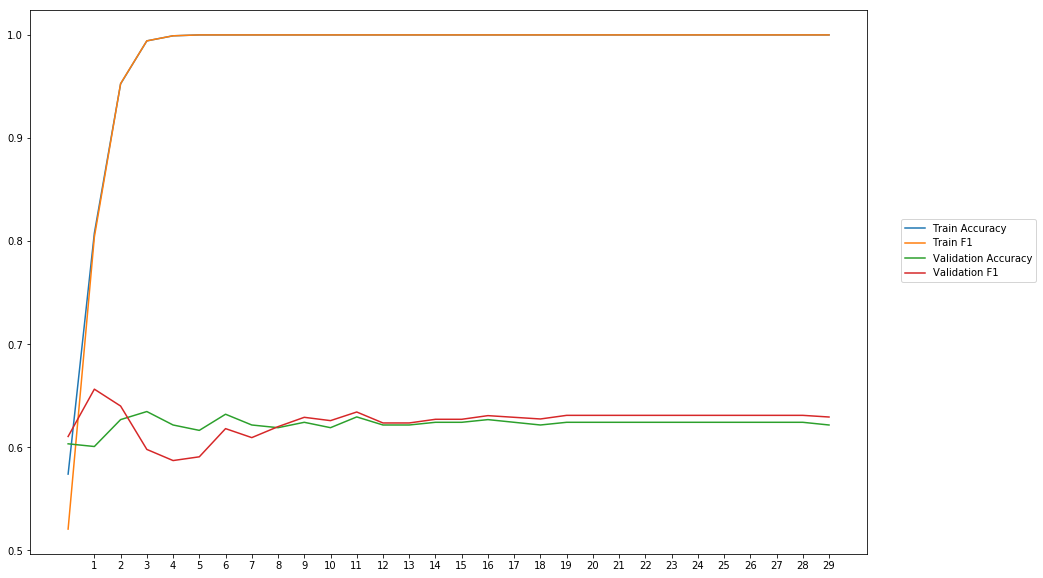

Average Accuracy: 62.24%
Average Precision: 62.32%
Average Recall: 62.83%
Average F1: 62.47%

-----Fold 9--------


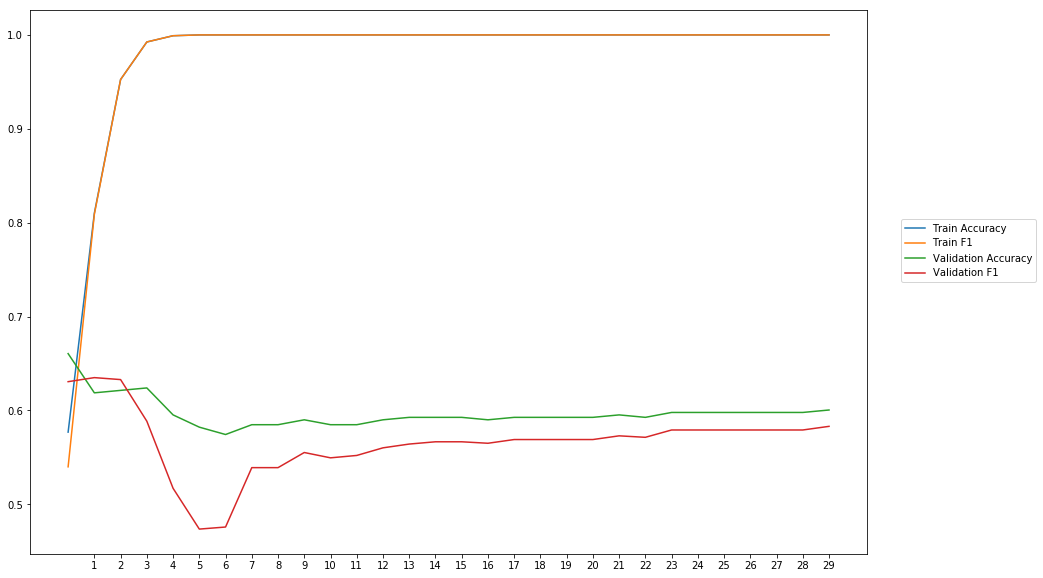

Average Accuracy: 59.70%
Average Precision: 61.48%
Average Recall: 52.85%
Average F1: 56.64%

-----Fold 10--------


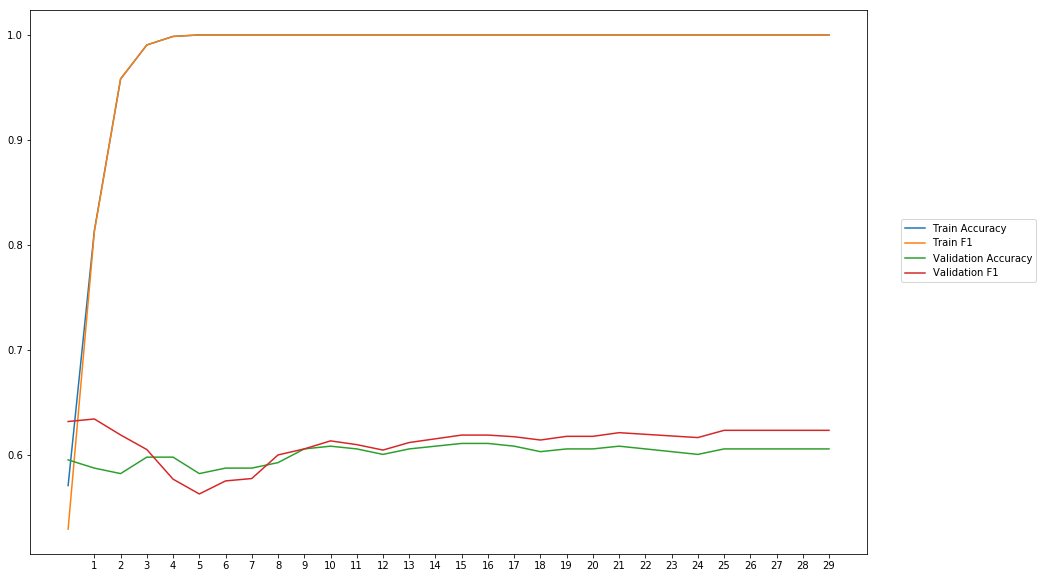

Average Accuracy: 60.12%
Average Precision: 59.78%
Average Recall: 62.71%
Average F1: 61.14%

-------Overallresults-------


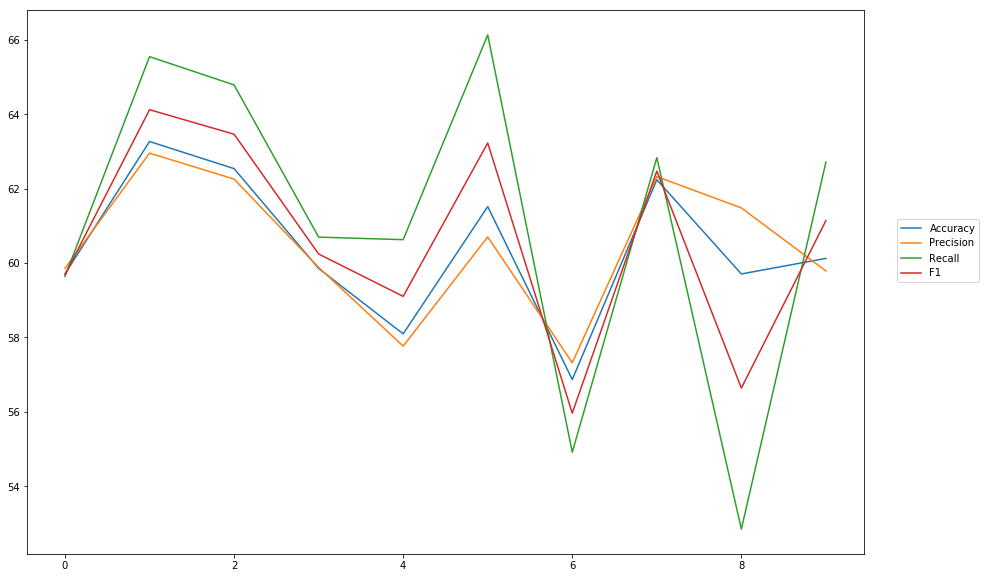

Accuracy: Mean = 60.39% (+/- 1.91%), Max = 63.26%, Min =  56.87%
Precision: Mean = 60.43% (+/- 1.80%), Max = 62.95%, Min =  57.32%
Recall: Mean = 61.07% (+/- 4.16%), Max = 66.13%, Min =  52.85%
F1: Mean = 60.60% (+/- 2.68%), Max = 64.12%, Min =  55.96%


In [10]:
cross_val(model_8new, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_8new') 

## MLP with one hidden layer, 700 neurons

In [11]:
wv_layer_16 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_16 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_16 = wv_layer_16(comment_input_16)

#First Dense Layer
x_16 = Dense(700, activation='relu')(embedded_sequences_16)

x_16 = Flatten()(x_16)

#Output (Dense) Layer
preds_16 = Dense(2, activation='softmax')(x_16)

# build the model
model_16 = Model(inputs=[comment_input_16], outputs=preds_16)


-----Fold 1--------


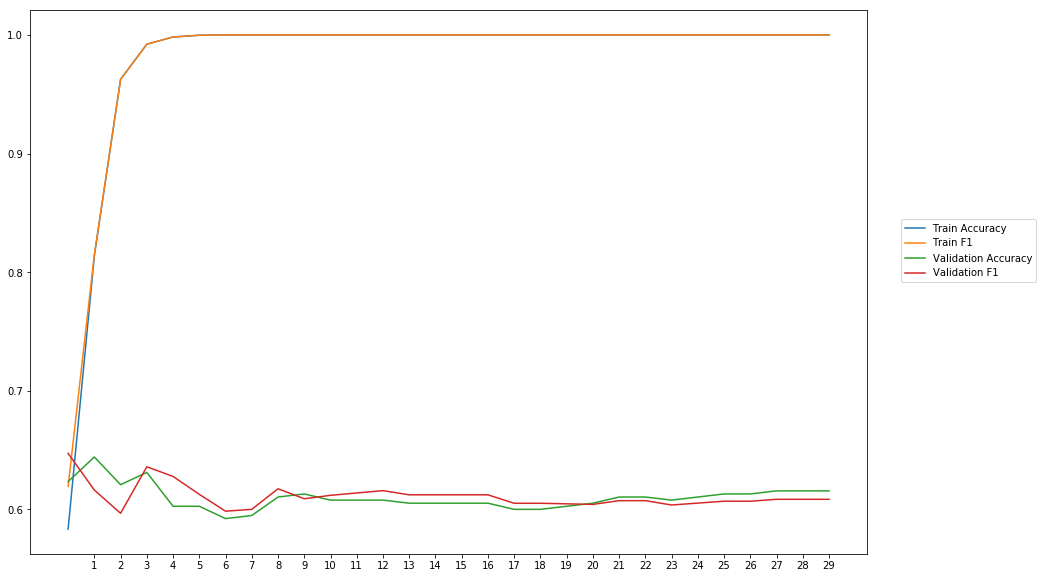

Average Accuracy: 61.00%
Average Precision: 60.83%
Average Recall: 61.49%
Average F1: 61.11%

-----Fold 2--------


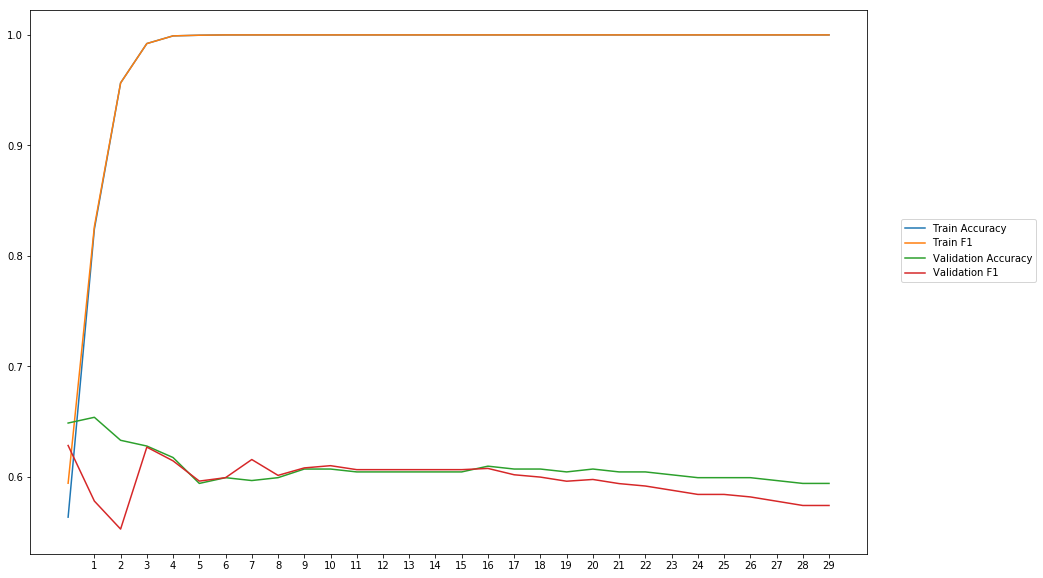

Average Accuracy: 60.76%
Average Precision: 61.26%
Average Recall: 58.55%
Average F1: 59.69%

-----Fold 3--------


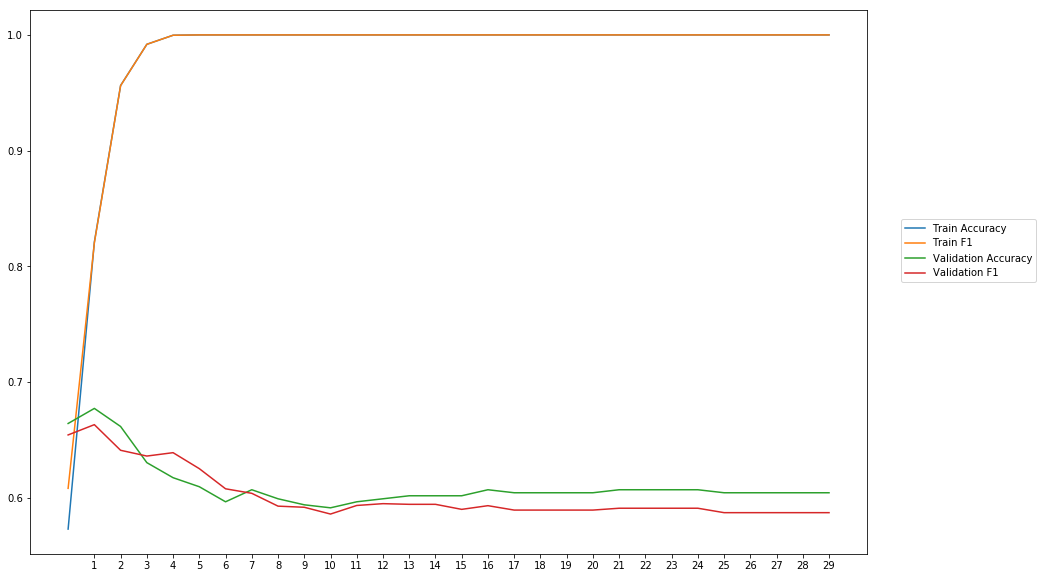

Average Accuracy: 61.06%
Average Precision: 61.28%
Average Recall: 59.20%
Average F1: 60.18%

-----Fold 4--------


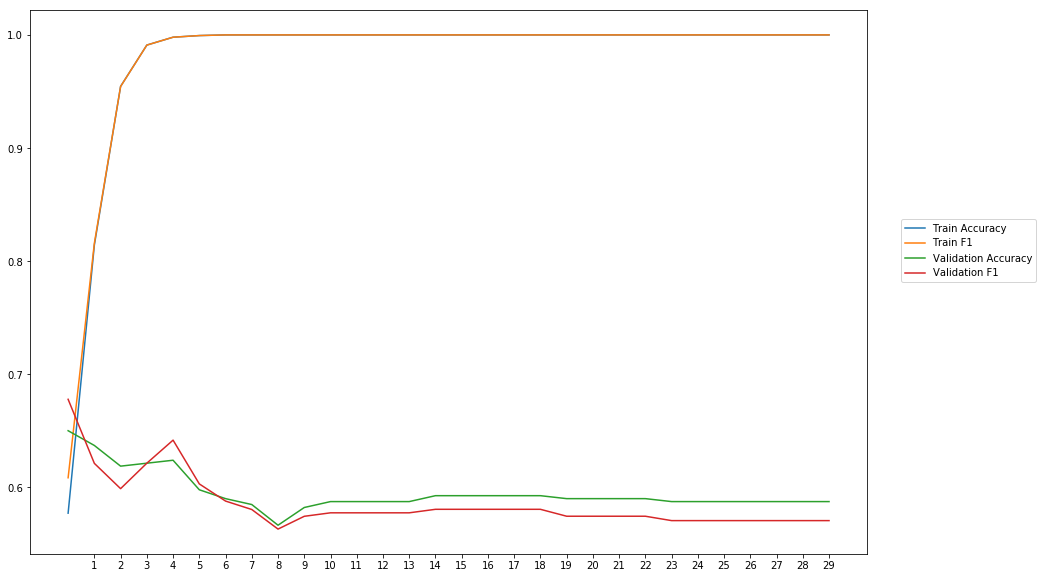

Average Accuracy: 59.53%
Average Precision: 59.78%
Average Recall: 57.54%
Average F1: 58.59%

-----Fold 5--------


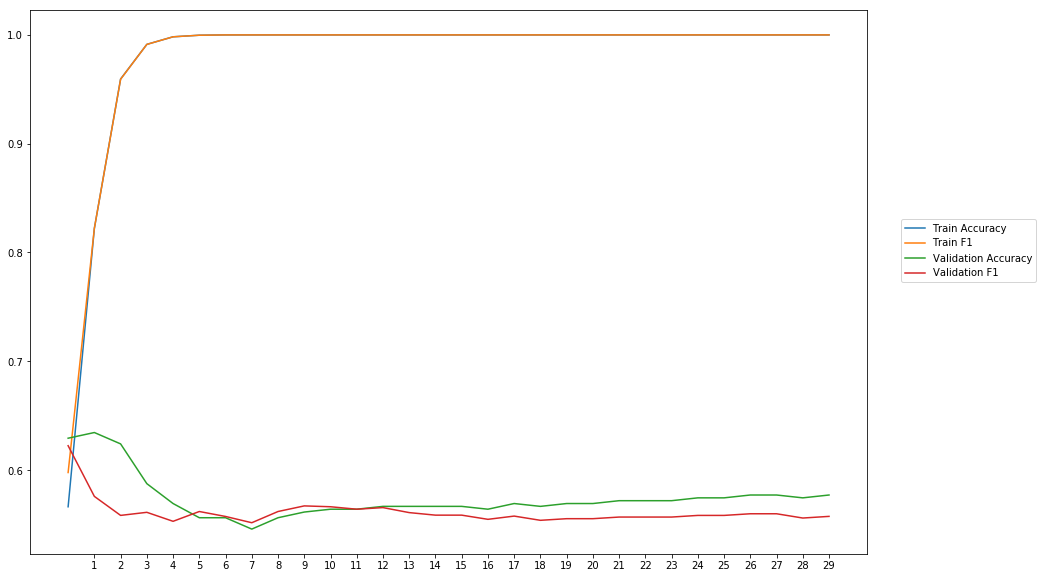

Average Accuracy: 57.41%
Average Precision: 57.92%
Average Recall: 54.64%
Average F1: 56.13%

-----Fold 6--------


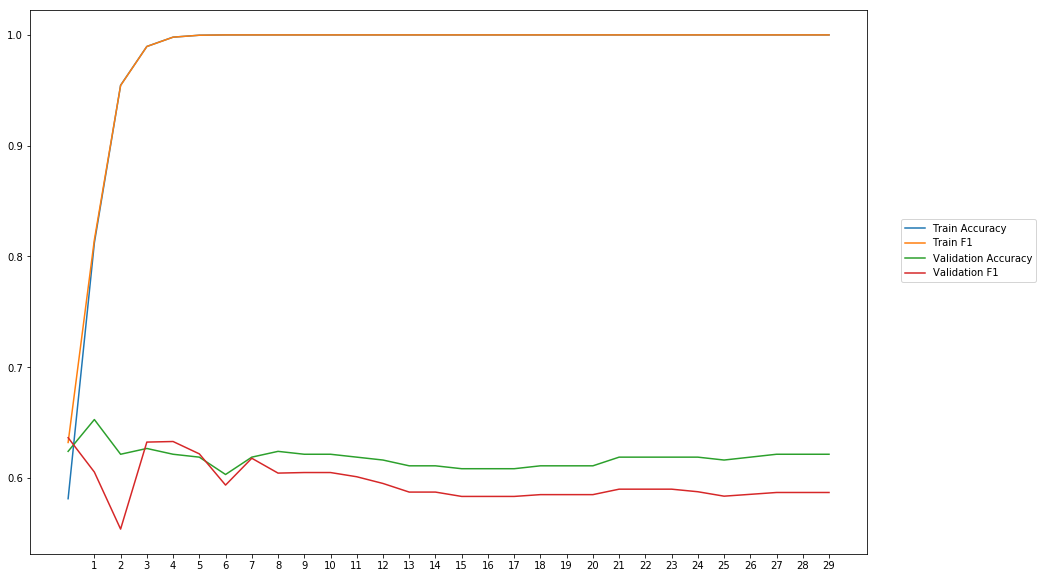

Average Accuracy: 61.81%
Average Precision: 63.17%
Average Recall: 56.56%
Average F1: 59.57%

-----Fold 7--------


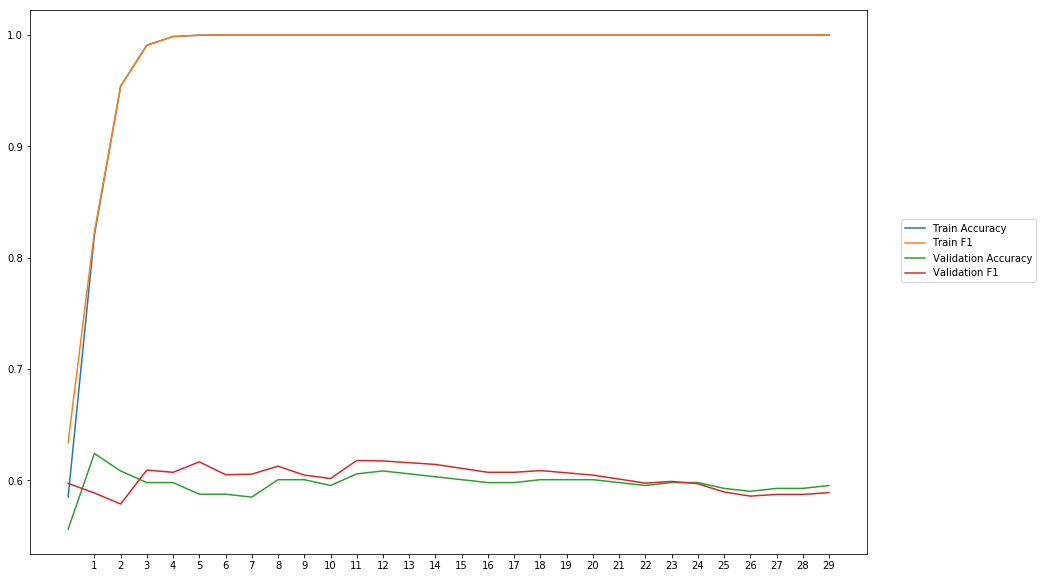

Average Accuracy: 59.71%
Average Precision: 59.40%
Average Recall: 61.24%
Average F1: 60.23%

-----Fold 8--------


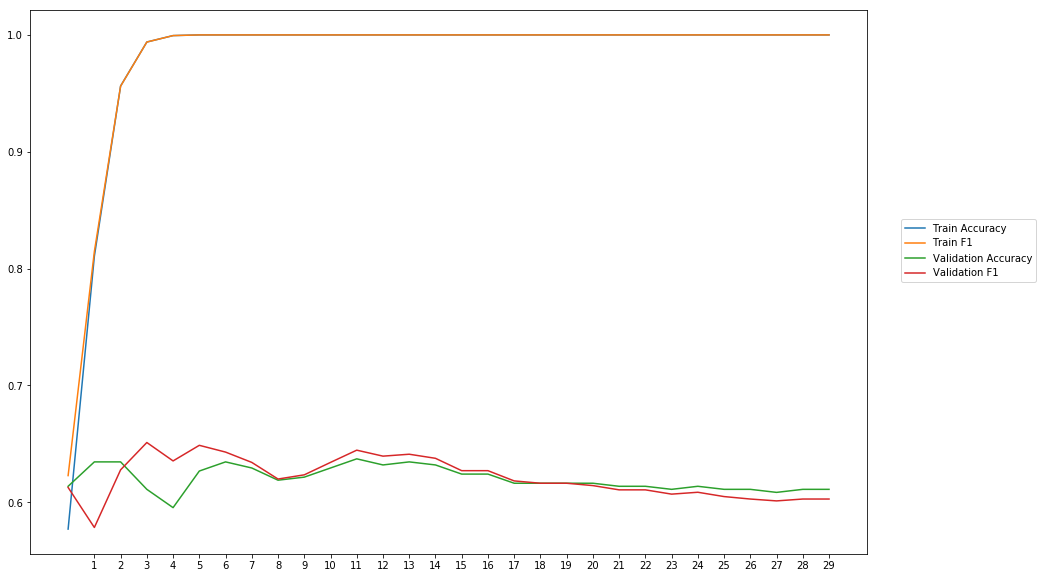

Average Accuracy: 62.00%
Average Precision: 61.83%
Average Recall: 62.65%
Average F1: 62.13%

-----Fold 9--------


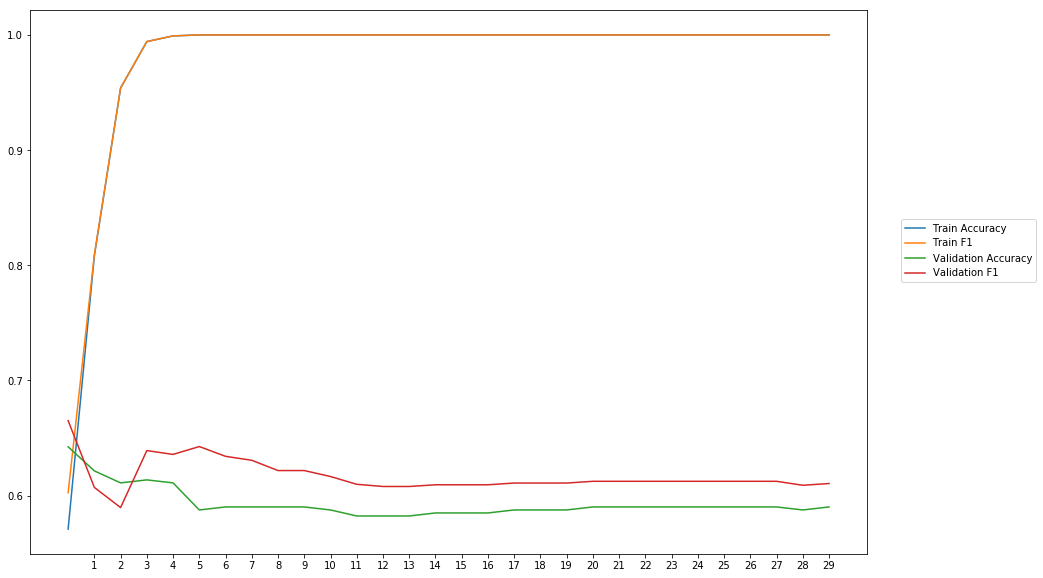

Average Accuracy: 59.32%
Average Precision: 58.22%
Average Recall: 65.76%
Average F1: 61.69%

-----Fold 10--------


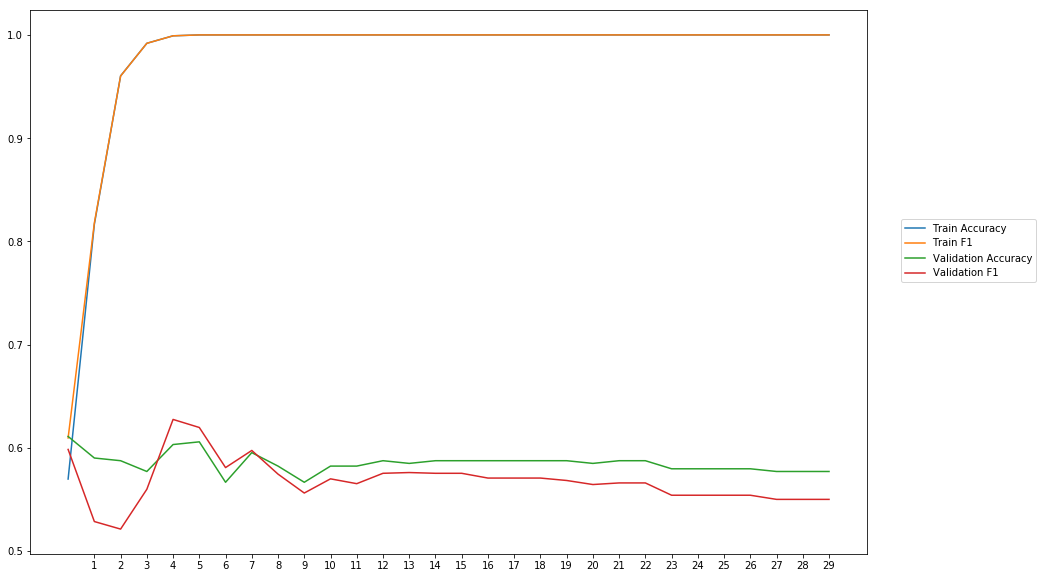

Average Accuracy: 58.52%
Average Precision: 59.10%
Average Recall: 54.89%
Average F1: 56.81%

-------Overallresults-------


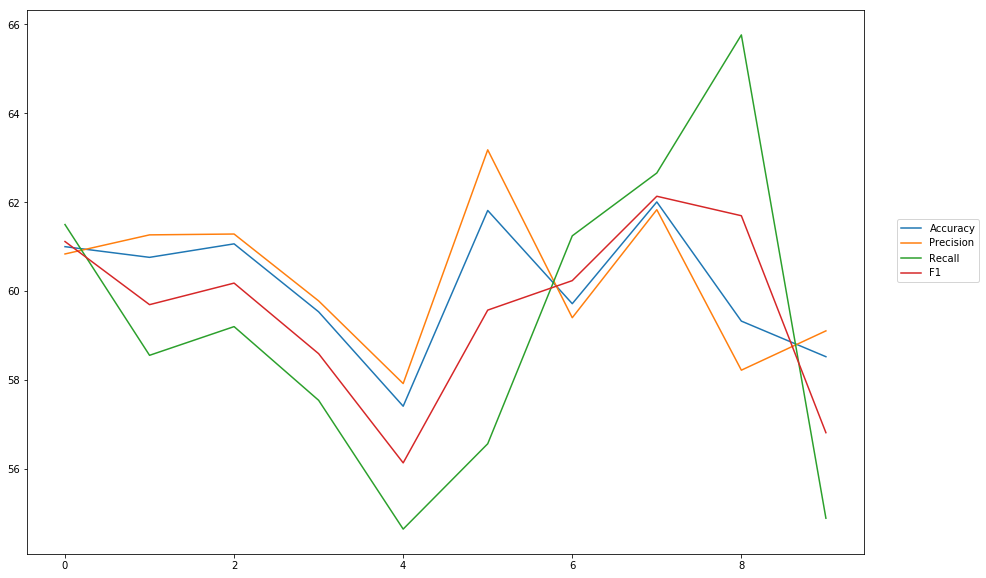

Accuracy: Mean = 60.11% (+/- 1.40%), Max = 62.00%, Min =  57.41%
Precision: Mean = 60.28% (+/- 1.59%), Max = 63.17%, Min =  57.92%
Recall: Mean = 59.25% (+/- 3.37%), Max = 65.76%, Min =  54.64%
F1: Mean = 59.61% (+/- 1.86%), Max = 62.13%, Min =  56.13%


In [12]:
cross_val(model_16, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_1_700') 

## MLP with one hidden layer, 300 neurons

In [15]:
wv_layer_8 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_8 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_8 = wv_layer_8(comment_input_8)

#First Dense Layer
x_8 = Dense(300, activation='relu')(embedded_sequences_8)

x_8 = Flatten()(x_8)

#Output (Dense) Layer
preds_8 = Dense(2, activation='softmax')(x_8)

# build the model
model_8 = Model(inputs=[comment_input_8], outputs=preds_8)


-----Fold 1--------


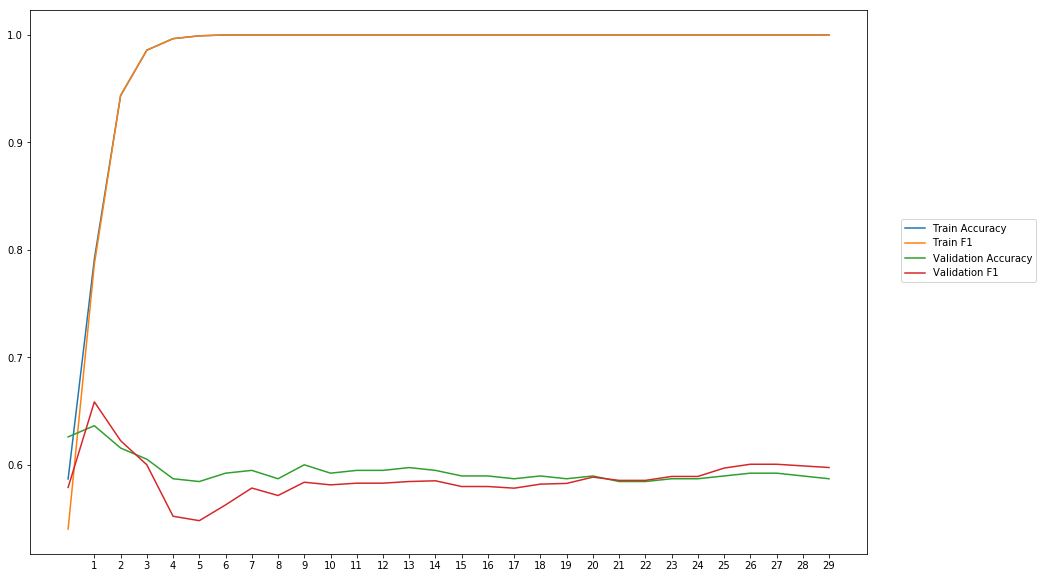

Average Accuracy: 59.43%
Average Precision: 59.97%
Average Recall: 57.63%
Average F1: 58.69%

-----Fold 2--------


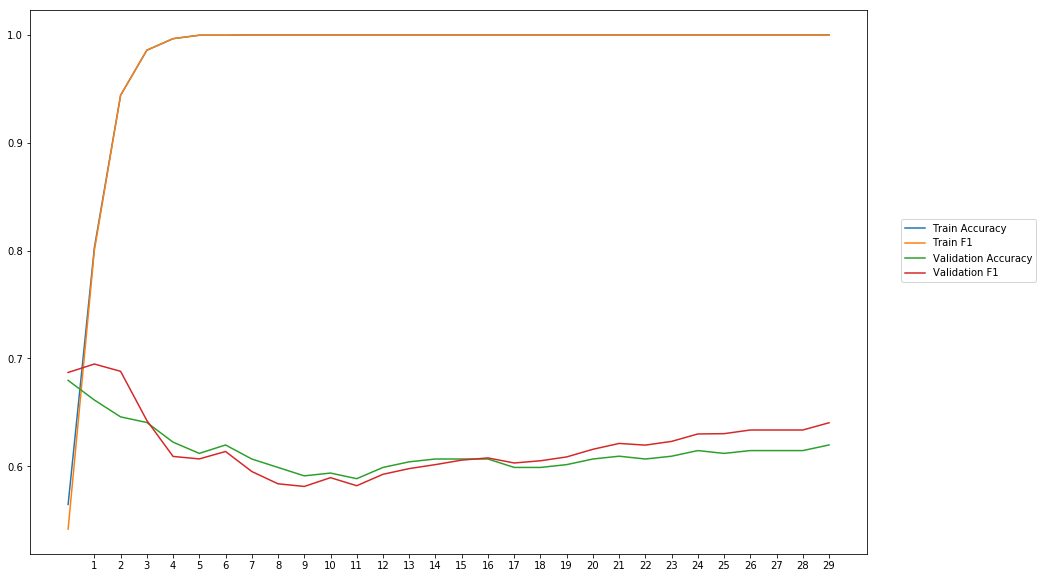

Average Accuracy: 61.35%
Average Precision: 61.27%
Average Recall: 62.78%
Average F1: 61.93%

-----Fold 3--------


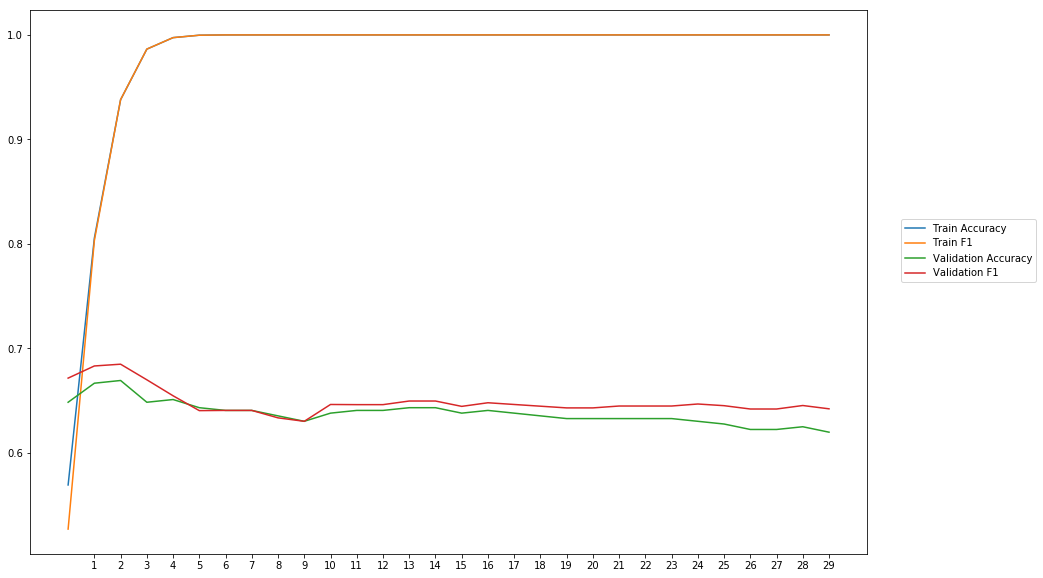

Average Accuracy: 63.81%
Average Precision: 63.37%
Average Recall: 66.46%
Average F1: 64.85%

-----Fold 4--------


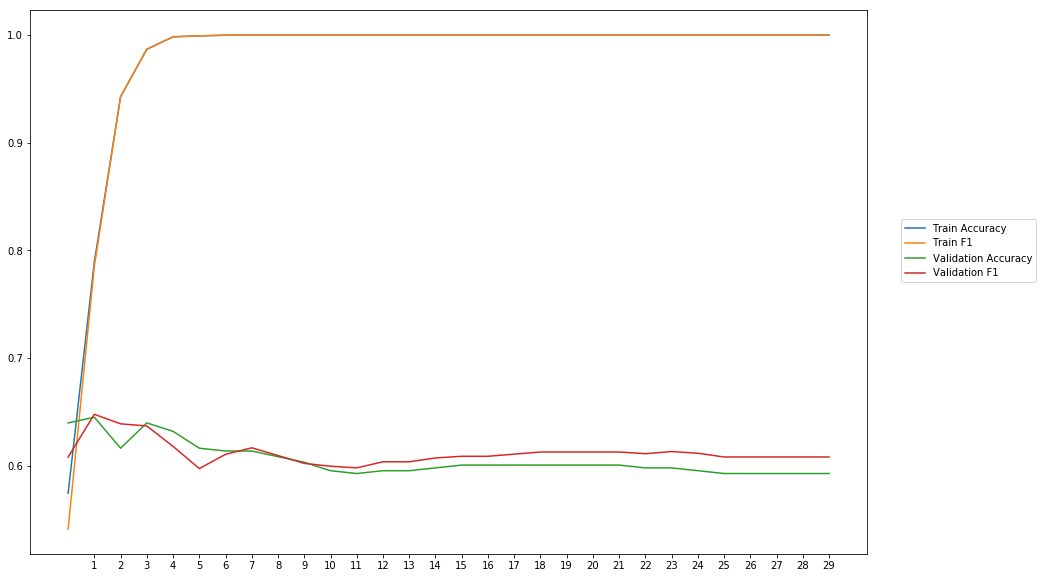

Average Accuracy: 60.54%
Average Precision: 60.46%
Average Recall: 62.01%
Average F1: 61.17%

-----Fold 5--------


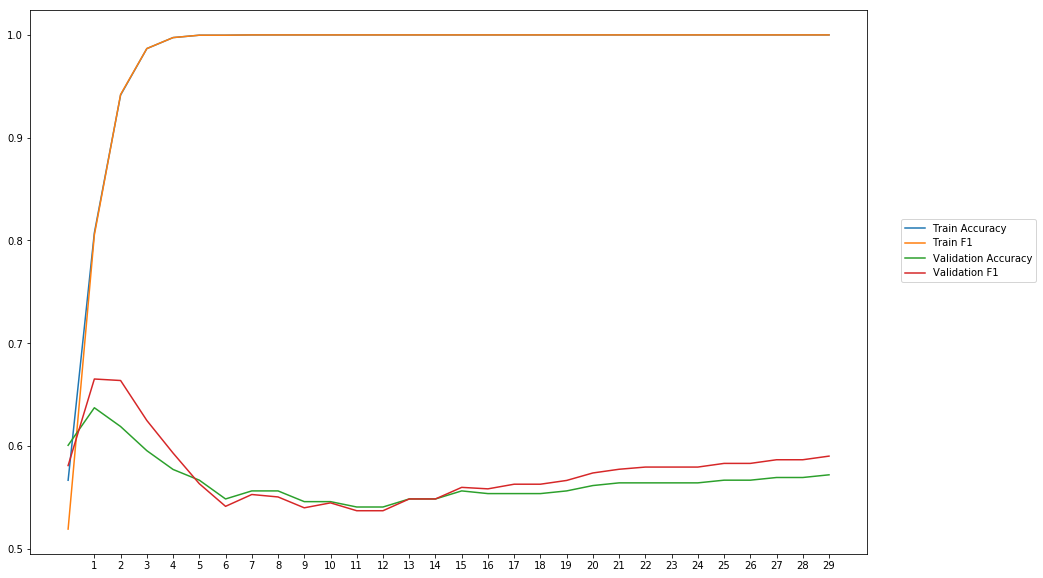

Average Accuracy: 56.53%
Average Precision: 56.34%
Average Recall: 58.61%
Average F1: 57.39%

-----Fold 6--------


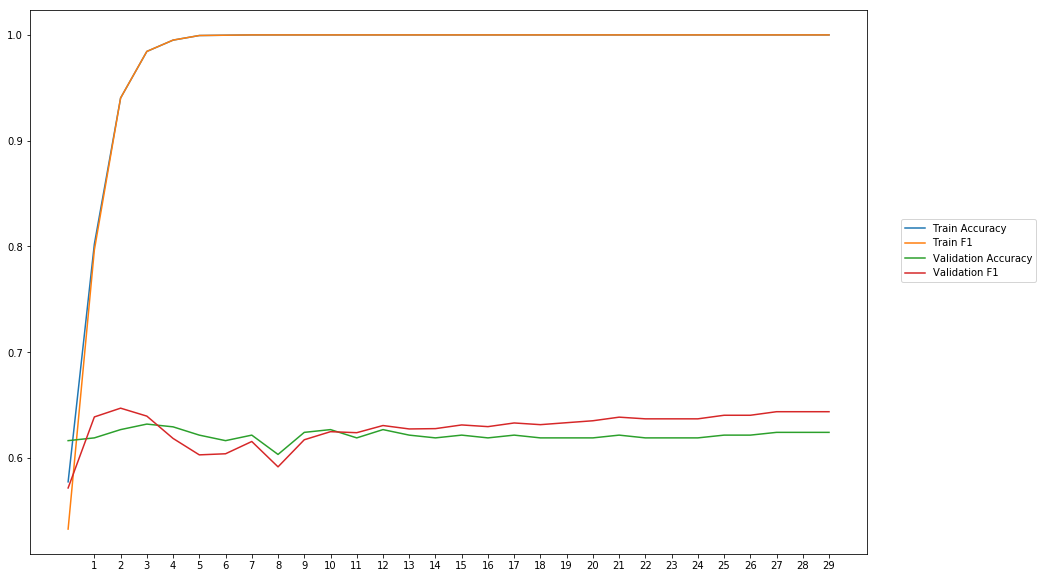

Average Accuracy: 62.11%
Average Precision: 61.87%
Average Recall: 63.89%
Average F1: 62.77%

-----Fold 7--------


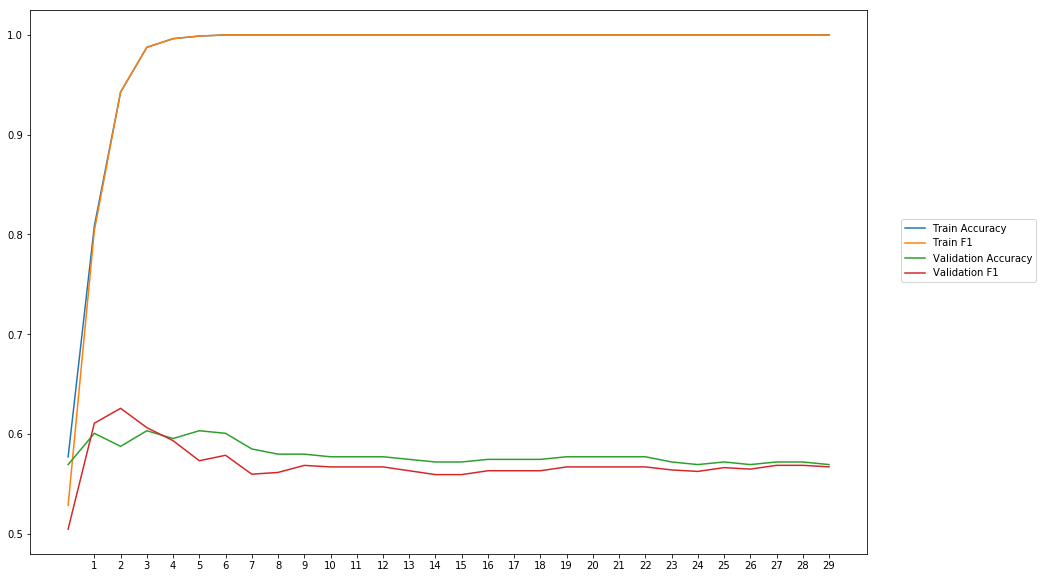

Average Accuracy: 57.93%
Average Precision: 58.48%
Average Recall: 55.61%
Average F1: 56.93%

-----Fold 8--------


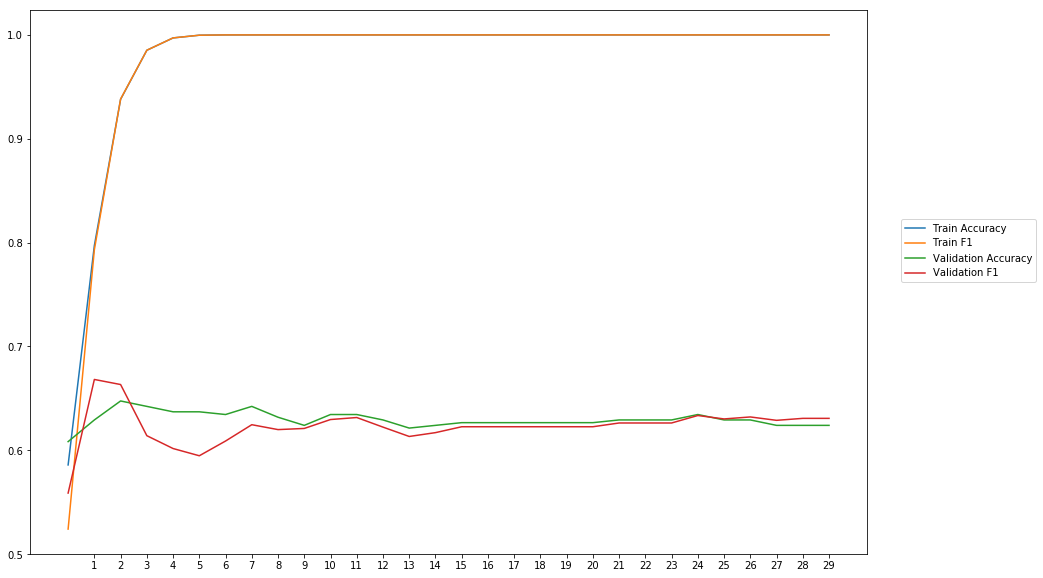

Average Accuracy: 62.97%
Average Precision: 63.67%
Average Recall: 61.23%
Average F1: 62.30%

-----Fold 9--------


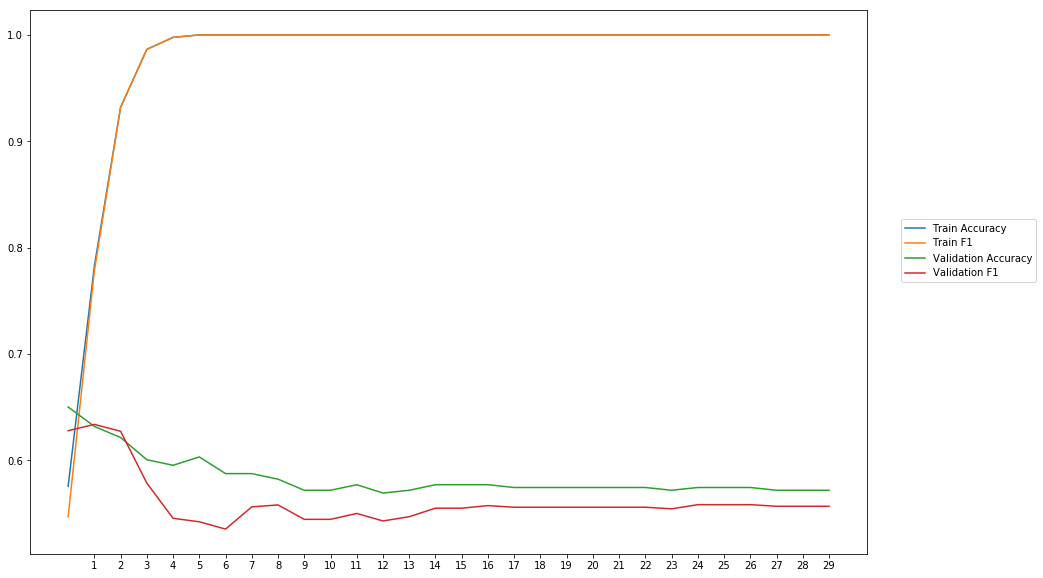

Average Accuracy: 58.36%
Average Precision: 59.52%
Average Recall: 53.19%
Average F1: 56.12%

-----Fold 10--------


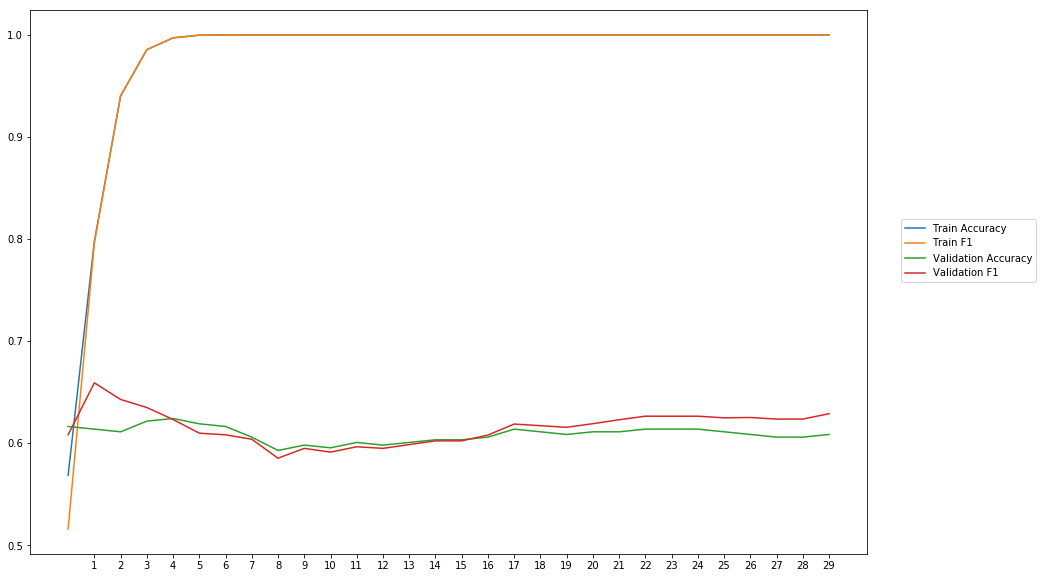

Average Accuracy: 60.86%
Average Precision: 60.66%
Average Recall: 62.55%
Average F1: 61.53%

-------Overallresults-------


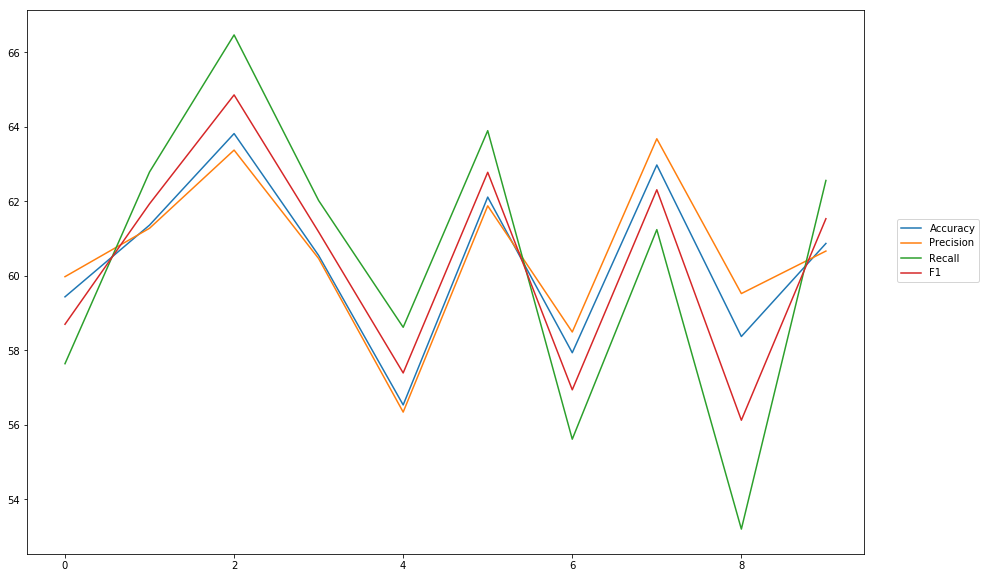

Accuracy: Mean = 60.39% (+/- 2.20%), Max = 63.81%, Min =  56.53%
Precision: Mean = 60.56% (+/- 2.08%), Max = 63.67%, Min =  56.34%
Recall: Mean = 60.40% (+/- 3.85%), Max = 66.46%, Min =  53.19%
F1: Mean = 60.37% (+/- 2.75%), Max = 64.85%, Min =  56.12%


In [16]:
cross_val(model_8, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_8')  

## MLP with one hidden Layer, 200 neurons

In [ ]:
wv_layer_9 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_9 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_9 = wv_layer_9(comment_input_9)

#First Dense Layer
x_9 = Dense(200, activation='relu')(embedded_sequences_9)

x_9 = Flatten()(x_9)

#Output (Dense) Layer
preds_9 = Dense(2, activation='softmax')(x_9)

# build the model
model_9 = Model(inputs=[comment_input_9], outputs=preds_9)


-----Fold 1--------


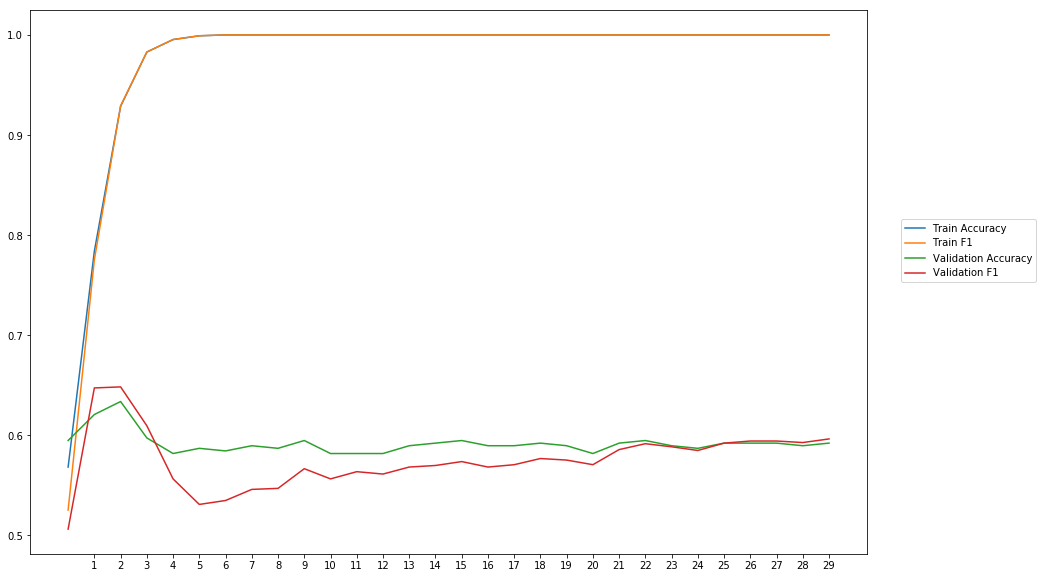

Average Accuracy: 59.19%
Average Precision: 60.13%
Average Recall: 55.54%
Average F1: 57.57%

-----Fold 2--------


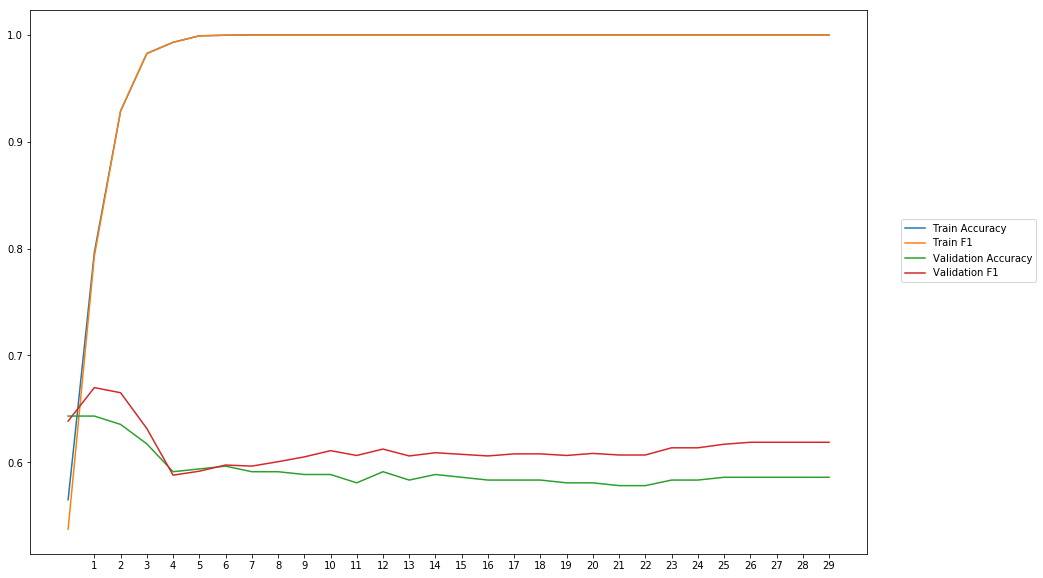

Average Accuracy: 59.24%
Average Precision: 58.65%
Average Recall: 64.40%
Average F1: 61.35%

-----Fold 3--------


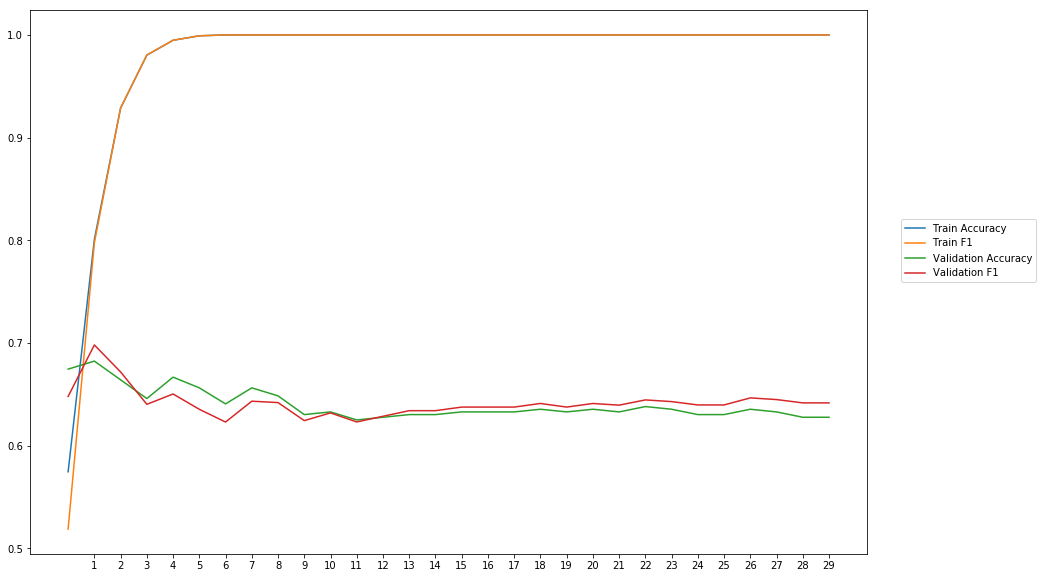

Average Accuracy: 64.01%
Average Precision: 64.33%
Average Recall: 64.06%
Average F1: 64.13%

-----Fold 4--------


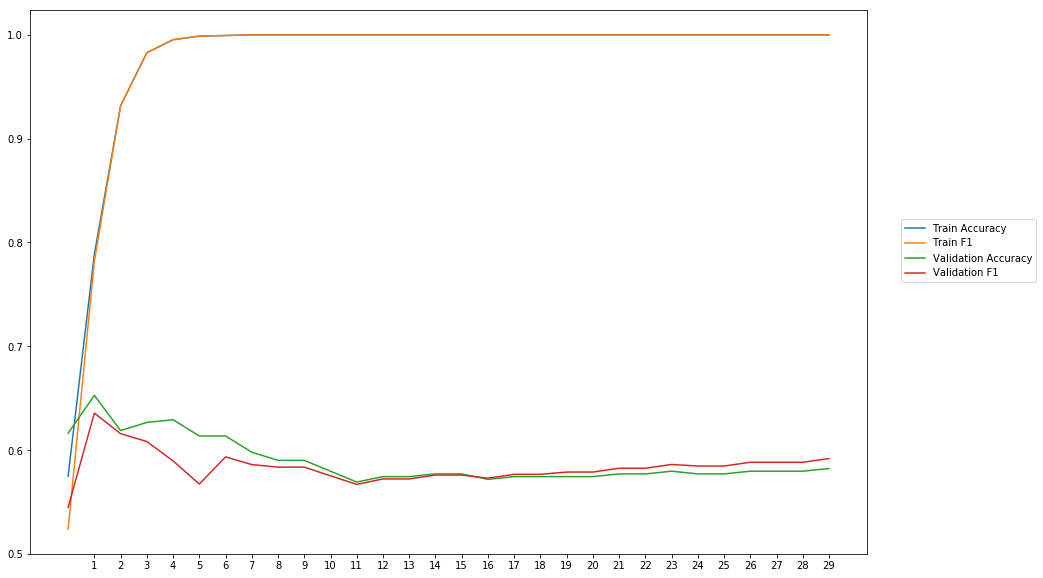

Average Accuracy: 58.93%
Average Precision: 59.57%
Average Recall: 57.43%
Average F1: 58.36%

-----Fold 5--------


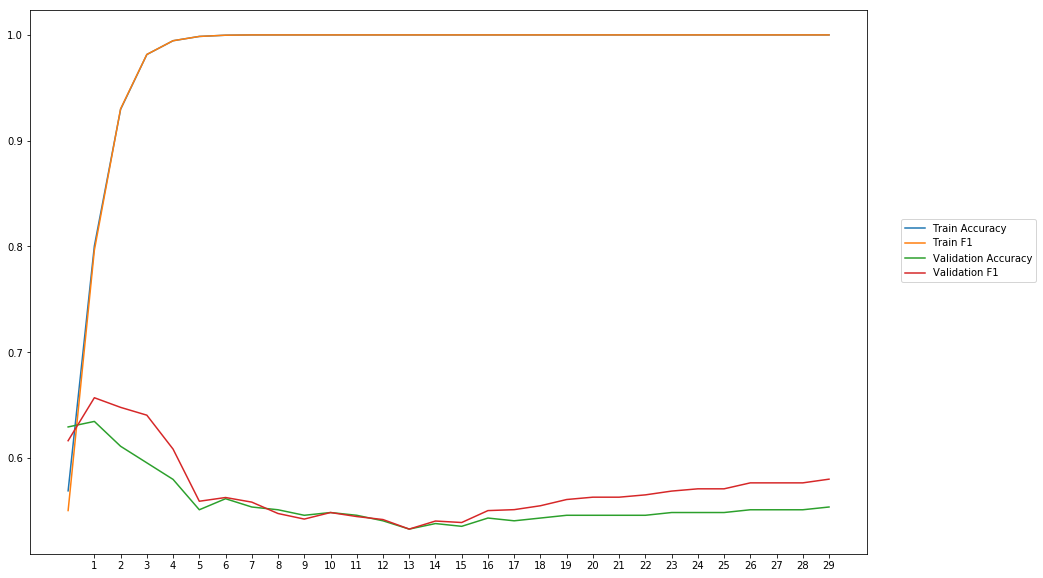

Average Accuracy: 55.71%
Average Precision: 55.47%
Average Recall: 58.82%
Average F1: 57.04%

-----Fold 6--------


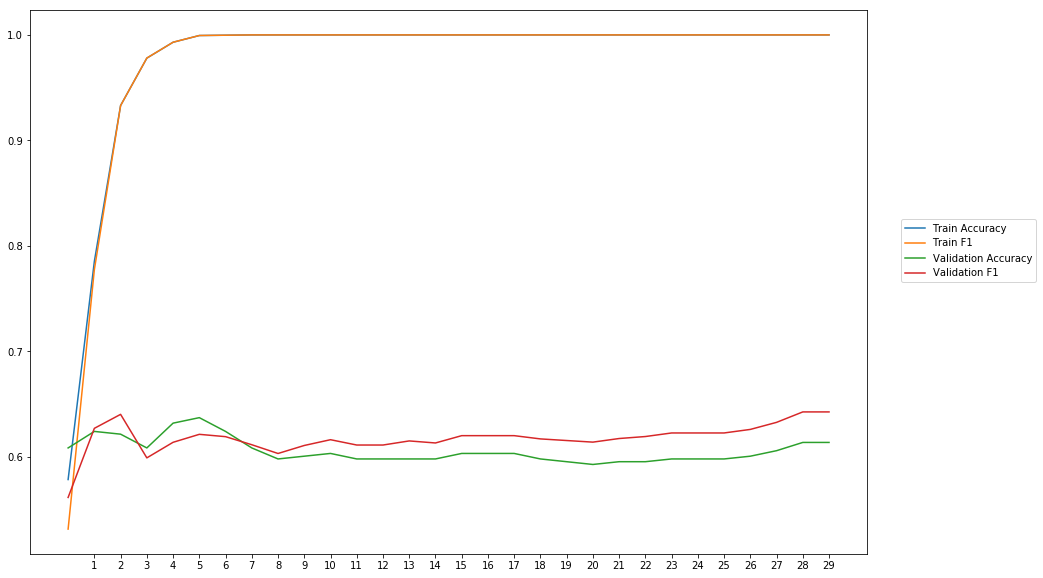

Average Accuracy: 60.57%
Average Precision: 60.19%
Average Recall: 63.63%
Average F1: 61.76%

-----Fold 7--------


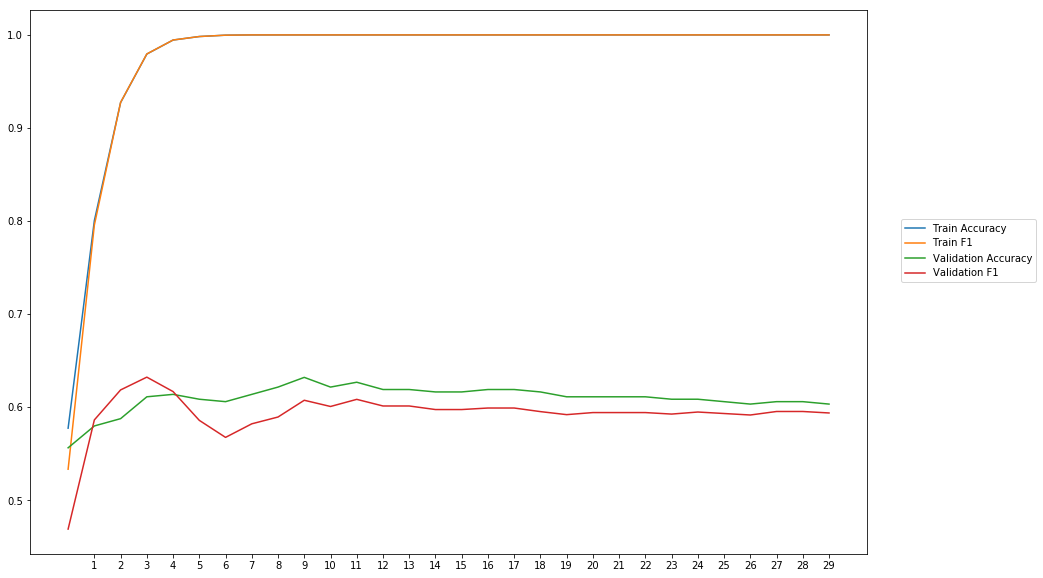

Average Accuracy: 60.95%
Average Precision: 62.13%
Average Recall: 56.87%
Average F1: 59.27%

-----Fold 8--------


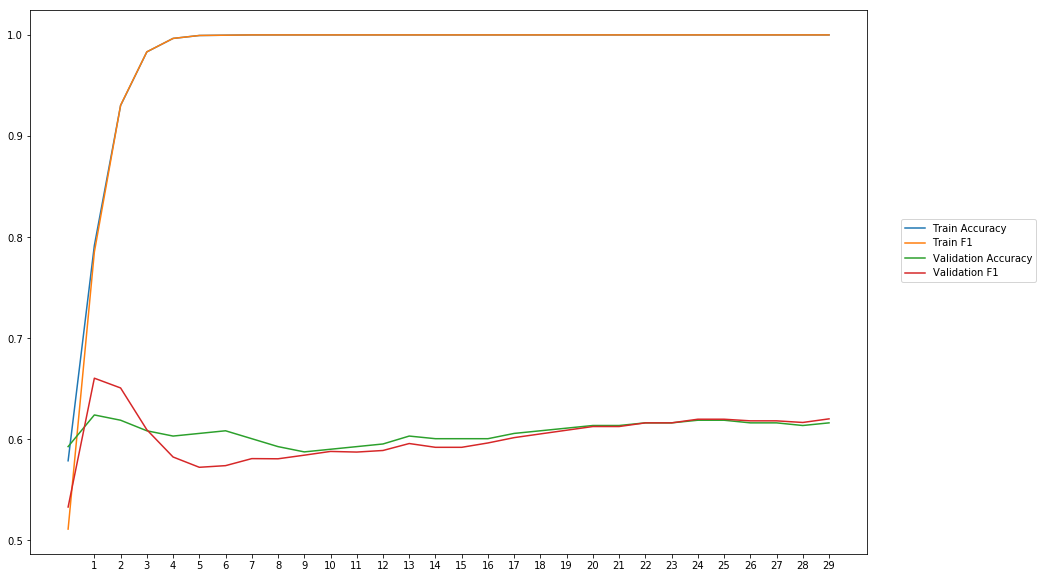

Average Accuracy: 60.70%
Average Precision: 61.13%
Average Recall: 59.48%
Average F1: 60.18%

-----Fold 9--------


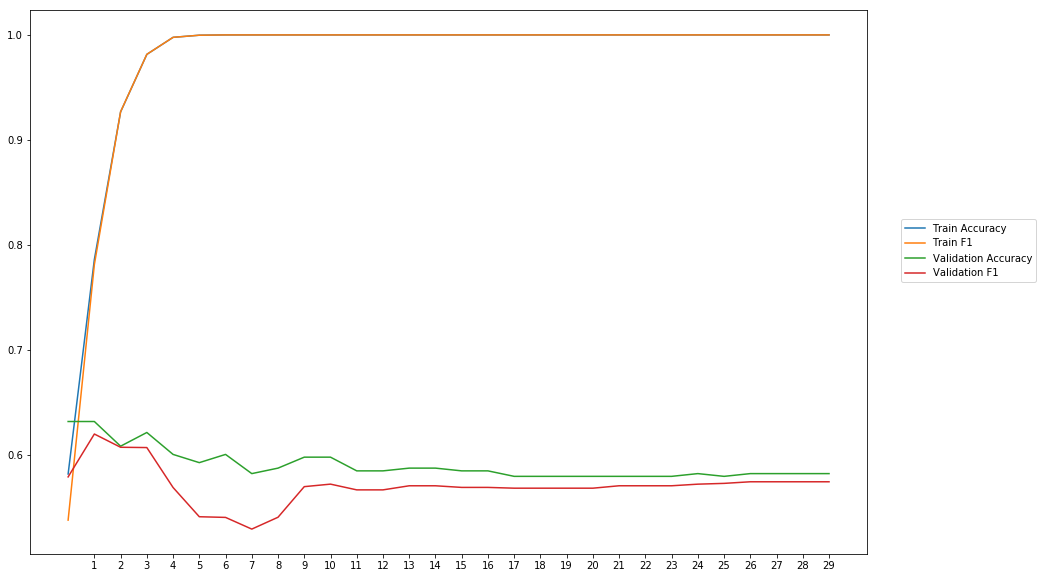

Average Accuracy: 59.05%
Average Precision: 60.25%
Average Recall: 54.36%
Average F1: 57.06%

-----Fold 10--------


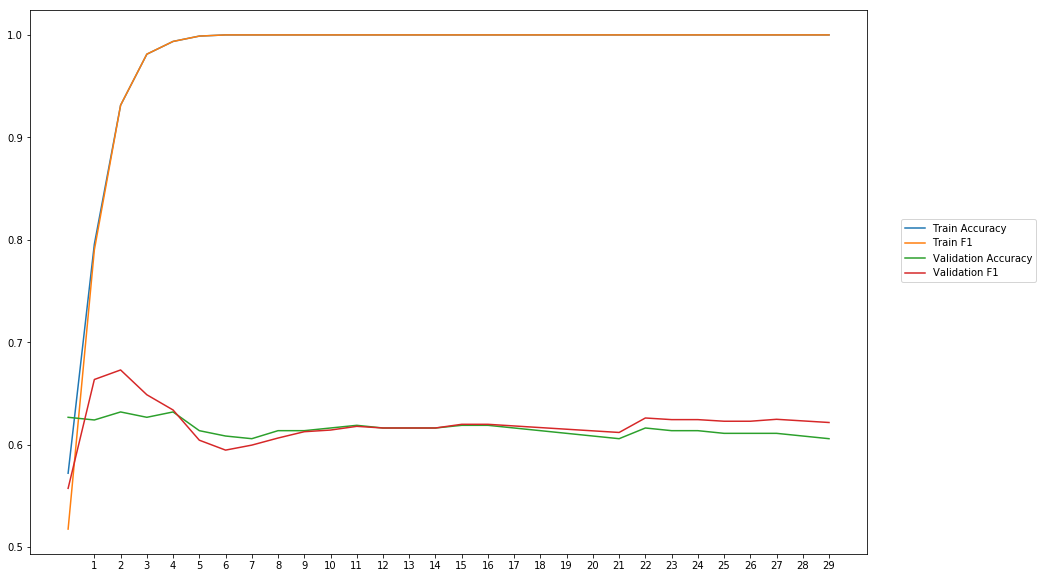

Average Accuracy: 61.54%
Average Precision: 61.53%
Average Recall: 62.62%
Average F1: 61.93%

-------Overallresults-------


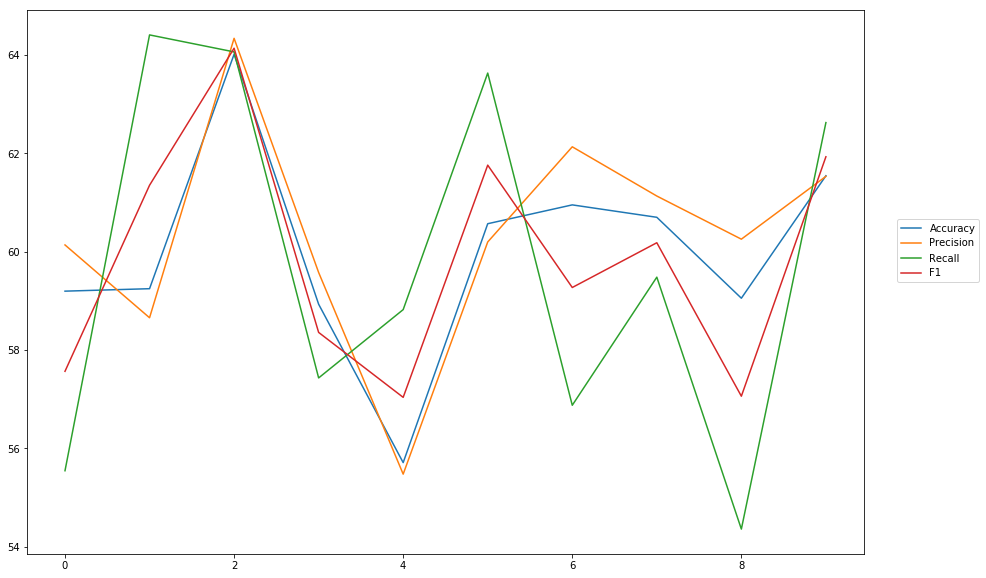

Accuracy: Mean = 59.99% (+/- 2.05%), Max = 64.01%, Min =  55.71%
Precision: Mean = 60.34% (+/- 2.20%), Max = 64.33%, Min =  55.47%
Recall: Mean = 59.72% (+/- 3.53%), Max = 64.40%, Min =  54.36%
F1: Mean = 59.86% (+/- 2.28%), Max = 64.13%, Min =  57.04%


In [17]:
cross_val(model_9, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_9')  

# Neurons after formular

## MLP with one hidden layer, 3450 neurons (after Tamura/Tateishi)

In [ ]:
wv_layer_12 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_12 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_12 = wv_layer_12(comment_input_12)

#First Dense Layer
x_12 = Dense(3450, activation='relu')(embedded_sequences_12)

x_12 = Flatten()(x_12)

#Output (Dense) Layer
preds_12 = Dense(2, activation='softmax')(x_12)

# build the model
model_12 = Model(inputs=[comment_input_12], outputs=preds_12)


-----Fold 1--------


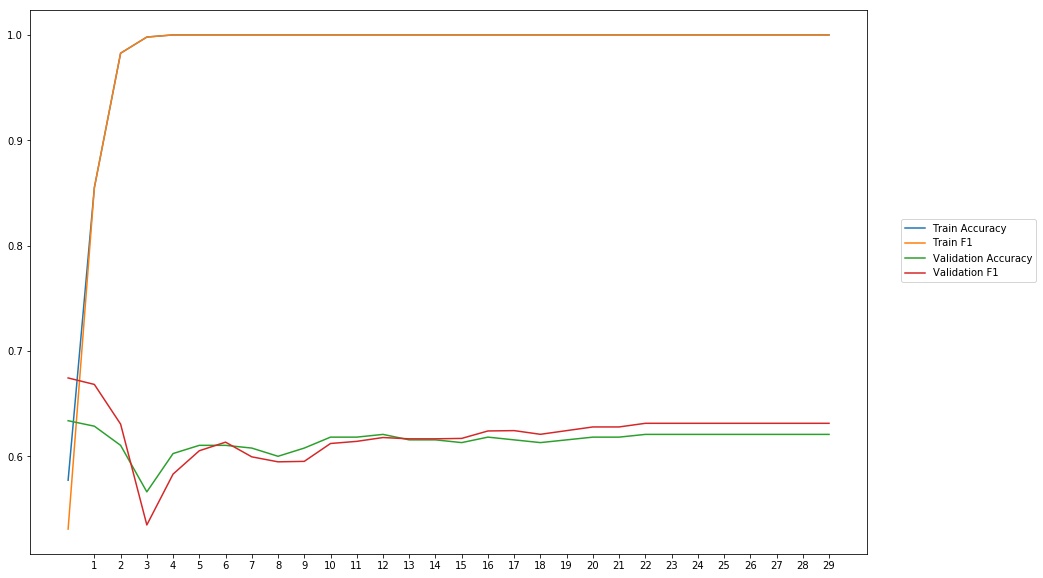

Average Accuracy: 61.48%
Average Precision: 61.29%
Average Recall: 62.85%
Average F1: 61.98%

-----Fold 2--------


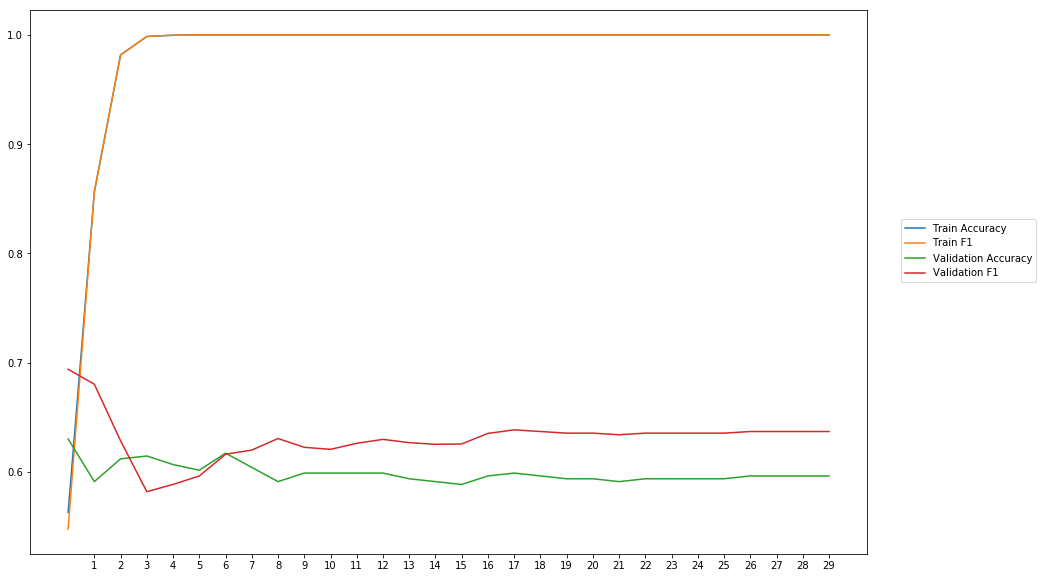

Average Accuracy: 59.90%
Average Precision: 58.81%
Average Recall: 68.46%
Average F1: 63.06%

-----Fold 3--------


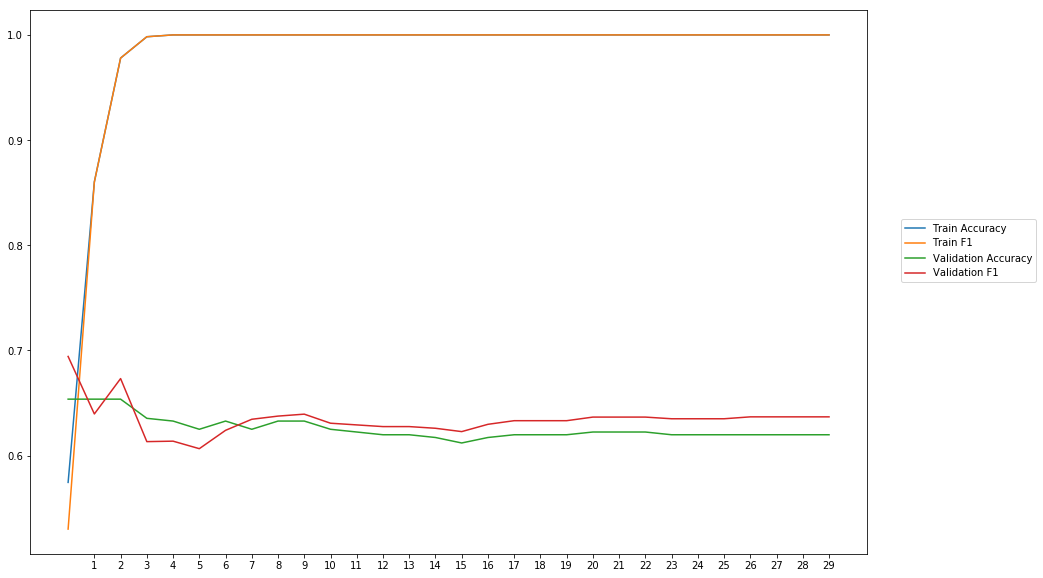

Average Accuracy: 62.59%
Average Precision: 62.38%
Average Recall: 64.70%
Average F1: 63.44%

-----Fold 4--------


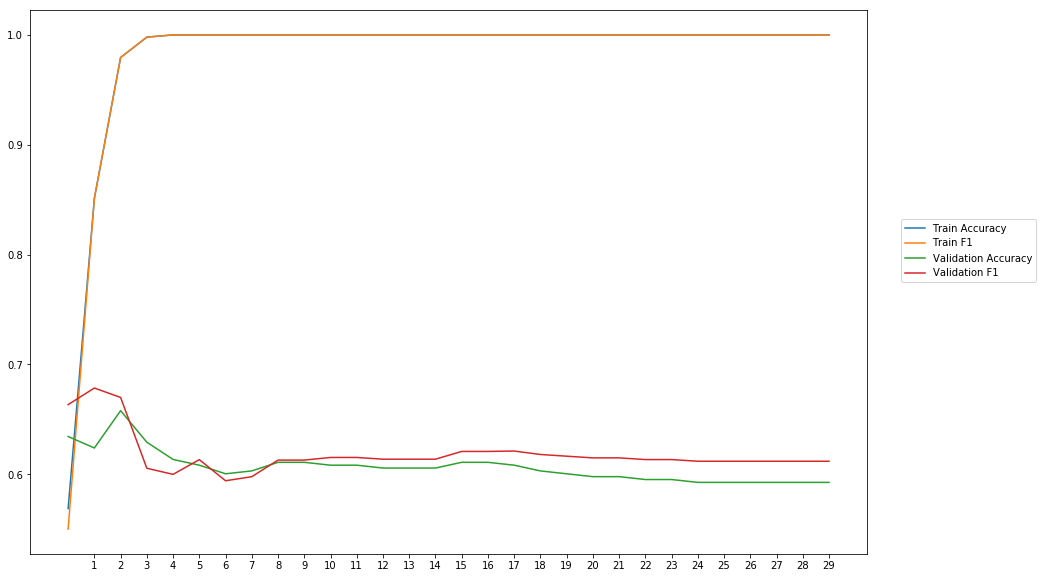

Average Accuracy: 60.68%
Average Precision: 60.26%
Average Recall: 63.65%
Average F1: 61.82%

-----Fold 5--------


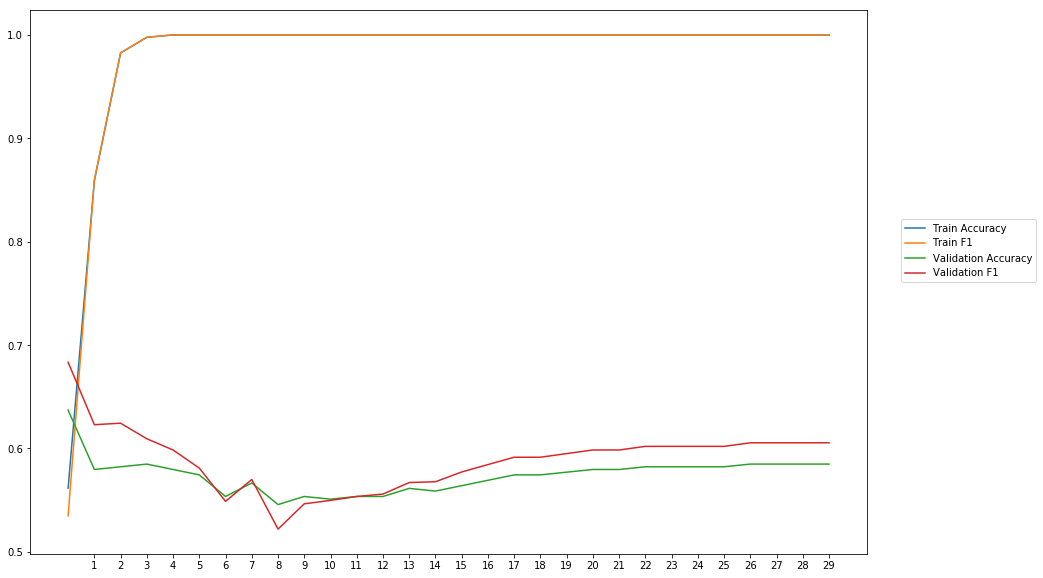

Average Accuracy: 57.41%
Average Precision: 56.95%
Average Recall: 61.13%
Average F1: 58.89%

-----Fold 6--------


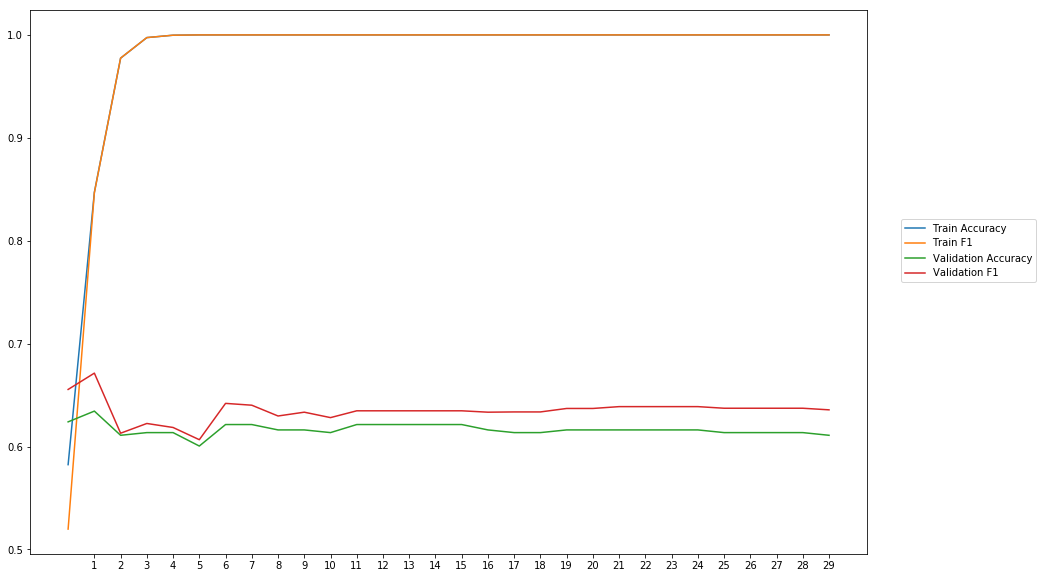

Average Accuracy: 61.66%
Average Precision: 60.74%
Average Recall: 66.58%
Average F1: 63.50%

-----Fold 7--------


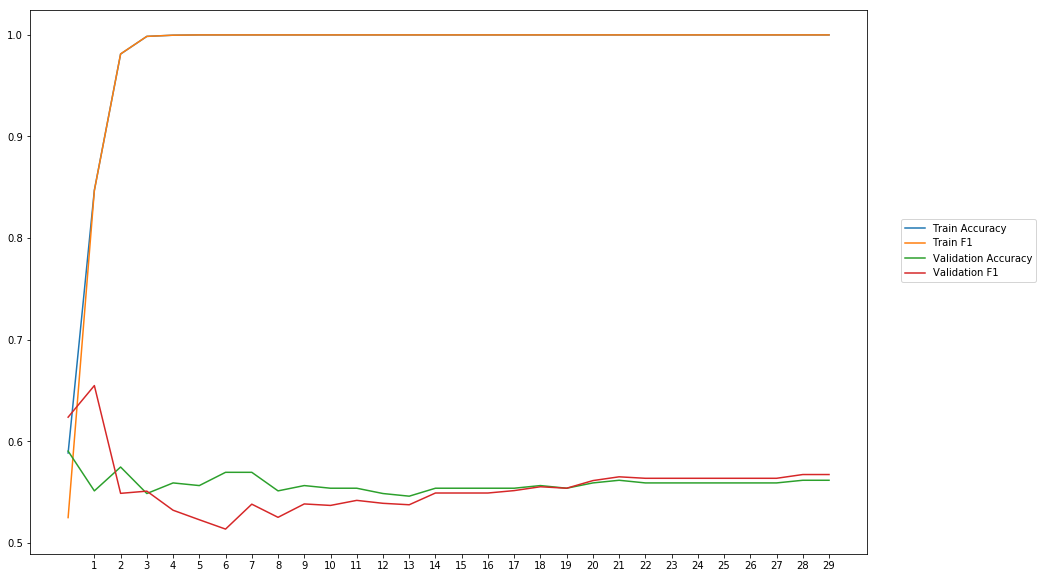

Average Accuracy: 55.81%
Average Precision: 56.09%
Average Recall: 55.31%
Average F1: 55.48%

-----Fold 8--------


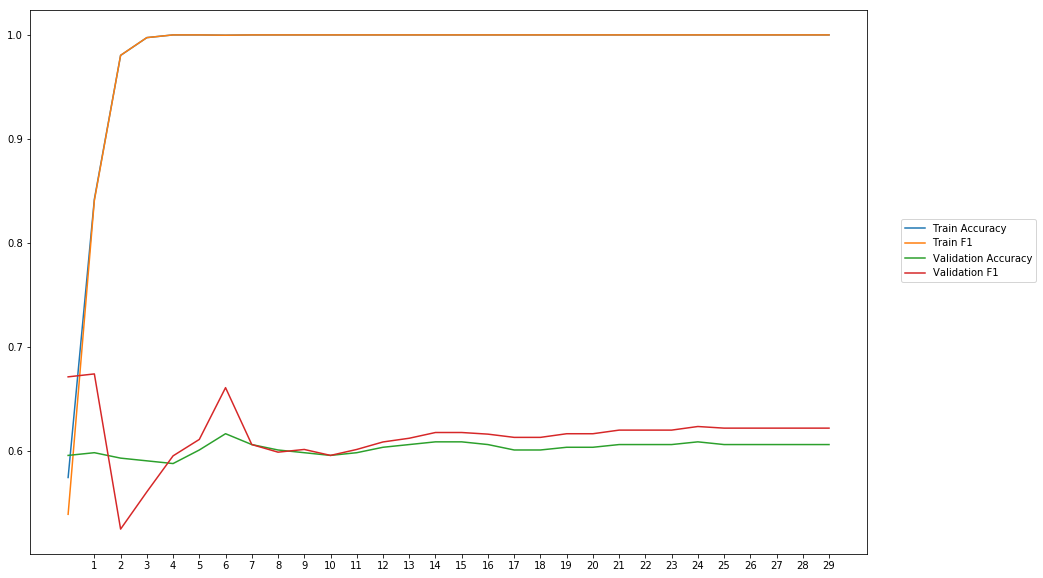

Average Accuracy: 60.23%
Average Precision: 59.85%
Average Recall: 63.49%
Average F1: 61.38%

-----Fold 9--------


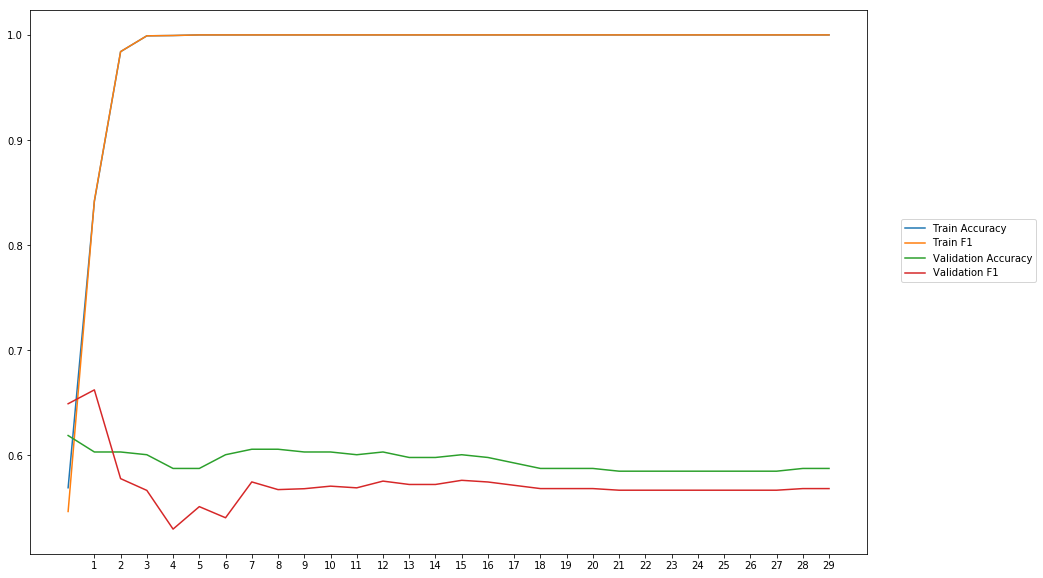

Average Accuracy: 59.47%
Average Precision: 60.78%
Average Recall: 54.44%
Average F1: 57.26%

-----Fold 10--------


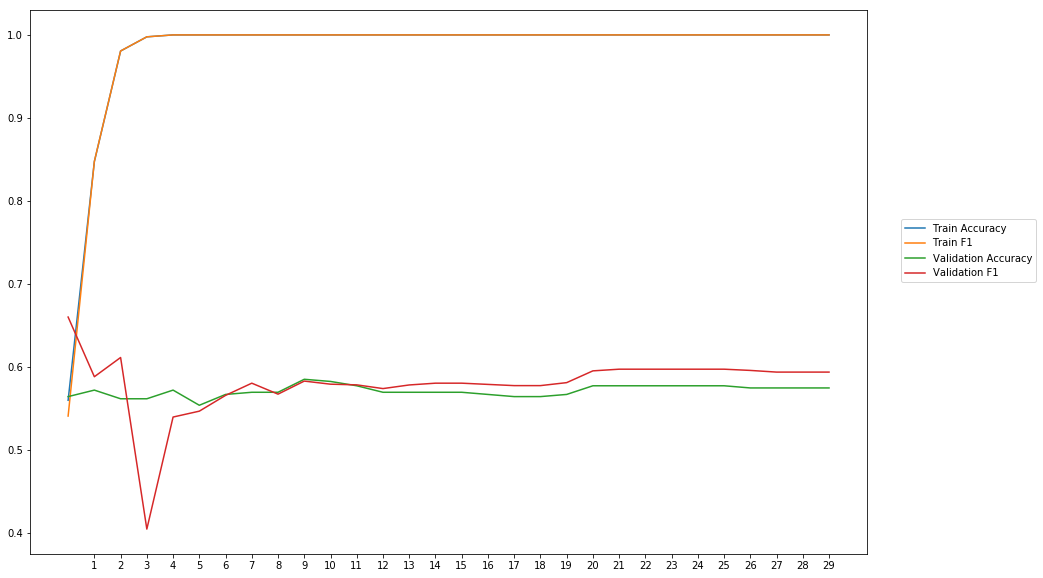

Average Accuracy: 57.10%
Average Precision: 57.07%
Average Recall: 59.62%
Average F1: 57.94%

-------Overallresults-------


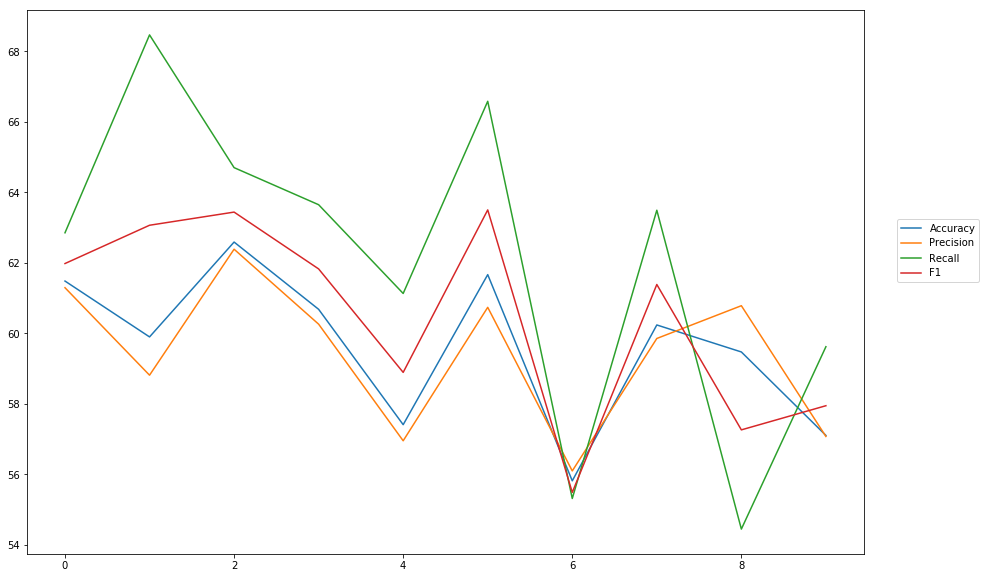

Accuracy: Mean = 59.63% (+/- 2.09%), Max = 62.59%, Min =  55.81%
Precision: Mean = 59.42% (+/- 2.00%), Max = 62.38%, Min =  56.09%
Recall: Mean = 62.02% (+/- 4.29%), Max = 68.46%, Min =  54.44%
F1: Mean = 60.48% (+/- 2.71%), Max = 63.50%, Min =  55.48%


In [19]:
cross_val(model_12, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_1_3450')  

## MLP with one hidden layer, 99 neurons (after Jinchuan/Xinzhe)

In [8]:
wv_layer_13 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_13 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_13 = wv_layer_13(comment_input_13)

#First Dense Layer
x_13 = Dense(99, activation='relu')(embedded_sequences_13)

x_13 = Flatten()(x_13)

#Output (Dense) Layer
preds_13 = Dense(2, activation='softmax')(x_13)

# build the model
model_13 = Model(inputs=[comment_input_13], outputs=preds_13)


-----Fold 1--------


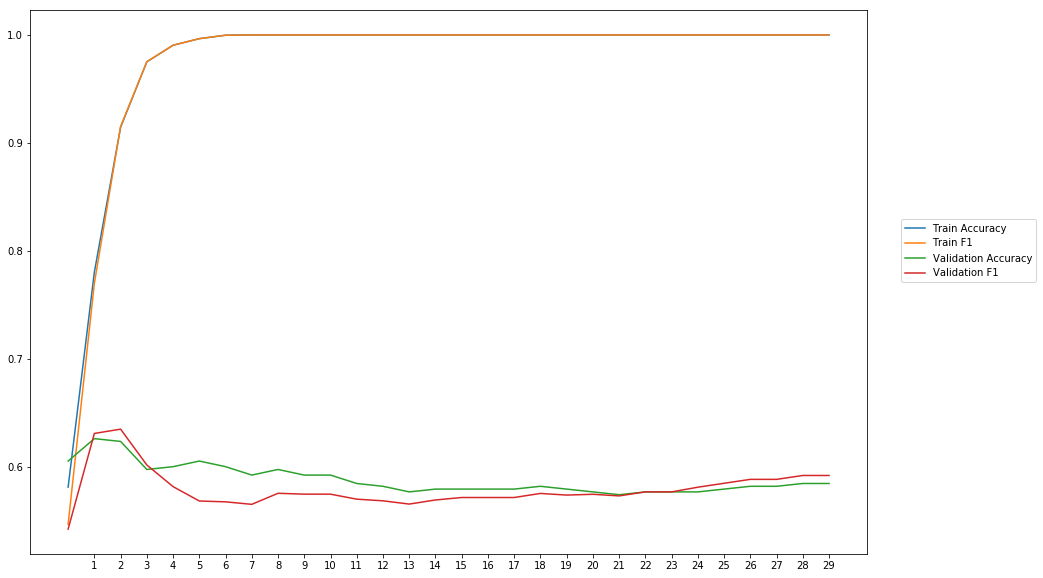

Average Accuracy: 58.81%
Average Precision: 59.44%
Average Recall: 56.67%
Average F1: 57.93%

-----Fold 2--------


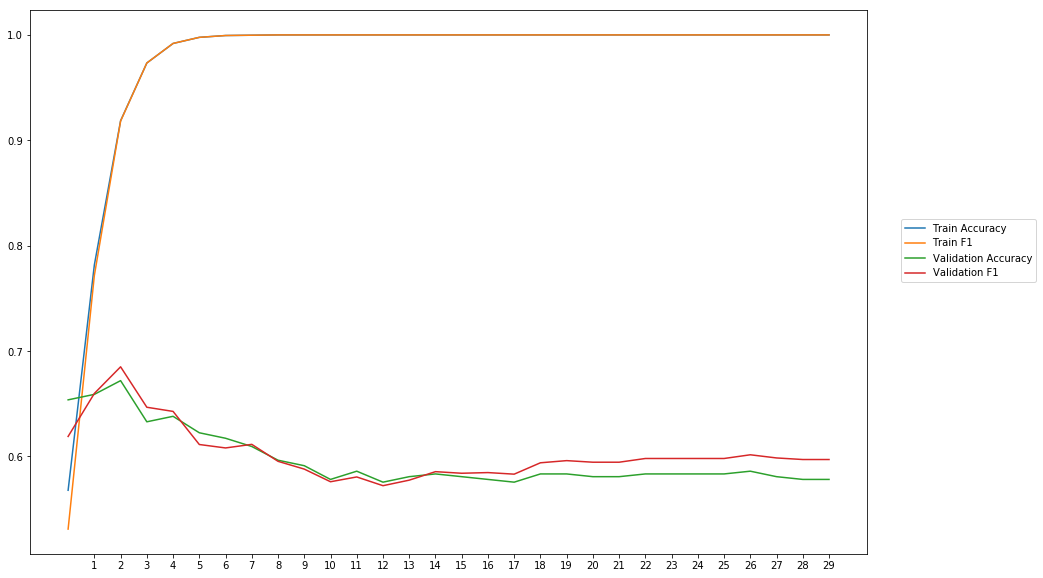

Average Accuracy: 59.71%
Average Precision: 59.86%
Average Recall: 60.76%
Average F1: 60.25%

-----Fold 3--------


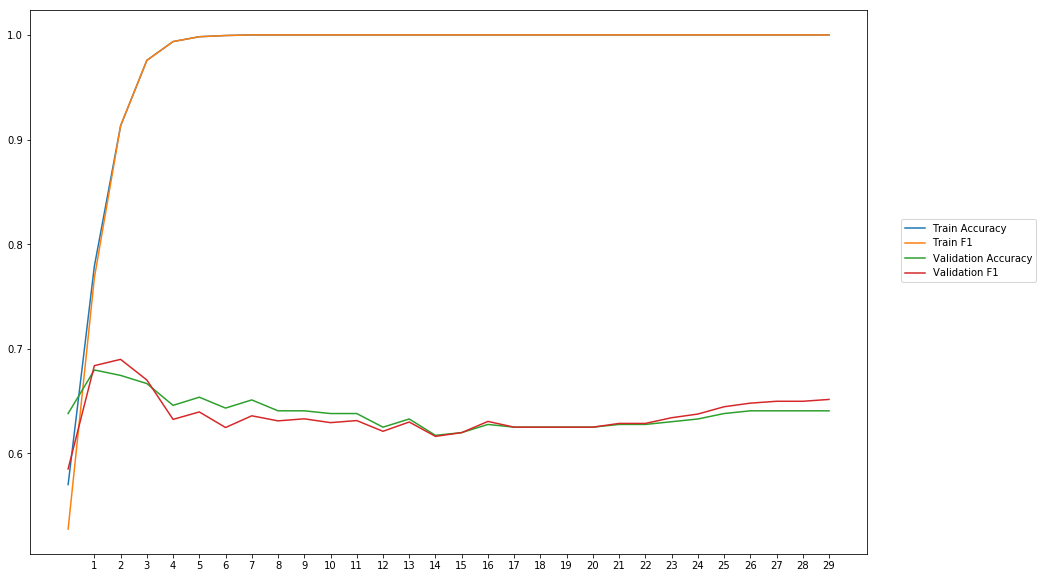

Average Accuracy: 63.84%
Average Precision: 64.40%
Average Recall: 62.94%
Average F1: 63.59%

-----Fold 4--------


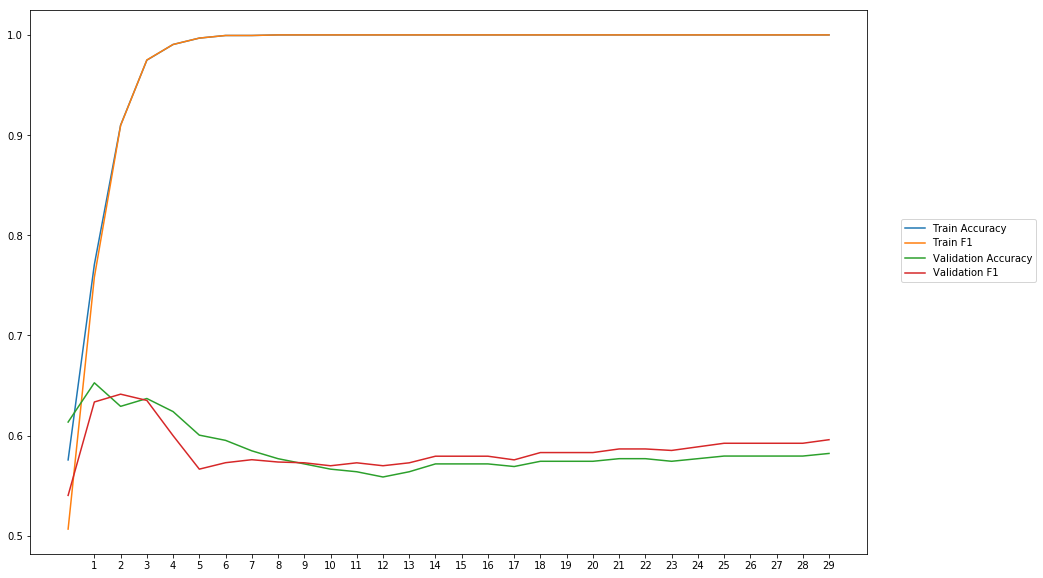

Average Accuracy: 58.51%
Average Precision: 58.83%
Average Recall: 58.59%
Average F1: 58.58%

-----Fold 5--------


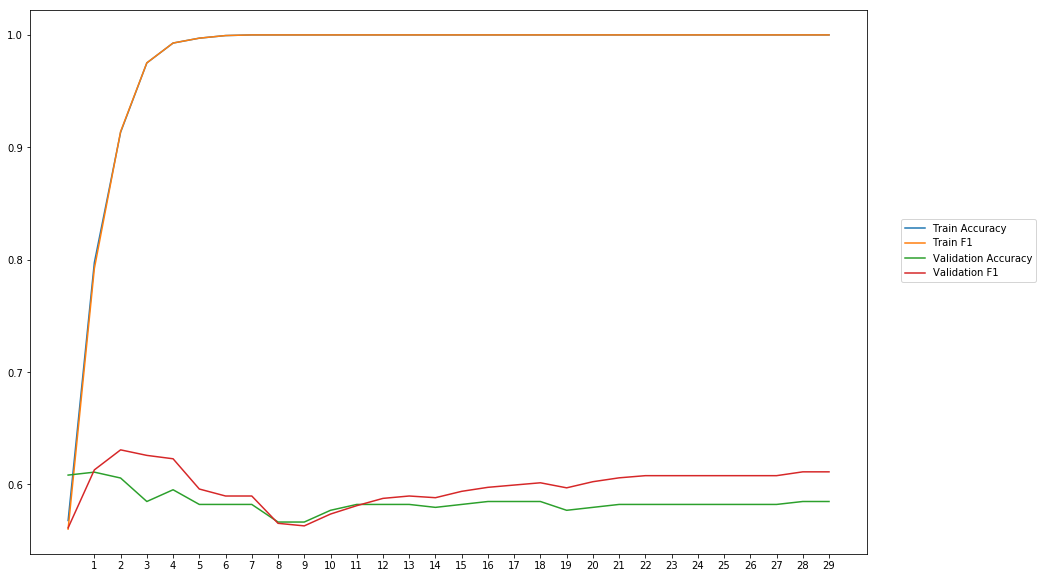

Average Accuracy: 58.42%
Average Precision: 58.06%
Average Recall: 61.87%
Average F1: 59.82%

-----Fold 6--------


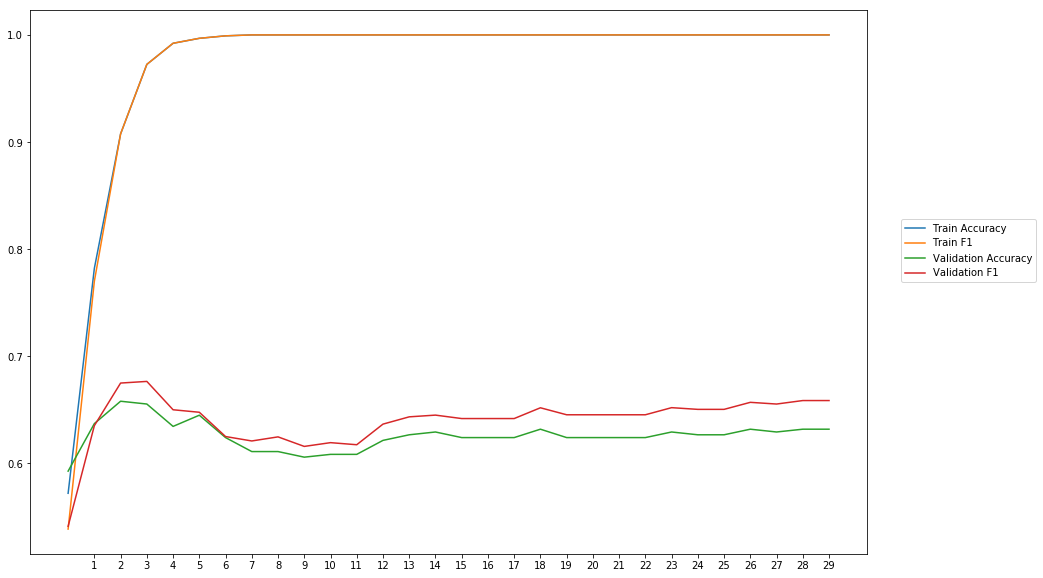

Average Accuracy: 62.58%
Average Precision: 61.76%
Average Recall: 66.68%
Average F1: 64.05%

-----Fold 7--------


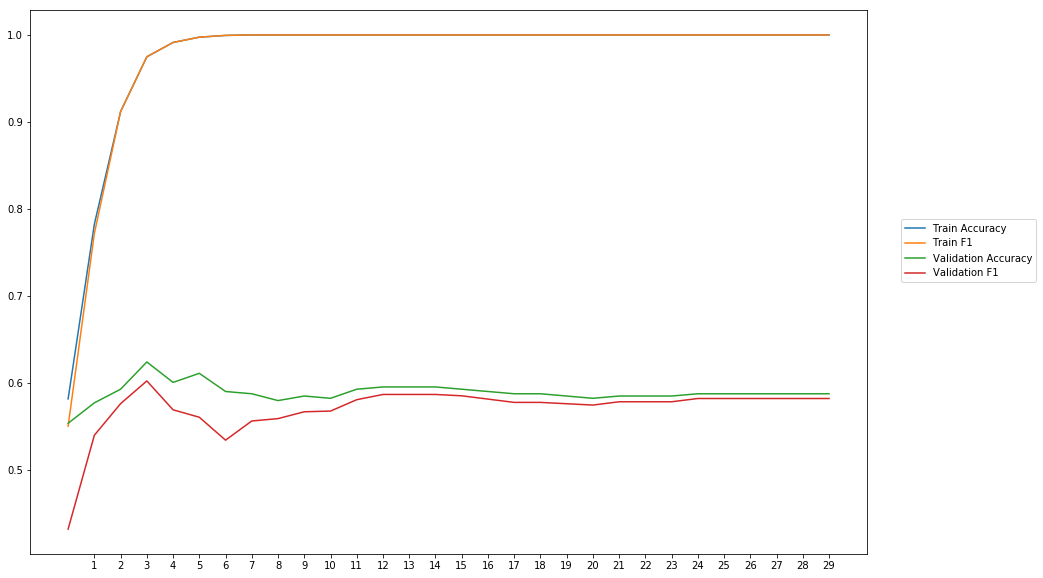

Average Accuracy: 58.89%
Average Precision: 59.91%
Average Recall: 54.64%
Average F1: 57.01%

-----Fold 8--------


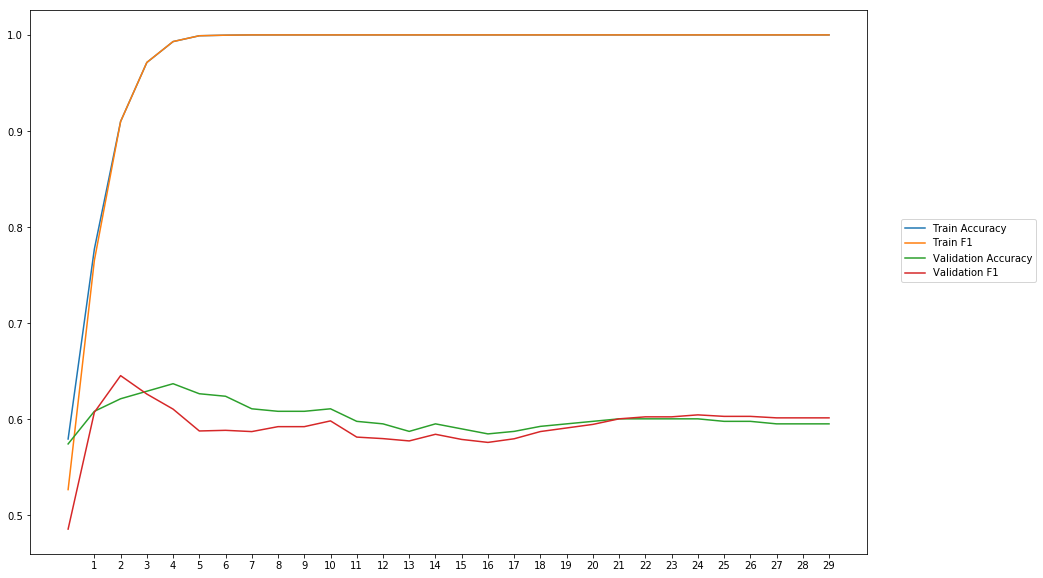

Average Accuracy: 60.23%
Average Precision: 60.96%
Average Recall: 57.88%
Average F1: 59.25%

-----Fold 9--------


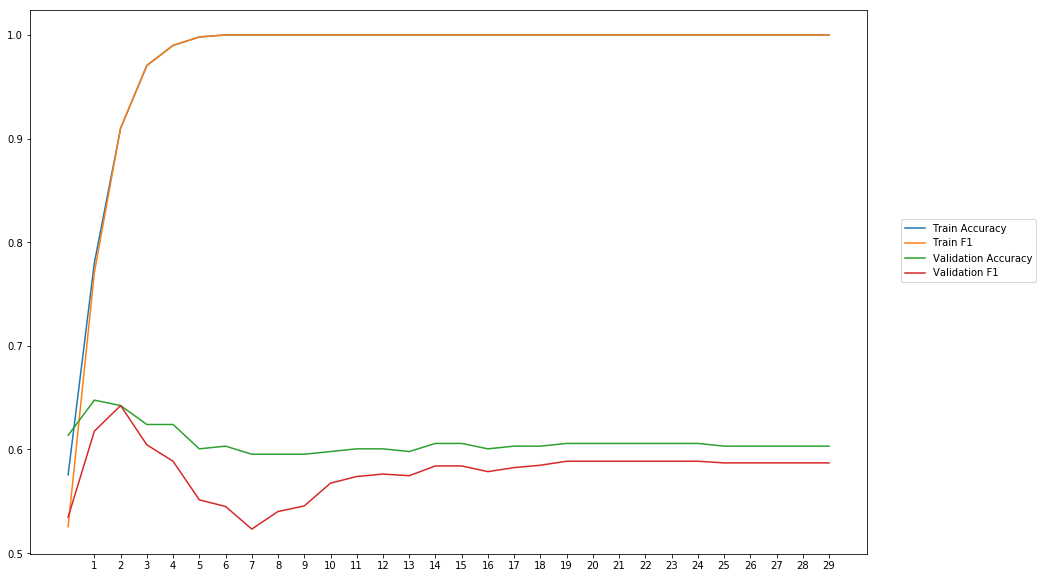

Average Accuracy: 60.69%
Average Precision: 62.55%
Average Recall: 54.06%
Average F1: 57.88%

-----Fold 10--------


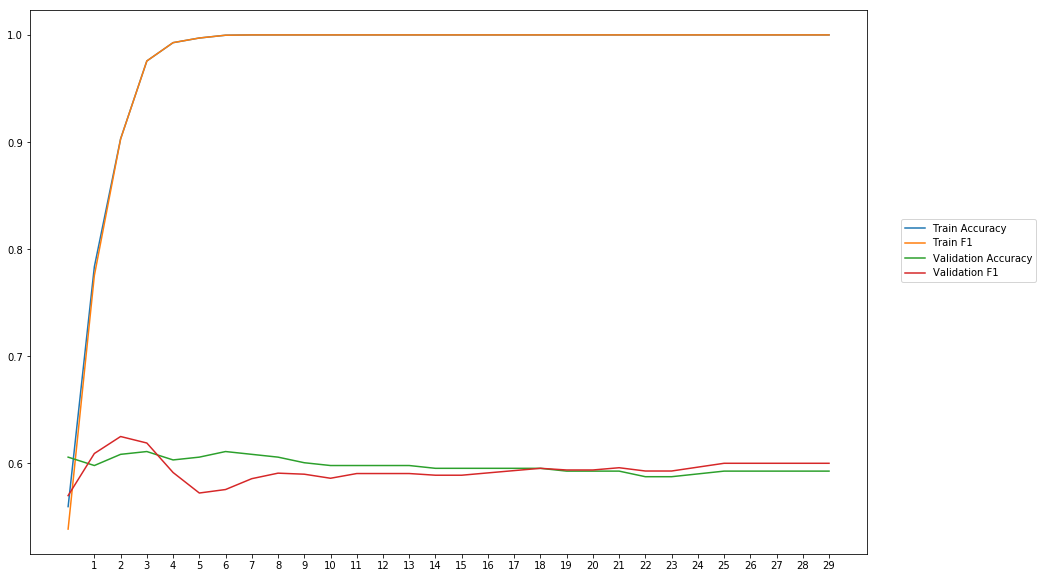

Average Accuracy: 59.77%
Average Precision: 60.20%
Average Recall: 58.68%
Average F1: 59.36%

-------Overallresults-------


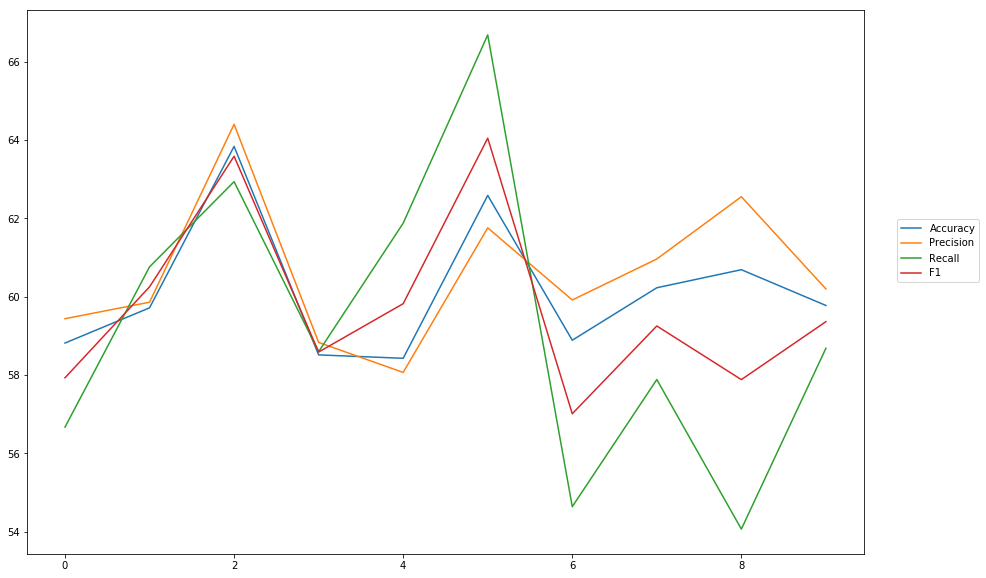

Accuracy: Mean = 60.15% (+/- 1.71%), Max = 63.84%, Min =  58.42%
Precision: Mean = 60.60% (+/- 1.78%), Max = 64.40%, Min =  58.06%
Recall: Mean = 59.28% (+/- 3.68%), Max = 66.68%, Min =  54.06%
F1: Mean = 59.77% (+/- 2.23%), Max = 64.05%, Min =  57.01%


In [20]:
cross_val(model_13, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_1_99')  

## MLP with one hidden layer, 22 neurons (after Trenn)

In [ ]:
wv_layer_14 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_14 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_14 = wv_layer_14(comment_input_14)

#First Dense Layer
x_14 = Dense(22, activation='relu')(embedded_sequences_14)

x_14 = Flatten()(x_14)

#Output (Dense) Layer
preds_14 = Dense(2, activation='softmax')(x_14)

# build the model
model_14 = Model(inputs=[comment_input_14], outputs=preds_14)


-----Fold 1--------


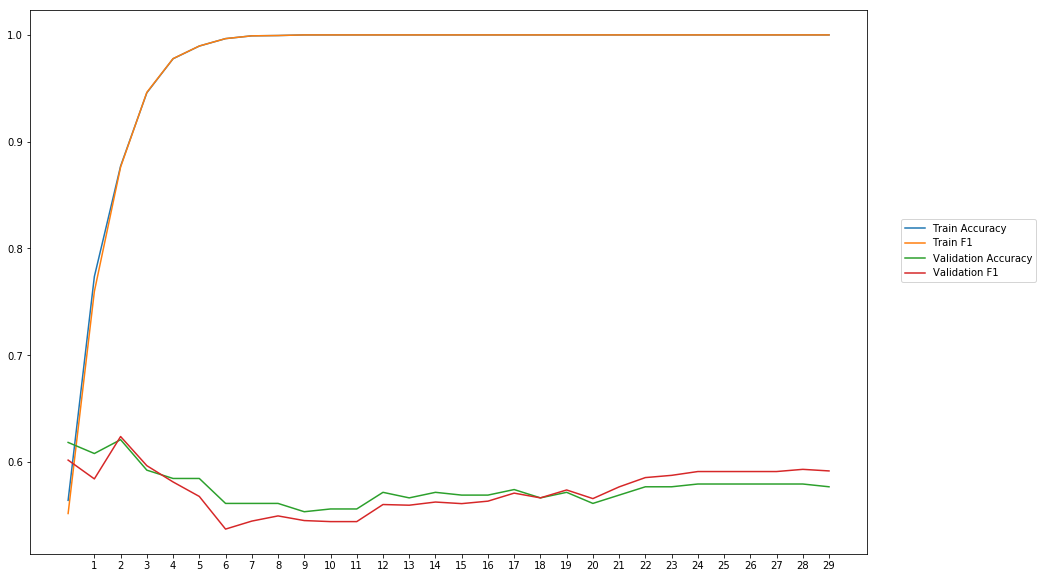

Average Accuracy: 57.57%
Average Precision: 57.82%
Average Recall: 56.93%
Average F1: 57.32%

-----Fold 2--------


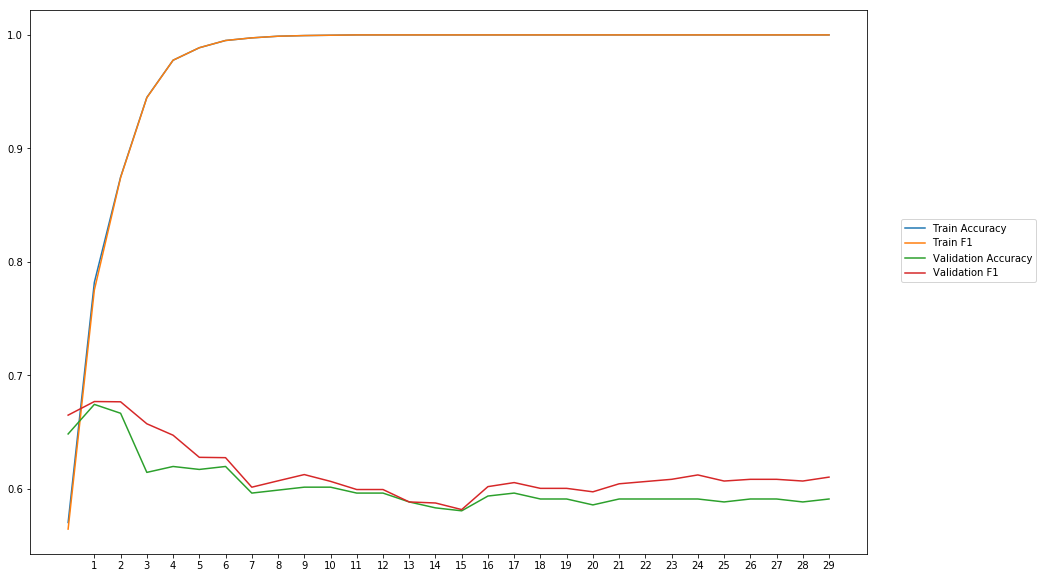

Average Accuracy: 60.26%
Average Precision: 59.94%
Average Recall: 63.16%
Average F1: 61.48%

-----Fold 3--------


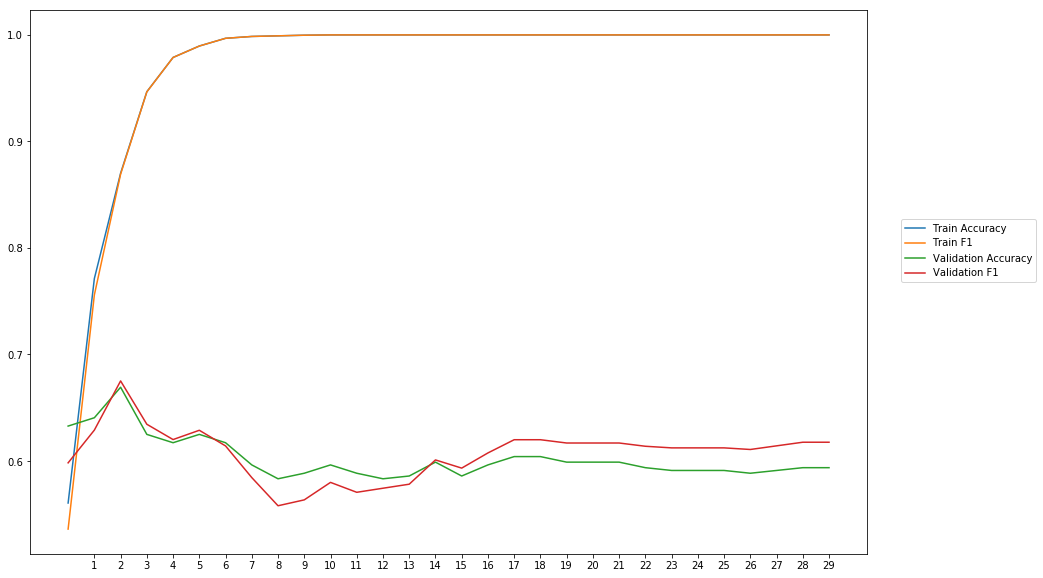

Average Accuracy: 60.23%
Average Precision: 60.37%
Average Recall: 61.28%
Average F1: 60.71%

-----Fold 4--------


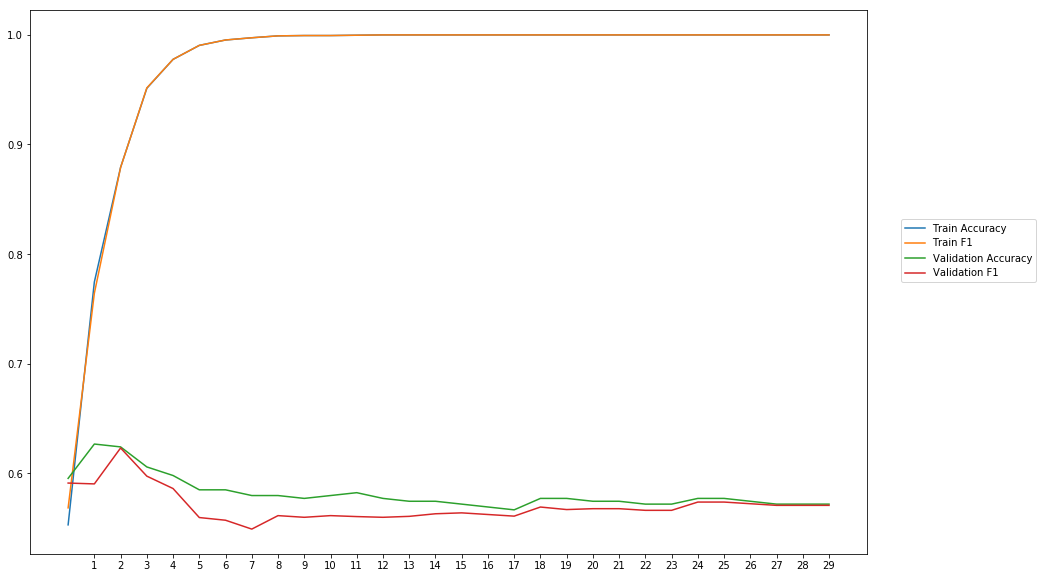

Average Accuracy: 58.14%
Average Precision: 58.80%
Average Recall: 55.38%
Average F1: 57.01%

-----Fold 5--------


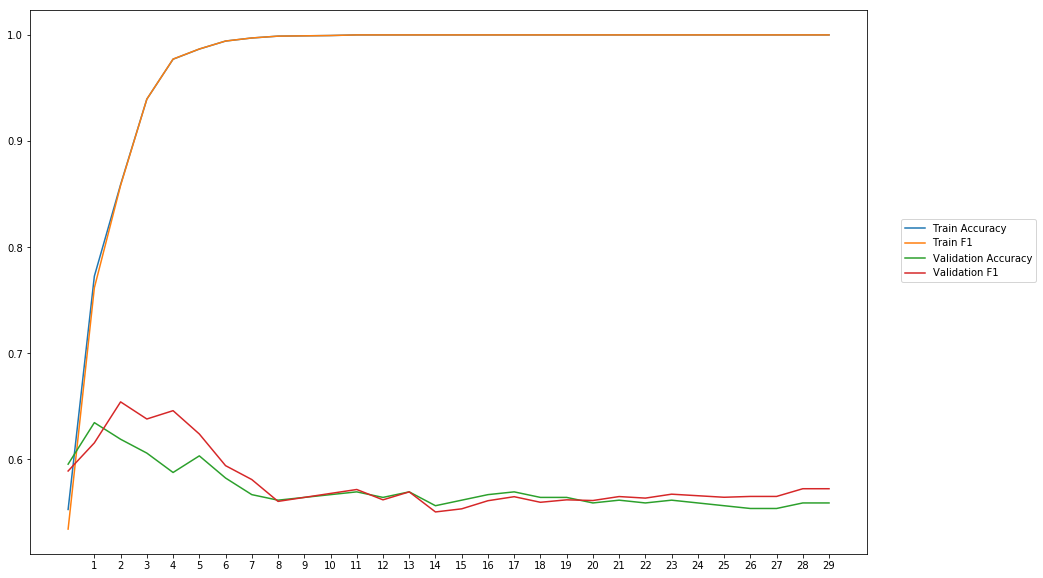

Average Accuracy: 57.16%
Average Precision: 57.07%
Average Recall: 58.75%
Average F1: 57.81%

-----Fold 6--------


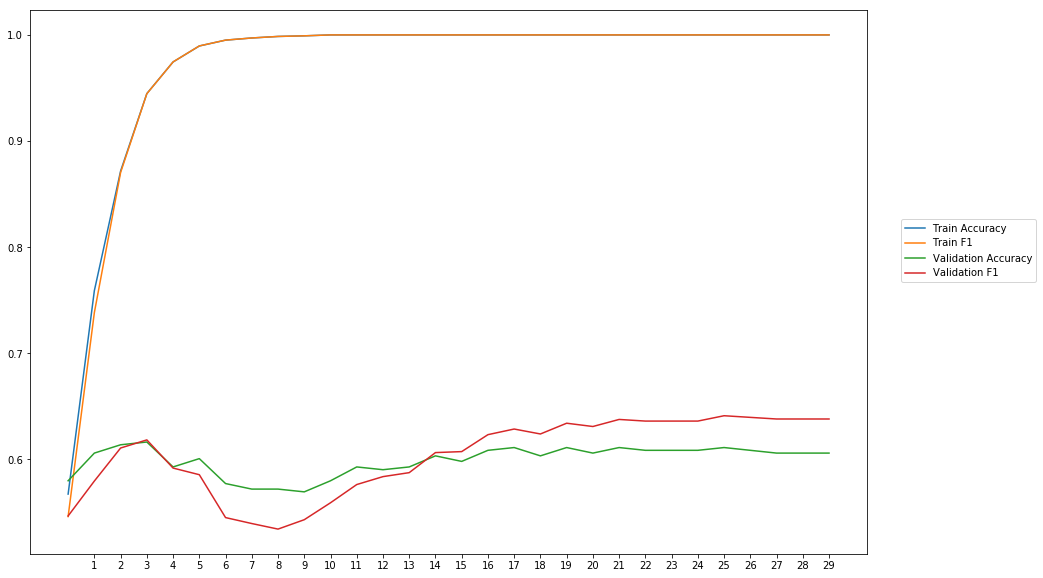

Average Accuracy: 59.89%
Average Precision: 59.75%
Average Recall: 61.28%
Average F1: 60.30%

-----Fold 7--------


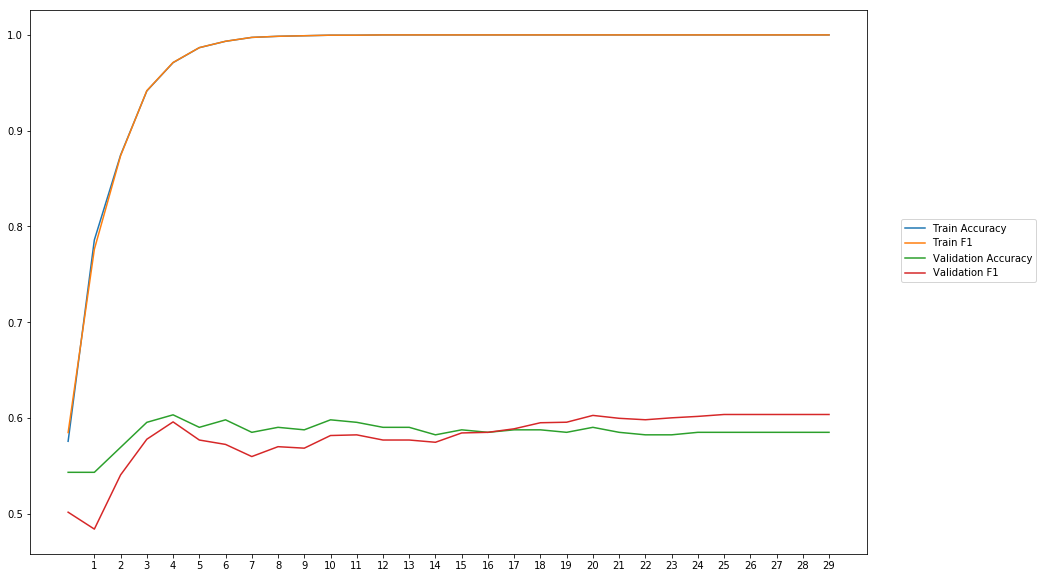

Average Accuracy: 58.47%
Average Precision: 58.79%
Average Recall: 57.64%
Average F1: 58.01%

-----Fold 8--------


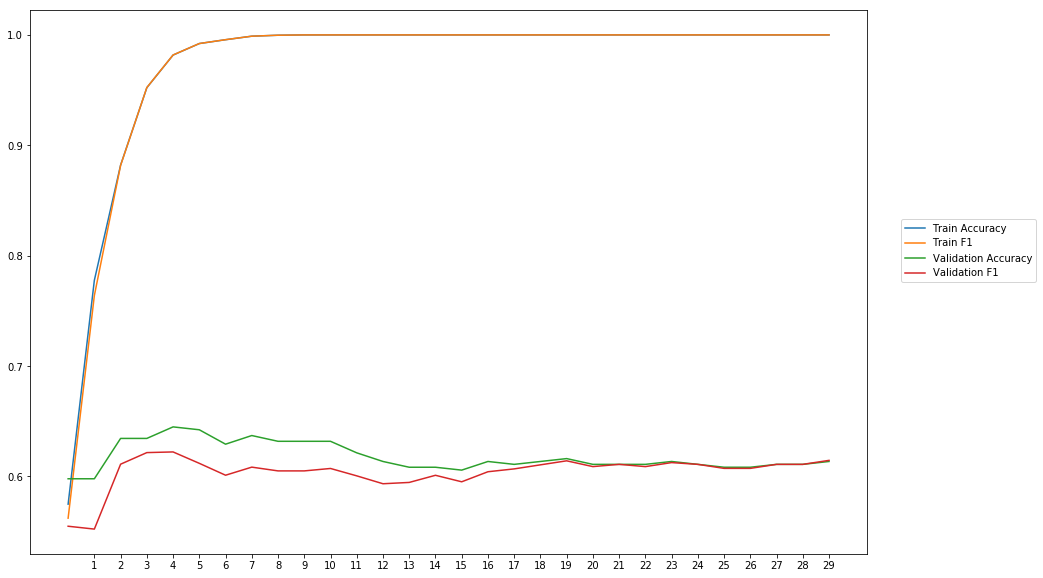

Average Accuracy: 61.78%
Average Precision: 62.92%
Average Recall: 58.25%
Average F1: 60.42%

-----Fold 9--------


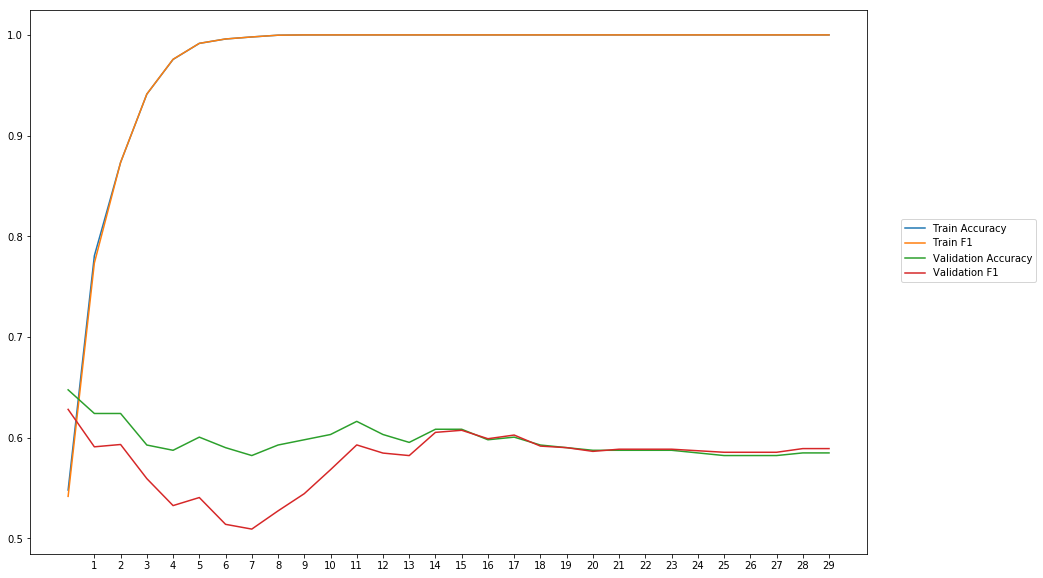

Average Accuracy: 59.69%
Average Precision: 60.95%
Average Recall: 55.35%
Average F1: 57.79%

-----Fold 10--------


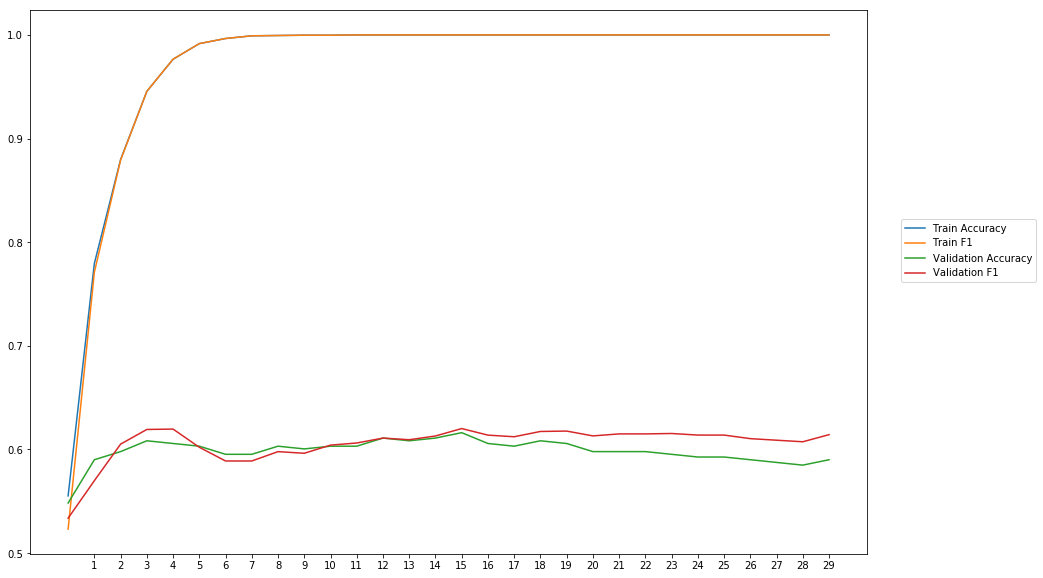

Average Accuracy: 59.83%
Average Precision: 59.64%
Average Recall: 61.65%
Average F1: 60.58%

-------Overallresults-------


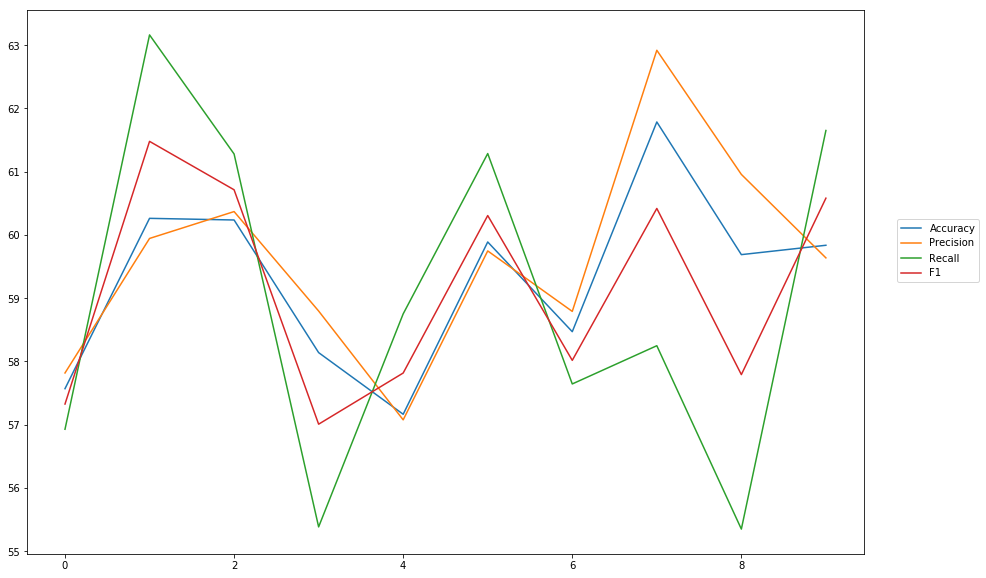

Accuracy: Mean = 59.30% (+/- 1.35%), Max = 61.78%, Min =  57.16%
Precision: Mean = 59.60% (+/- 1.56%), Max = 62.92%, Min =  57.07%
Recall: Mean = 58.97% (+/- 2.61%), Max = 63.16%, Min =  55.35%
F1: Mean = 59.14% (+/- 1.60%), Max = 61.48%, Min =  57.01%


In [21]:
cross_val(model_14, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_1_22')  

## MLP with one layer, 9 neurons (after Shibata/Ikeda)

In [ ]:
wv_layer_15 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_15 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_15 = wv_layer_15(comment_input_15)

#First Dense Layer
x_15 = Dense(9, activation='relu')(embedded_sequences_15)

x_15 = Flatten()(x_15)

#Output (Dense) Layer
preds_15 = Dense(2, activation='softmax')(x_15)

# build the model
model_15 = Model(inputs=[comment_input_15], outputs=preds_15)


-----Fold 1--------


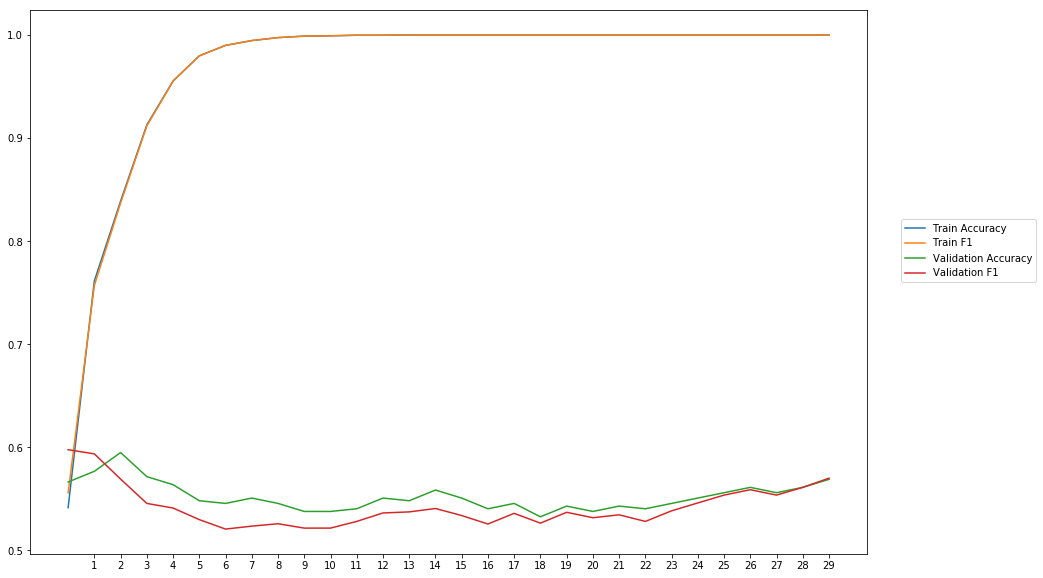

Average Accuracy: 55.22%
Average Precision: 55.61%
Average Recall: 52.97%
Average F1: 54.21%

-----Fold 2--------


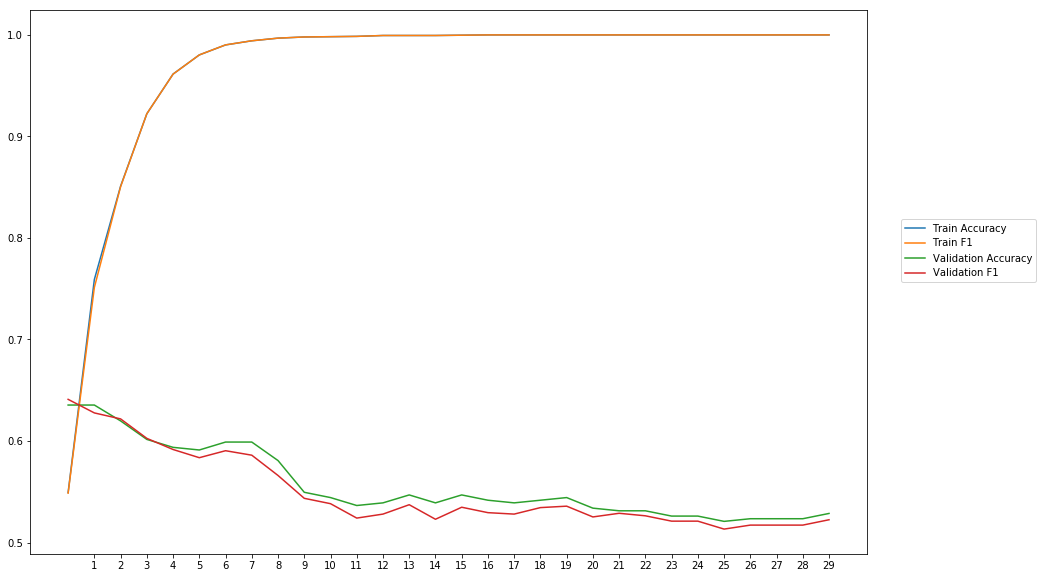

Average Accuracy: 55.64%
Average Precision: 56.11%
Average Recall: 53.80%
Average F1: 54.92%

-----Fold 3--------


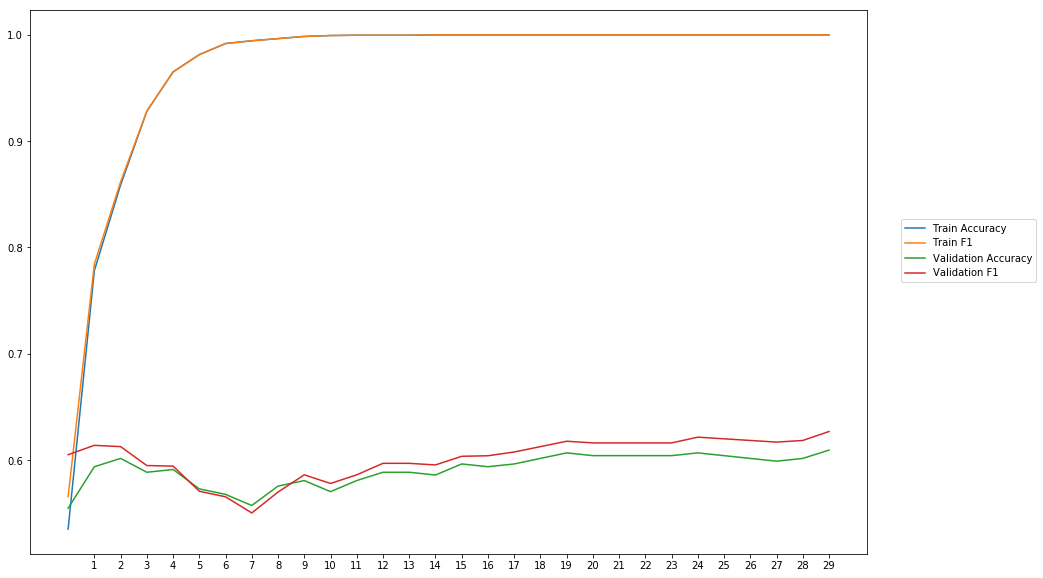

Average Accuracy: 59.11%
Average Precision: 58.93%
Average Recall: 61.52%
Average F1: 60.16%

-----Fold 4--------


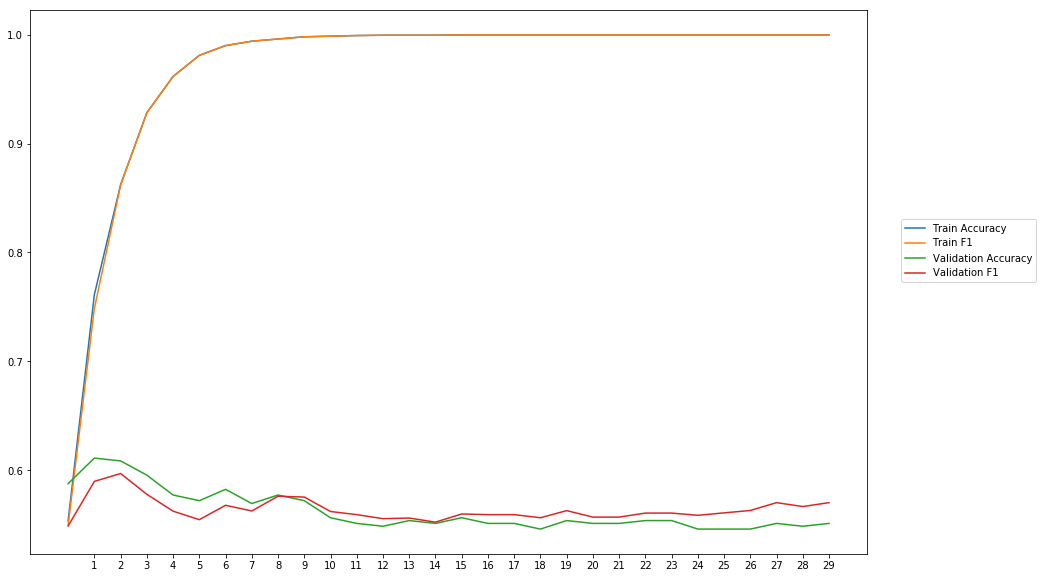

Average Accuracy: 56.21%
Average Precision: 56.44%
Average Recall: 56.42%
Average F1: 56.38%

-----Fold 5--------


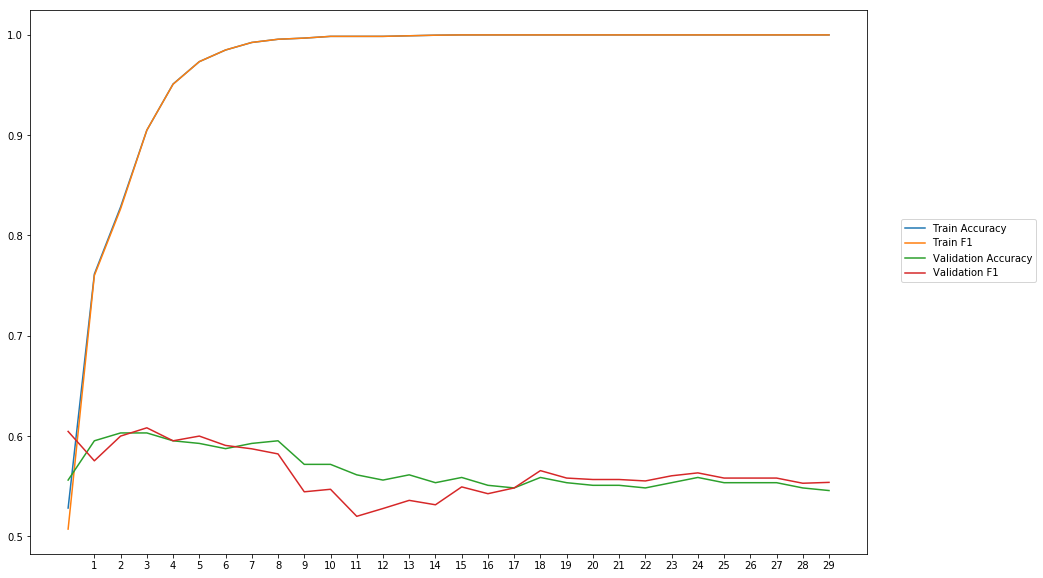

Average Accuracy: 56.61%
Average Precision: 56.91%
Average Recall: 55.85%
Average F1: 56.29%

-----Fold 6--------


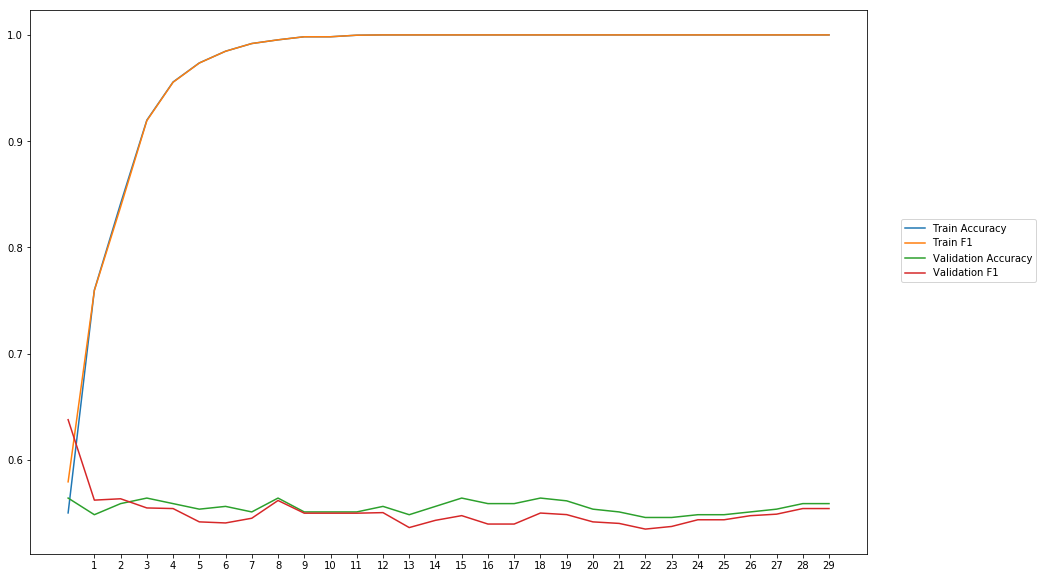

Average Accuracy: 55.51%
Average Precision: 55.79%
Average Recall: 54.46%
Average F1: 55.03%

-----Fold 7--------


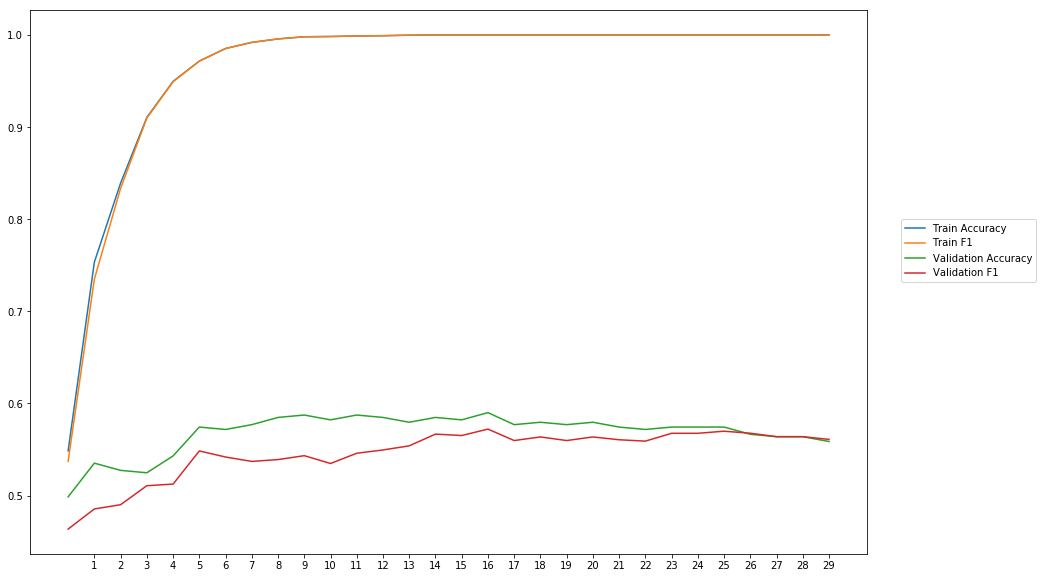

Average Accuracy: 56.84%
Average Precision: 57.77%
Average Recall: 51.94%
Average F1: 54.63%

-----Fold 8--------


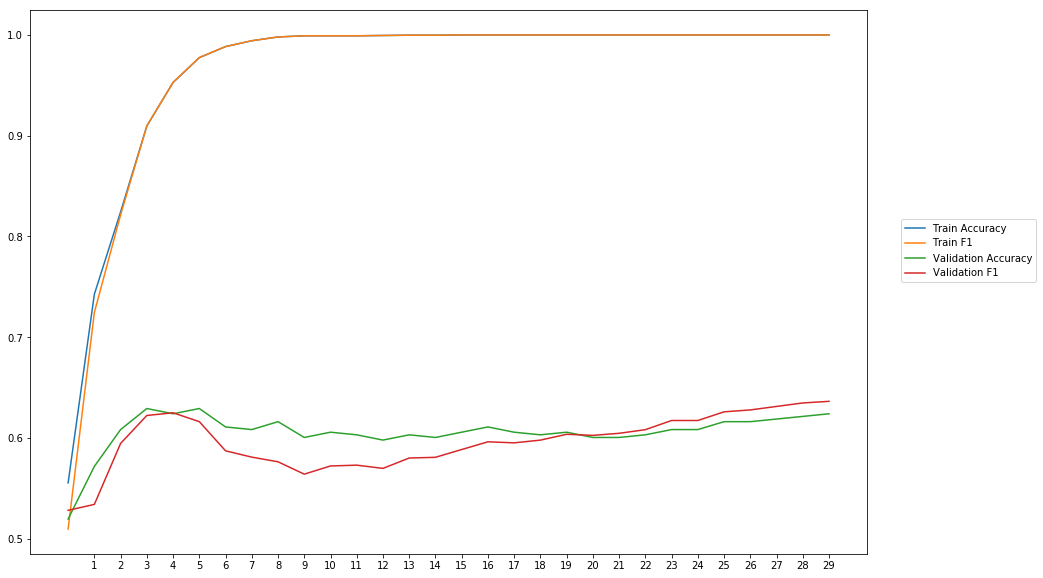

Average Accuracy: 60.59%
Average Precision: 61.30%
Average Recall: 58.28%
Average F1: 59.64%

-----Fold 9--------


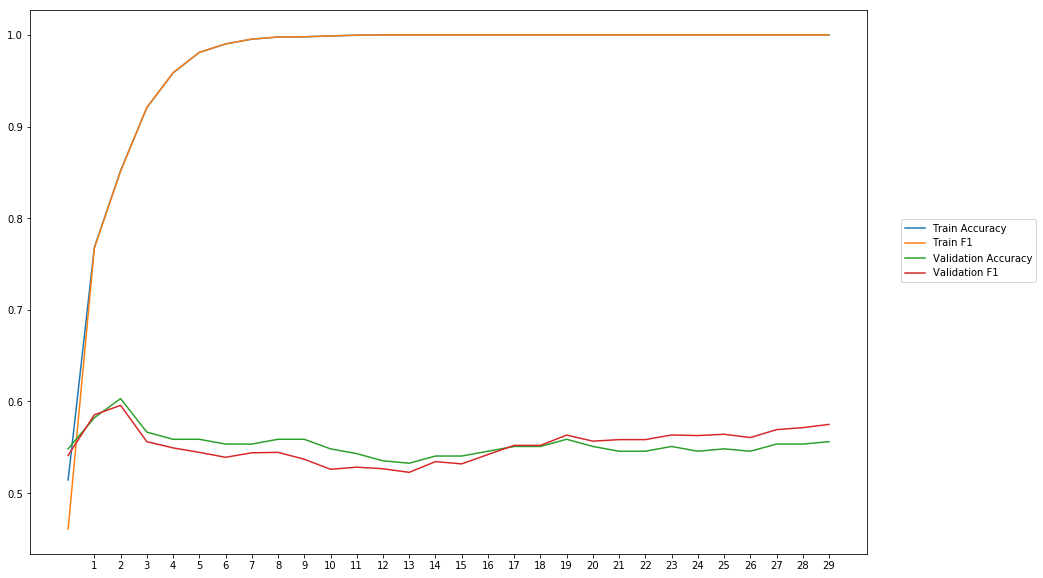

Average Accuracy: 55.28%
Average Precision: 55.47%
Average Recall: 55.00%
Average F1: 55.19%

-----Fold 10--------


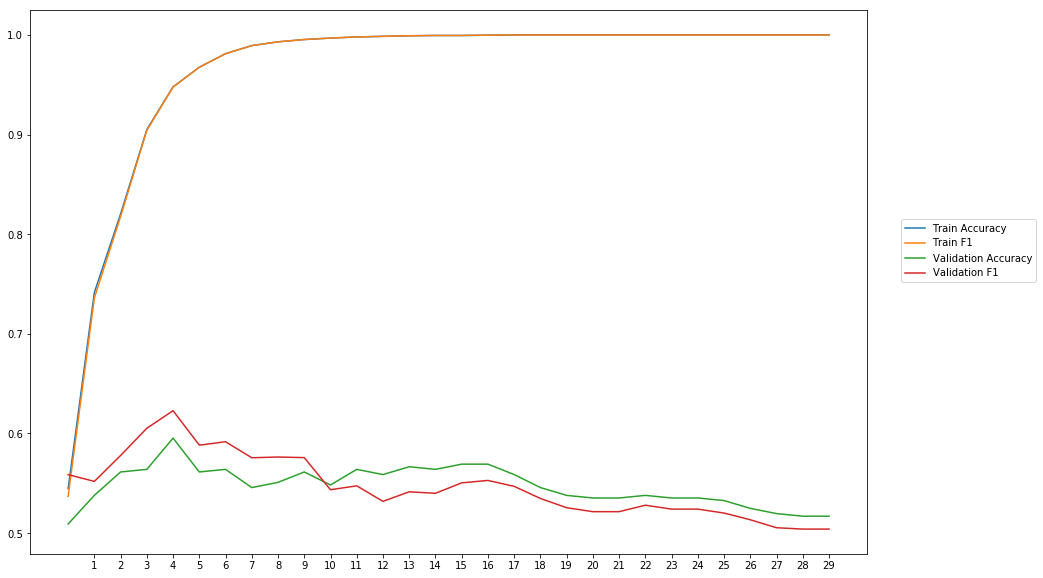

Average Accuracy: 54.74%
Average Precision: 54.90%
Average Recall: 54.72%
Average F1: 54.68%

-------Overallresults-------


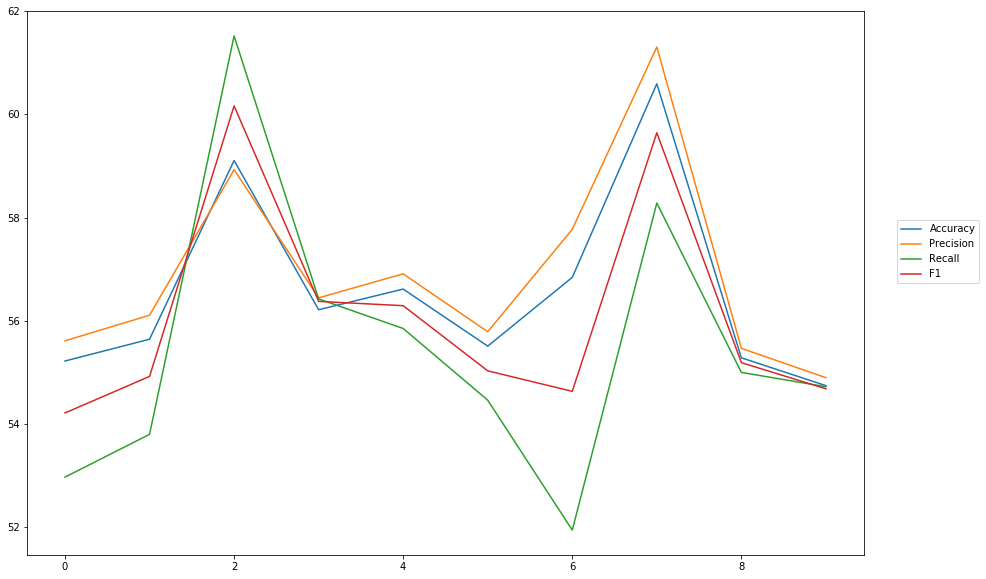

Accuracy: Mean = 56.58% (+/- 1.78%), Max = 60.59%, Min =  54.74%
Precision: Mean = 56.92% (+/- 1.85%), Max = 61.30%, Min =  54.90%
Recall: Mean = 55.50% (+/- 2.62%), Max = 61.52%, Min =  51.94%
F1: Mean = 56.11% (+/- 2.01%), Max = 60.16%, Min =  54.21%


In [22]:
cross_val(model_15, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'mlp_1_9')  

## Test the best model with heldout testdata

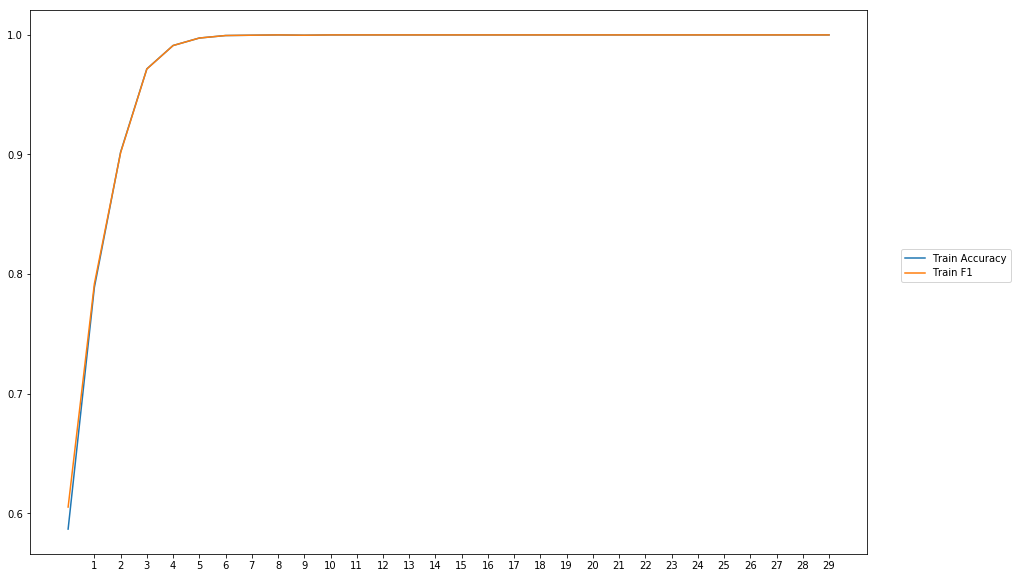


-----Test Scores----
Loss: 2.537741641609036
Accuracy: 68.87755102040816
Precision: 58.19070903222722
Recall: 76.52733116510376
F1: 66.11110618537846


In [14]:
train_evaluate_final_model(model_8new, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_MLP_1_600')

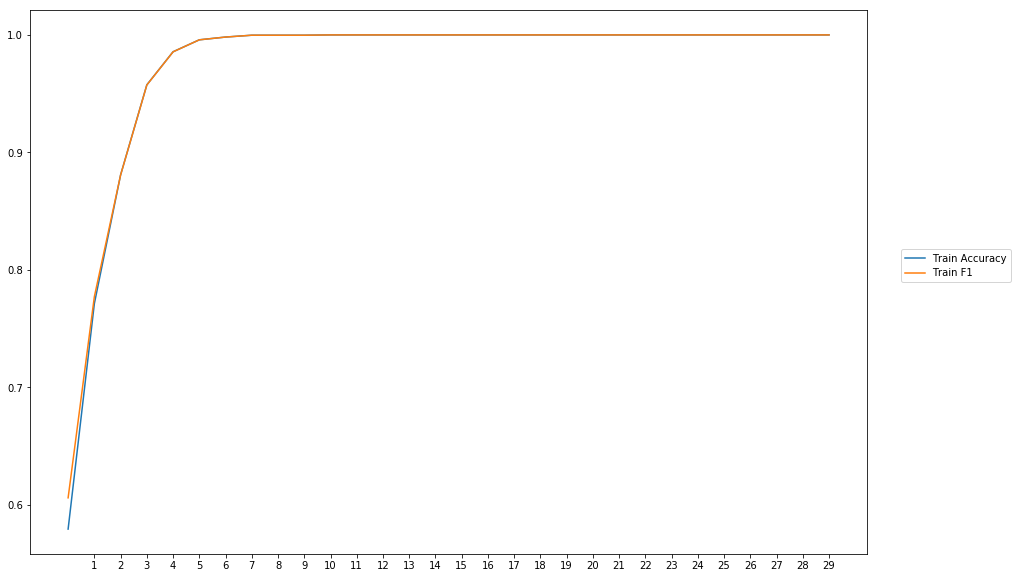


-----Test Scores----
Loss: 2.669335919983533
Accuracy: 63.64795918367348
Precision: 53.45744679429324
Recall: 64.63022505960444
F1: 58.515278870519474


In [16]:
train_evaluate_final_model(model_8, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_MLP_1_300')

### Test with best MLP neurons calculated by formular

Instructions for updating:
Use tf.cast instead.


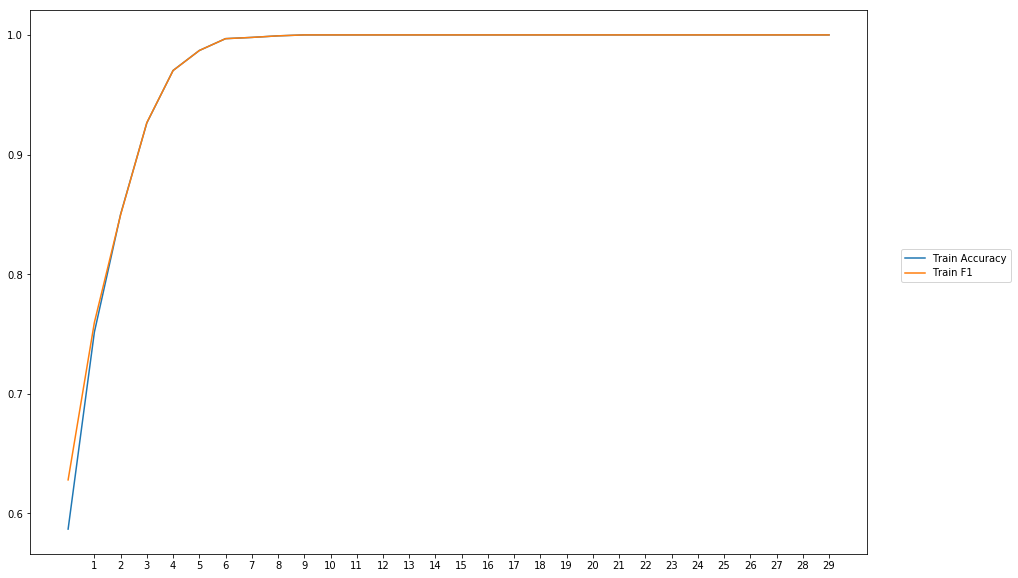


-----Test Scores----
Loss: 2.8392078438583686
Accuracy: 61.86224489795919
Precision: 51.57894735484765
Recall: 63.02250801832074
F1: 56.729372746895066


In [9]:
train_evaluate_final_model(model_13, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_MLP_1_99_Jinchuan')